In [1]:
import numpy as np
import pandas as pd
import os
from shutil import copyfile
import pickle
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import colorlover as cl


import neuro_morpho_toolbox as nmt
%matplotlib inline
import pickle
pickle_in = open("/home/penglab/FeaCal/all_ns.pickle","rb")
[ns] = pickle.load(pickle_in)


/home/penglab/anaconda3/lib/python3.7/site-packages/neuro_morpho_toolbox-0.1-py3.7.egg/neuro_morpho_toolbox/
Loading CCF Atlas data...
Loading time: 0.87
Loading CCF brain structure data...
Loading time: 0.00


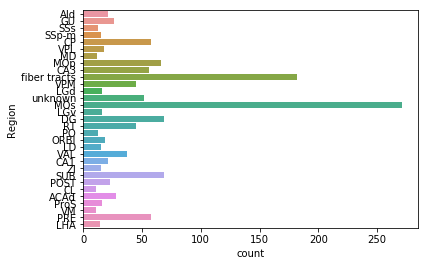

In [2]:
sf = ns.features['soma_features'].region
ct = sf["Region"].value_counts().sort_values(ascending=False)
_ = sns.countplot(y="Region", 
                  data=sf.loc[sf.Region.isin(ct.index[ct>10])],
                 )

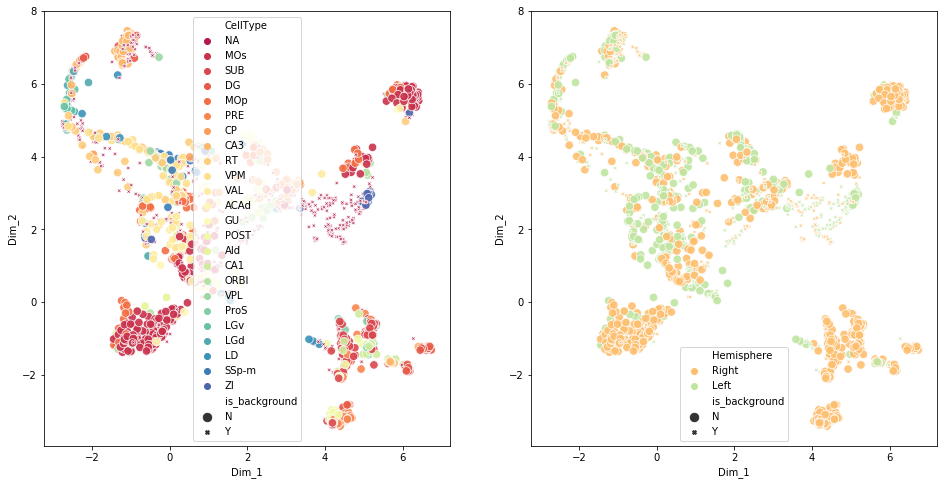

In [3]:
_ = ns.ReduceDimUMAP(feature_set="projection_features", n_neighbors=100)
_ = ns.FeatureScatter(["CellType", "Hemisphere"], map="UMAP")

In [ ]:


hier_resultDF = pd.read_excel('/home/penglab/NMTcode/hier_resultDF.xlsx')
kmeans_resultDF = pd.read_excel('/home/penglab/NMTcode/kmeans_resultDF.xlsx')
dbscan_resultDF = pd.read_excel('/home/penglab/NMTcode/dbscan_resultDF.xlsx')
hdbscan_resultDF = pd.read_excel('/home/penglab/NMTcode/hdbscan_resultDF.xlsx')
snn_resultDF= pd.read_excel('/home/penglab/NMTcode/snn_resultDF.xlsx')


### nmt.annotation.array
* column-major (Fortran-style) order
* Shape:  (528, 320, 456)
* Datatype:  uint32 (nmt.annotation.array.dtype)
* Size:  77045760  (nmt.annotation.array.size)
* Num Dimensions:  3  (nmt.annotation.array.ndim)

In [12]:
M_mask = nmt.annotation.array.copy()
M_mask[:,:,:] = 0
M_mask[:,:,:] = 0

In [13]:
np.sum(np.sum(M_mask))

0

In [64]:
x1 = np.arange(9).reshape((3, 3))
x2 = np.arange(9).reshape((3, 3))
np.dot(x1,x2)

array([[ 15,  18,  21],
       [ 42,  54,  66],
       [ 69,  90, 111]])

### 6- nearest array

In [99]:
M_mask = nmt.annotation.array.copy()
np.sum(M_mask)

504915776222016

In [40]:
co_1[iter_pixel]+2

2

In [37]:
M_mask[co_1[iter_pixel]-1:co_1[iter_pixel]+2,co_2[iter_pixel]-1:co_2[iter_pixel]+2,co_3[iter_pixel]-1:co_3[iter_pixel]+2] = 1

In [51]:
        M_mask = nmt.annotation.array.copy()
        M_mask[:,:,:] = 0
        M_mask[max(0,55-1):min(M_mask.shape[0],55+1),
                   max(0,55-1):min(M_mask.shape[1],55+1),
               max(0,55-1):min(M_mask.shape[2],55+1)] = 1
        print(np.sum(np.sum(M_mask)))

8


In [59]:
Regtype

array([        0,         1,         2,         6,         7,         9,
              10,        12,        15,        17,        19,        20,
              23,        26,        27,        28,        30,        33,
              35,        36,        38,        41,        42,        50,
              52,        54,        56,        58,        59,        62,
              63,        64,        66,        67,        68,        72,
              74,        75,        78,        81,        83,        84,
              88,        91,        93,        96,        97,        98,
             100,       101,       102,       105,       106,       108,
             113,       114,       115,       117,       118,       120,
             121,       122,       123,       125,       126,       128,
             129,       131,       132,       133,       136,       139,
             140,       143,       145,       146,       147,       148,
             149,       153,       155,       156, 

### Single line

In [71]:
Regtype, Regcount = np.unique(nmt.annotation.array, return_counts=True) 

ContourDic = {}
i_p=0
for iterReg in Regtype[1:]:
    i_p = i_p+1
    M_region = nmt.annotation.array == iterReg  # a np.ndarray
    co_1,co_2,co_3 = np.where(nmt.annotation.array == iterReg) 
    borderM = nmt.annotation.array.copy()
    borderM[:,:,:] = 0
    for iter_pixel in range(len(co_1)):
        M_mask = nmt.annotation.array.copy()
        M_mask[:,:,:] = 0
        M_mask[max(0,co_1[iter_pixel]-1),co_2[iter_pixel],co_3[iter_pixel]]=1
        M_mask[min(nmt.annotation.array.shape[0]-1,co_1[iter_pixel]+1),co_2[iter_pixel],co_3[iter_pixel]]=1
        M_mask[co_1[iter_pixel],max(0,co_2[iter_pixel]-1),co_3[iter_pixel]]=1
        M_mask[co_1[iter_pixel],min(nmt.annotation.array.shape[1]-1,co_2[iter_pixel]+1),co_3[iter_pixel]]=1
        M_mask[co_1[iter_pixel],co_2[iter_pixel],max(0,co_3[iter_pixel]-1)]=1
        M_mask[co_1[iter_pixel],co_2[iter_pixel],min(nmt.annotation.array.shape[2]-1,co_3[iter_pixel]+1)]=1
        assert M_mask.shape == nmt.annotation.array.shape
        if np.sum(np.sum(np.multiply(M_region==0,M_mask)))>0:
            borderM[co_1[iter_pixel],co_2[iter_pixel],co_2[iter_pixel]]=1
        print('Loading progess inside region ' +str(iterReg)+' : %.5f' % (iter_pixel/len(co_1)))
    ContourDic[iterReg] = borderM
    print('Loading progess for all brain regions: %.2f' % (i_p/len(Regtype)))

Loading progess inside region 1 : 0.00000
Loading progess inside region 1 : 0.00014
Loading progess inside region 1 : 0.00029
Loading progess inside region 1 : 0.00043
Loading progess inside region 1 : 0.00058
Loading progess inside region 1 : 0.00072
Loading progess inside region 1 : 0.00087
Loading progess inside region 1 : 0.00101
Loading progess inside region 1 : 0.00115
Loading progess inside region 1 : 0.00130
Loading progess inside region 1 : 0.00144
Loading progess inside region 1 : 0.00159
Loading progess inside region 1 : 0.00173
Loading progess inside region 1 : 0.00188
Loading progess inside region 1 : 0.00202
Loading progess inside region 1 : 0.00216
Loading progess inside region 1 : 0.00231
Loading progess inside region 1 : 0.00245
Loading progess inside region 1 : 0.00260
Loading progess inside region 1 : 0.00274
Loading progess inside region 1 : 0.00289
Loading progess inside region 1 : 0.00303
Loading progess inside region 1 : 0.00317
Loading progess inside region 1 : 

Loading progess inside region 1 : 0.02828
Loading progess inside region 1 : 0.02842
Loading progess inside region 1 : 0.02857
Loading progess inside region 1 : 0.02871
Loading progess inside region 1 : 0.02886
Loading progess inside region 1 : 0.02900
Loading progess inside region 1 : 0.02914
Loading progess inside region 1 : 0.02929
Loading progess inside region 1 : 0.02943
Loading progess inside region 1 : 0.02958
Loading progess inside region 1 : 0.02972
Loading progess inside region 1 : 0.02987
Loading progess inside region 1 : 0.03001
Loading progess inside region 1 : 0.03015
Loading progess inside region 1 : 0.03030
Loading progess inside region 1 : 0.03044
Loading progess inside region 1 : 0.03059
Loading progess inside region 1 : 0.03073
Loading progess inside region 1 : 0.03088
Loading progess inside region 1 : 0.03102
Loading progess inside region 1 : 0.03116
Loading progess inside region 1 : 0.03131
Loading progess inside region 1 : 0.03145
Loading progess inside region 1 : 

Loading progess inside region 1 : 0.05656
Loading progess inside region 1 : 0.05670
Loading progess inside region 1 : 0.05685
Loading progess inside region 1 : 0.05699
Loading progess inside region 1 : 0.05713
Loading progess inside region 1 : 0.05728
Loading progess inside region 1 : 0.05742
Loading progess inside region 1 : 0.05757
Loading progess inside region 1 : 0.05771
Loading progess inside region 1 : 0.05786
Loading progess inside region 1 : 0.05800
Loading progess inside region 1 : 0.05814
Loading progess inside region 1 : 0.05829
Loading progess inside region 1 : 0.05843
Loading progess inside region 1 : 0.05858
Loading progess inside region 1 : 0.05872
Loading progess inside region 1 : 0.05887
Loading progess inside region 1 : 0.05901
Loading progess inside region 1 : 0.05915
Loading progess inside region 1 : 0.05930
Loading progess inside region 1 : 0.05944
Loading progess inside region 1 : 0.05959
Loading progess inside region 1 : 0.05973
Loading progess inside region 1 : 

Loading progess inside region 1 : 0.08484
Loading progess inside region 1 : 0.08498
Loading progess inside region 1 : 0.08512
Loading progess inside region 1 : 0.08527
Loading progess inside region 1 : 0.08541
Loading progess inside region 1 : 0.08556
Loading progess inside region 1 : 0.08570
Loading progess inside region 1 : 0.08585
Loading progess inside region 1 : 0.08599
Loading progess inside region 1 : 0.08613
Loading progess inside region 1 : 0.08628
Loading progess inside region 1 : 0.08642
Loading progess inside region 1 : 0.08657
Loading progess inside region 1 : 0.08671
Loading progess inside region 1 : 0.08686
Loading progess inside region 1 : 0.08700
Loading progess inside region 1 : 0.08714
Loading progess inside region 1 : 0.08729
Loading progess inside region 1 : 0.08743
Loading progess inside region 1 : 0.08758
Loading progess inside region 1 : 0.08772
Loading progess inside region 1 : 0.08787
Loading progess inside region 1 : 0.08801
Loading progess inside region 1 : 

Loading progess inside region 1 : 0.11311
Loading progess inside region 1 : 0.11326
Loading progess inside region 1 : 0.11340
Loading progess inside region 1 : 0.11355
Loading progess inside region 1 : 0.11369
Loading progess inside region 1 : 0.11384
Loading progess inside region 1 : 0.11398
Loading progess inside region 1 : 0.11412
Loading progess inside region 1 : 0.11427
Loading progess inside region 1 : 0.11441
Loading progess inside region 1 : 0.11456
Loading progess inside region 1 : 0.11470
Loading progess inside region 1 : 0.11485
Loading progess inside region 1 : 0.11499
Loading progess inside region 1 : 0.11513
Loading progess inside region 1 : 0.11528
Loading progess inside region 1 : 0.11542
Loading progess inside region 1 : 0.11557
Loading progess inside region 1 : 0.11571
Loading progess inside region 1 : 0.11586
Loading progess inside region 1 : 0.11600
Loading progess inside region 1 : 0.11614
Loading progess inside region 1 : 0.11629
Loading progess inside region 1 : 

Loading progess inside region 1 : 0.14139
Loading progess inside region 1 : 0.14154
Loading progess inside region 1 : 0.14168
Loading progess inside region 1 : 0.14183
Loading progess inside region 1 : 0.14197
Loading progess inside region 1 : 0.14212
Loading progess inside region 1 : 0.14226
Loading progess inside region 1 : 0.14240
Loading progess inside region 1 : 0.14255
Loading progess inside region 1 : 0.14269
Loading progess inside region 1 : 0.14284
Loading progess inside region 1 : 0.14298
Loading progess inside region 1 : 0.14313
Loading progess inside region 1 : 0.14327
Loading progess inside region 1 : 0.14341
Loading progess inside region 1 : 0.14356
Loading progess inside region 1 : 0.14370
Loading progess inside region 1 : 0.14385
Loading progess inside region 1 : 0.14399
Loading progess inside region 1 : 0.14414
Loading progess inside region 1 : 0.14428
Loading progess inside region 1 : 0.14442
Loading progess inside region 1 : 0.14457
Loading progess inside region 1 : 

Loading progess inside region 1 : 0.16967
Loading progess inside region 1 : 0.16982
Loading progess inside region 1 : 0.16996
Loading progess inside region 1 : 0.17011
Loading progess inside region 1 : 0.17025
Loading progess inside region 1 : 0.17039
Loading progess inside region 1 : 0.17054
Loading progess inside region 1 : 0.17068
Loading progess inside region 1 : 0.17083
Loading progess inside region 1 : 0.17097
Loading progess inside region 1 : 0.17112
Loading progess inside region 1 : 0.17126
Loading progess inside region 1 : 0.17140
Loading progess inside region 1 : 0.17155
Loading progess inside region 1 : 0.17169
Loading progess inside region 1 : 0.17184
Loading progess inside region 1 : 0.17198
Loading progess inside region 1 : 0.17213
Loading progess inside region 1 : 0.17227
Loading progess inside region 1 : 0.17241
Loading progess inside region 1 : 0.17256
Loading progess inside region 1 : 0.17270
Loading progess inside region 1 : 0.17285
Loading progess inside region 1 : 

Loading progess inside region 1 : 0.19795
Loading progess inside region 1 : 0.19810
Loading progess inside region 1 : 0.19824
Loading progess inside region 1 : 0.19838
Loading progess inside region 1 : 0.19853
Loading progess inside region 1 : 0.19867
Loading progess inside region 1 : 0.19882
Loading progess inside region 1 : 0.19896
Loading progess inside region 1 : 0.19911
Loading progess inside region 1 : 0.19925
Loading progess inside region 1 : 0.19939
Loading progess inside region 1 : 0.19954
Loading progess inside region 1 : 0.19968
Loading progess inside region 1 : 0.19983
Loading progess inside region 1 : 0.19997
Loading progess inside region 1 : 0.20012
Loading progess inside region 1 : 0.20026
Loading progess inside region 1 : 0.20040
Loading progess inside region 1 : 0.20055
Loading progess inside region 1 : 0.20069
Loading progess inside region 1 : 0.20084
Loading progess inside region 1 : 0.20098
Loading progess inside region 1 : 0.20113
Loading progess inside region 1 : 

Loading progess inside region 1 : 0.22623
Loading progess inside region 1 : 0.22637
Loading progess inside region 1 : 0.22652
Loading progess inside region 1 : 0.22666
Loading progess inside region 1 : 0.22681
Loading progess inside region 1 : 0.22695
Loading progess inside region 1 : 0.22710
Loading progess inside region 1 : 0.22724
Loading progess inside region 1 : 0.22738
Loading progess inside region 1 : 0.22753
Loading progess inside region 1 : 0.22767
Loading progess inside region 1 : 0.22782
Loading progess inside region 1 : 0.22796
Loading progess inside region 1 : 0.22811
Loading progess inside region 1 : 0.22825
Loading progess inside region 1 : 0.22839
Loading progess inside region 1 : 0.22854
Loading progess inside region 1 : 0.22868
Loading progess inside region 1 : 0.22883
Loading progess inside region 1 : 0.22897
Loading progess inside region 1 : 0.22912
Loading progess inside region 1 : 0.22926
Loading progess inside region 1 : 0.22940
Loading progess inside region 1 : 

Loading progess inside region 1 : 0.25451
Loading progess inside region 1 : 0.25465
Loading progess inside region 1 : 0.25480
Loading progess inside region 1 : 0.25494
Loading progess inside region 1 : 0.25509
Loading progess inside region 1 : 0.25523
Loading progess inside region 1 : 0.25537
Loading progess inside region 1 : 0.25552
Loading progess inside region 1 : 0.25566
Loading progess inside region 1 : 0.25581
Loading progess inside region 1 : 0.25595
Loading progess inside region 1 : 0.25610
Loading progess inside region 1 : 0.25624
Loading progess inside region 1 : 0.25638
Loading progess inside region 1 : 0.25653
Loading progess inside region 1 : 0.25667
Loading progess inside region 1 : 0.25682
Loading progess inside region 1 : 0.25696
Loading progess inside region 1 : 0.25711
Loading progess inside region 1 : 0.25725
Loading progess inside region 1 : 0.25739
Loading progess inside region 1 : 0.25754
Loading progess inside region 1 : 0.25768
Loading progess inside region 1 : 

Loading progess inside region 1 : 0.28279
Loading progess inside region 1 : 0.28293
Loading progess inside region 1 : 0.28308
Loading progess inside region 1 : 0.28322
Loading progess inside region 1 : 0.28336
Loading progess inside region 1 : 0.28351
Loading progess inside region 1 : 0.28365
Loading progess inside region 1 : 0.28380
Loading progess inside region 1 : 0.28394
Loading progess inside region 1 : 0.28409
Loading progess inside region 1 : 0.28423
Loading progess inside region 1 : 0.28437
Loading progess inside region 1 : 0.28452
Loading progess inside region 1 : 0.28466
Loading progess inside region 1 : 0.28481
Loading progess inside region 1 : 0.28495
Loading progess inside region 1 : 0.28510
Loading progess inside region 1 : 0.28524
Loading progess inside region 1 : 0.28538
Loading progess inside region 1 : 0.28553
Loading progess inside region 1 : 0.28567
Loading progess inside region 1 : 0.28582
Loading progess inside region 1 : 0.28596
Loading progess inside region 1 : 

Loading progess inside region 1 : 0.31107
Loading progess inside region 1 : 0.31121
Loading progess inside region 1 : 0.31135
Loading progess inside region 1 : 0.31150
Loading progess inside region 1 : 0.31164
Loading progess inside region 1 : 0.31179
Loading progess inside region 1 : 0.31193
Loading progess inside region 1 : 0.31208
Loading progess inside region 1 : 0.31222
Loading progess inside region 1 : 0.31236
Loading progess inside region 1 : 0.31251
Loading progess inside region 1 : 0.31265
Loading progess inside region 1 : 0.31280
Loading progess inside region 1 : 0.31294
Loading progess inside region 1 : 0.31309
Loading progess inside region 1 : 0.31323
Loading progess inside region 1 : 0.31337
Loading progess inside region 1 : 0.31352
Loading progess inside region 1 : 0.31366
Loading progess inside region 1 : 0.31381
Loading progess inside region 1 : 0.31395
Loading progess inside region 1 : 0.31410
Loading progess inside region 1 : 0.31424
Loading progess inside region 1 : 

Loading progess inside region 1 : 0.33934
Loading progess inside region 1 : 0.33949
Loading progess inside region 1 : 0.33963
Loading progess inside region 1 : 0.33978
Loading progess inside region 1 : 0.33992
Loading progess inside region 1 : 0.34007
Loading progess inside region 1 : 0.34021
Loading progess inside region 1 : 0.34035
Loading progess inside region 1 : 0.34050
Loading progess inside region 1 : 0.34064
Loading progess inside region 1 : 0.34079
Loading progess inside region 1 : 0.34093
Loading progess inside region 1 : 0.34108
Loading progess inside region 1 : 0.34122
Loading progess inside region 1 : 0.34136
Loading progess inside region 1 : 0.34151
Loading progess inside region 1 : 0.34165
Loading progess inside region 1 : 0.34180
Loading progess inside region 1 : 0.34194
Loading progess inside region 1 : 0.34209
Loading progess inside region 1 : 0.34223
Loading progess inside region 1 : 0.34237
Loading progess inside region 1 : 0.34252
Loading progess inside region 1 : 

Loading progess inside region 1 : 0.36762
Loading progess inside region 1 : 0.36777
Loading progess inside region 1 : 0.36791
Loading progess inside region 1 : 0.36806
Loading progess inside region 1 : 0.36820
Loading progess inside region 1 : 0.36835
Loading progess inside region 1 : 0.36849
Loading progess inside region 1 : 0.36863
Loading progess inside region 1 : 0.36878
Loading progess inside region 1 : 0.36892
Loading progess inside region 1 : 0.36907
Loading progess inside region 1 : 0.36921
Loading progess inside region 1 : 0.36936
Loading progess inside region 1 : 0.36950
Loading progess inside region 1 : 0.36964
Loading progess inside region 1 : 0.36979
Loading progess inside region 1 : 0.36993
Loading progess inside region 1 : 0.37008
Loading progess inside region 1 : 0.37022
Loading progess inside region 1 : 0.37037
Loading progess inside region 1 : 0.37051
Loading progess inside region 1 : 0.37065
Loading progess inside region 1 : 0.37080
Loading progess inside region 1 : 

Loading progess inside region 1 : 0.39590
Loading progess inside region 1 : 0.39605
Loading progess inside region 1 : 0.39619
Loading progess inside region 1 : 0.39634
Loading progess inside region 1 : 0.39648
Loading progess inside region 1 : 0.39662
Loading progess inside region 1 : 0.39677
Loading progess inside region 1 : 0.39691
Loading progess inside region 1 : 0.39706
Loading progess inside region 1 : 0.39720
Loading progess inside region 1 : 0.39735
Loading progess inside region 1 : 0.39749
Loading progess inside region 1 : 0.39763
Loading progess inside region 1 : 0.39778
Loading progess inside region 1 : 0.39792
Loading progess inside region 1 : 0.39807
Loading progess inside region 1 : 0.39821
Loading progess inside region 1 : 0.39836
Loading progess inside region 1 : 0.39850
Loading progess inside region 1 : 0.39864
Loading progess inside region 1 : 0.39879
Loading progess inside region 1 : 0.39893
Loading progess inside region 1 : 0.39908
Loading progess inside region 1 : 

Loading progess inside region 1 : 0.42418
Loading progess inside region 1 : 0.42433
Loading progess inside region 1 : 0.42447
Loading progess inside region 1 : 0.42461
Loading progess inside region 1 : 0.42476
Loading progess inside region 1 : 0.42490
Loading progess inside region 1 : 0.42505
Loading progess inside region 1 : 0.42519
Loading progess inside region 1 : 0.42534
Loading progess inside region 1 : 0.42548
Loading progess inside region 1 : 0.42562
Loading progess inside region 1 : 0.42577
Loading progess inside region 1 : 0.42591
Loading progess inside region 1 : 0.42606
Loading progess inside region 1 : 0.42620
Loading progess inside region 1 : 0.42635
Loading progess inside region 1 : 0.42649
Loading progess inside region 1 : 0.42663
Loading progess inside region 1 : 0.42678
Loading progess inside region 1 : 0.42692
Loading progess inside region 1 : 0.42707
Loading progess inside region 1 : 0.42721
Loading progess inside region 1 : 0.42736
Loading progess inside region 1 : 

Loading progess inside region 1 : 0.45246
Loading progess inside region 1 : 0.45260
Loading progess inside region 1 : 0.45275
Loading progess inside region 1 : 0.45289
Loading progess inside region 1 : 0.45304
Loading progess inside region 1 : 0.45318
Loading progess inside region 1 : 0.45333
Loading progess inside region 1 : 0.45347
Loading progess inside region 1 : 0.45361
Loading progess inside region 1 : 0.45376
Loading progess inside region 1 : 0.45390
Loading progess inside region 1 : 0.45405
Loading progess inside region 1 : 0.45419
Loading progess inside region 1 : 0.45434
Loading progess inside region 1 : 0.45448
Loading progess inside region 1 : 0.45462
Loading progess inside region 1 : 0.45477
Loading progess inside region 1 : 0.45491
Loading progess inside region 1 : 0.45506
Loading progess inside region 1 : 0.45520
Loading progess inside region 1 : 0.45535
Loading progess inside region 1 : 0.45549
Loading progess inside region 1 : 0.45563
Loading progess inside region 1 : 

Loading progess inside region 1 : 0.48074
Loading progess inside region 1 : 0.48088
Loading progess inside region 1 : 0.48103
Loading progess inside region 1 : 0.48117
Loading progess inside region 1 : 0.48132
Loading progess inside region 1 : 0.48146
Loading progess inside region 1 : 0.48160
Loading progess inside region 1 : 0.48175
Loading progess inside region 1 : 0.48189
Loading progess inside region 1 : 0.48204
Loading progess inside region 1 : 0.48218
Loading progess inside region 1 : 0.48233
Loading progess inside region 1 : 0.48247
Loading progess inside region 1 : 0.48261
Loading progess inside region 1 : 0.48276
Loading progess inside region 1 : 0.48290
Loading progess inside region 1 : 0.48305
Loading progess inside region 1 : 0.48319
Loading progess inside region 1 : 0.48334
Loading progess inside region 1 : 0.48348
Loading progess inside region 1 : 0.48362
Loading progess inside region 1 : 0.48377
Loading progess inside region 1 : 0.48391
Loading progess inside region 1 : 

Loading progess inside region 1 : 0.50902
Loading progess inside region 1 : 0.50916
Loading progess inside region 1 : 0.50931
Loading progess inside region 1 : 0.50945
Loading progess inside region 1 : 0.50959
Loading progess inside region 1 : 0.50974
Loading progess inside region 1 : 0.50988
Loading progess inside region 1 : 0.51003
Loading progess inside region 1 : 0.51017
Loading progess inside region 1 : 0.51032
Loading progess inside region 1 : 0.51046
Loading progess inside region 1 : 0.51060
Loading progess inside region 1 : 0.51075
Loading progess inside region 1 : 0.51089
Loading progess inside region 1 : 0.51104
Loading progess inside region 1 : 0.51118
Loading progess inside region 1 : 0.51133
Loading progess inside region 1 : 0.51147
Loading progess inside region 1 : 0.51161
Loading progess inside region 1 : 0.51176
Loading progess inside region 1 : 0.51190
Loading progess inside region 1 : 0.51205
Loading progess inside region 1 : 0.51219
Loading progess inside region 1 : 

Loading progess inside region 1 : 0.53730
Loading progess inside region 1 : 0.53744
Loading progess inside region 1 : 0.53758
Loading progess inside region 1 : 0.53773
Loading progess inside region 1 : 0.53787
Loading progess inside region 1 : 0.53802
Loading progess inside region 1 : 0.53816
Loading progess inside region 1 : 0.53831
Loading progess inside region 1 : 0.53845
Loading progess inside region 1 : 0.53859
Loading progess inside region 1 : 0.53874
Loading progess inside region 1 : 0.53888
Loading progess inside region 1 : 0.53903
Loading progess inside region 1 : 0.53917
Loading progess inside region 1 : 0.53932
Loading progess inside region 1 : 0.53946
Loading progess inside region 1 : 0.53960
Loading progess inside region 1 : 0.53975
Loading progess inside region 1 : 0.53989
Loading progess inside region 1 : 0.54004
Loading progess inside region 1 : 0.54018
Loading progess inside region 1 : 0.54033
Loading progess inside region 1 : 0.54047
Loading progess inside region 1 : 

Loading progess inside region 1 : 0.56557
Loading progess inside region 1 : 0.56572
Loading progess inside region 1 : 0.56586
Loading progess inside region 1 : 0.56601
Loading progess inside region 1 : 0.56615
Loading progess inside region 1 : 0.56630
Loading progess inside region 1 : 0.56644
Loading progess inside region 1 : 0.56658
Loading progess inside region 1 : 0.56673
Loading progess inside region 1 : 0.56687
Loading progess inside region 1 : 0.56702
Loading progess inside region 1 : 0.56716
Loading progess inside region 1 : 0.56731
Loading progess inside region 1 : 0.56745
Loading progess inside region 1 : 0.56759
Loading progess inside region 1 : 0.56774
Loading progess inside region 1 : 0.56788
Loading progess inside region 1 : 0.56803
Loading progess inside region 1 : 0.56817
Loading progess inside region 1 : 0.56832
Loading progess inside region 1 : 0.56846
Loading progess inside region 1 : 0.56860
Loading progess inside region 1 : 0.56875
Loading progess inside region 1 : 

Loading progess inside region 1 : 0.59385
Loading progess inside region 1 : 0.59400
Loading progess inside region 1 : 0.59414
Loading progess inside region 1 : 0.59429
Loading progess inside region 1 : 0.59443
Loading progess inside region 1 : 0.59458
Loading progess inside region 1 : 0.59472
Loading progess inside region 1 : 0.59486
Loading progess inside region 1 : 0.59501
Loading progess inside region 1 : 0.59515
Loading progess inside region 1 : 0.59530
Loading progess inside region 1 : 0.59544
Loading progess inside region 1 : 0.59559
Loading progess inside region 1 : 0.59573
Loading progess inside region 1 : 0.59587
Loading progess inside region 1 : 0.59602
Loading progess inside region 1 : 0.59616
Loading progess inside region 1 : 0.59631
Loading progess inside region 1 : 0.59645
Loading progess inside region 1 : 0.59660
Loading progess inside region 1 : 0.59674
Loading progess inside region 1 : 0.59688
Loading progess inside region 1 : 0.59703
Loading progess inside region 1 : 

Loading progess inside region 1 : 0.62213
Loading progess inside region 1 : 0.62228
Loading progess inside region 1 : 0.62242
Loading progess inside region 1 : 0.62257
Loading progess inside region 1 : 0.62271
Loading progess inside region 1 : 0.62285
Loading progess inside region 1 : 0.62300
Loading progess inside region 1 : 0.62314
Loading progess inside region 1 : 0.62329
Loading progess inside region 1 : 0.62343
Loading progess inside region 1 : 0.62358
Loading progess inside region 1 : 0.62372
Loading progess inside region 1 : 0.62386
Loading progess inside region 1 : 0.62401
Loading progess inside region 1 : 0.62415
Loading progess inside region 1 : 0.62430
Loading progess inside region 1 : 0.62444
Loading progess inside region 1 : 0.62459
Loading progess inside region 1 : 0.62473
Loading progess inside region 1 : 0.62487
Loading progess inside region 1 : 0.62502
Loading progess inside region 1 : 0.62516
Loading progess inside region 1 : 0.62531
Loading progess inside region 1 : 

Loading progess inside region 1 : 0.65041
Loading progess inside region 1 : 0.65056
Loading progess inside region 1 : 0.65070
Loading progess inside region 1 : 0.65084
Loading progess inside region 1 : 0.65099
Loading progess inside region 1 : 0.65113
Loading progess inside region 1 : 0.65128
Loading progess inside region 1 : 0.65142
Loading progess inside region 1 : 0.65157
Loading progess inside region 1 : 0.65171
Loading progess inside region 1 : 0.65185
Loading progess inside region 1 : 0.65200
Loading progess inside region 1 : 0.65214
Loading progess inside region 1 : 0.65229
Loading progess inside region 1 : 0.65243
Loading progess inside region 1 : 0.65258
Loading progess inside region 1 : 0.65272
Loading progess inside region 1 : 0.65286
Loading progess inside region 1 : 0.65301
Loading progess inside region 1 : 0.65315
Loading progess inside region 1 : 0.65330
Loading progess inside region 1 : 0.65344
Loading progess inside region 1 : 0.65359
Loading progess inside region 1 : 

Loading progess inside region 1 : 0.67869
Loading progess inside region 1 : 0.67883
Loading progess inside region 1 : 0.67898
Loading progess inside region 1 : 0.67912
Loading progess inside region 1 : 0.67927
Loading progess inside region 1 : 0.67941
Loading progess inside region 1 : 0.67956
Loading progess inside region 1 : 0.67970
Loading progess inside region 1 : 0.67984
Loading progess inside region 1 : 0.67999
Loading progess inside region 1 : 0.68013
Loading progess inside region 1 : 0.68028
Loading progess inside region 1 : 0.68042
Loading progess inside region 1 : 0.68057
Loading progess inside region 1 : 0.68071
Loading progess inside region 1 : 0.68085
Loading progess inside region 1 : 0.68100
Loading progess inside region 1 : 0.68114
Loading progess inside region 1 : 0.68129
Loading progess inside region 1 : 0.68143
Loading progess inside region 1 : 0.68158
Loading progess inside region 1 : 0.68172
Loading progess inside region 1 : 0.68186
Loading progess inside region 1 : 

Loading progess inside region 1 : 0.70697
Loading progess inside region 1 : 0.70711
Loading progess inside region 1 : 0.70726
Loading progess inside region 1 : 0.70740
Loading progess inside region 1 : 0.70755
Loading progess inside region 1 : 0.70769
Loading progess inside region 1 : 0.70783
Loading progess inside region 1 : 0.70798
Loading progess inside region 1 : 0.70812
Loading progess inside region 1 : 0.70827
Loading progess inside region 1 : 0.70841
Loading progess inside region 1 : 0.70856
Loading progess inside region 1 : 0.70870
Loading progess inside region 1 : 0.70884
Loading progess inside region 1 : 0.70899
Loading progess inside region 1 : 0.70913
Loading progess inside region 1 : 0.70928
Loading progess inside region 1 : 0.70942
Loading progess inside region 1 : 0.70957
Loading progess inside region 1 : 0.70971
Loading progess inside region 1 : 0.70985
Loading progess inside region 1 : 0.71000
Loading progess inside region 1 : 0.71014
Loading progess inside region 1 : 

Loading progess inside region 1 : 0.73525
Loading progess inside region 1 : 0.73539
Loading progess inside region 1 : 0.73554
Loading progess inside region 1 : 0.73568
Loading progess inside region 1 : 0.73582
Loading progess inside region 1 : 0.73597
Loading progess inside region 1 : 0.73611
Loading progess inside region 1 : 0.73626
Loading progess inside region 1 : 0.73640
Loading progess inside region 1 : 0.73655
Loading progess inside region 1 : 0.73669
Loading progess inside region 1 : 0.73683
Loading progess inside region 1 : 0.73698
Loading progess inside region 1 : 0.73712
Loading progess inside region 1 : 0.73727
Loading progess inside region 1 : 0.73741
Loading progess inside region 1 : 0.73756
Loading progess inside region 1 : 0.73770
Loading progess inside region 1 : 0.73784
Loading progess inside region 1 : 0.73799
Loading progess inside region 1 : 0.73813
Loading progess inside region 1 : 0.73828
Loading progess inside region 1 : 0.73842
Loading progess inside region 1 : 

Loading progess inside region 1 : 0.76353
Loading progess inside region 1 : 0.76367
Loading progess inside region 1 : 0.76381
Loading progess inside region 1 : 0.76396
Loading progess inside region 1 : 0.76410
Loading progess inside region 1 : 0.76425
Loading progess inside region 1 : 0.76439
Loading progess inside region 1 : 0.76454
Loading progess inside region 1 : 0.76468
Loading progess inside region 1 : 0.76482
Loading progess inside region 1 : 0.76497
Loading progess inside region 1 : 0.76511
Loading progess inside region 1 : 0.76526
Loading progess inside region 1 : 0.76540
Loading progess inside region 1 : 0.76555
Loading progess inside region 1 : 0.76569
Loading progess inside region 1 : 0.76583
Loading progess inside region 1 : 0.76598
Loading progess inside region 1 : 0.76612
Loading progess inside region 1 : 0.76627
Loading progess inside region 1 : 0.76641
Loading progess inside region 1 : 0.76656
Loading progess inside region 1 : 0.76670
Loading progess inside region 1 : 

Loading progess inside region 1 : 0.79180
Loading progess inside region 1 : 0.79195
Loading progess inside region 1 : 0.79209
Loading progess inside region 1 : 0.79224
Loading progess inside region 1 : 0.79238
Loading progess inside region 1 : 0.79253
Loading progess inside region 1 : 0.79267
Loading progess inside region 1 : 0.79281
Loading progess inside region 1 : 0.79296
Loading progess inside region 1 : 0.79310
Loading progess inside region 1 : 0.79325
Loading progess inside region 1 : 0.79339
Loading progess inside region 1 : 0.79354
Loading progess inside region 1 : 0.79368
Loading progess inside region 1 : 0.79382
Loading progess inside region 1 : 0.79397
Loading progess inside region 1 : 0.79411
Loading progess inside region 1 : 0.79426
Loading progess inside region 1 : 0.79440
Loading progess inside region 1 : 0.79455
Loading progess inside region 1 : 0.79469
Loading progess inside region 1 : 0.79483
Loading progess inside region 1 : 0.79498
Loading progess inside region 1 : 

Loading progess inside region 1 : 0.82008
Loading progess inside region 1 : 0.82023
Loading progess inside region 1 : 0.82037
Loading progess inside region 1 : 0.82052
Loading progess inside region 1 : 0.82066
Loading progess inside region 1 : 0.82081
Loading progess inside region 1 : 0.82095
Loading progess inside region 1 : 0.82109
Loading progess inside region 1 : 0.82124
Loading progess inside region 1 : 0.82138
Loading progess inside region 1 : 0.82153
Loading progess inside region 1 : 0.82167
Loading progess inside region 1 : 0.82182
Loading progess inside region 1 : 0.82196
Loading progess inside region 1 : 0.82210
Loading progess inside region 1 : 0.82225
Loading progess inside region 1 : 0.82239
Loading progess inside region 1 : 0.82254
Loading progess inside region 1 : 0.82268
Loading progess inside region 1 : 0.82282
Loading progess inside region 1 : 0.82297
Loading progess inside region 1 : 0.82311
Loading progess inside region 1 : 0.82326
Loading progess inside region 1 : 

Loading progess inside region 1 : 0.84836
Loading progess inside region 1 : 0.84851
Loading progess inside region 1 : 0.84865
Loading progess inside region 1 : 0.84880
Loading progess inside region 1 : 0.84894
Loading progess inside region 1 : 0.84908
Loading progess inside region 1 : 0.84923
Loading progess inside region 1 : 0.84937
Loading progess inside region 1 : 0.84952
Loading progess inside region 1 : 0.84966
Loading progess inside region 1 : 0.84981
Loading progess inside region 1 : 0.84995
Loading progess inside region 1 : 0.85009
Loading progess inside region 1 : 0.85024
Loading progess inside region 1 : 0.85038
Loading progess inside region 1 : 0.85053
Loading progess inside region 1 : 0.85067
Loading progess inside region 1 : 0.85082
Loading progess inside region 1 : 0.85096
Loading progess inside region 1 : 0.85110
Loading progess inside region 1 : 0.85125
Loading progess inside region 1 : 0.85139
Loading progess inside region 1 : 0.85154
Loading progess inside region 1 : 

Loading progess inside region 1 : 0.87664
Loading progess inside region 1 : 0.87679
Loading progess inside region 1 : 0.87693
Loading progess inside region 1 : 0.87707
Loading progess inside region 1 : 0.87722
Loading progess inside region 1 : 0.87736
Loading progess inside region 1 : 0.87751
Loading progess inside region 1 : 0.87765
Loading progess inside region 1 : 0.87780
Loading progess inside region 1 : 0.87794
Loading progess inside region 1 : 0.87808
Loading progess inside region 1 : 0.87823
Loading progess inside region 1 : 0.87837
Loading progess inside region 1 : 0.87852
Loading progess inside region 1 : 0.87866
Loading progess inside region 1 : 0.87881
Loading progess inside region 1 : 0.87895
Loading progess inside region 1 : 0.87909
Loading progess inside region 1 : 0.87924
Loading progess inside region 1 : 0.87938
Loading progess inside region 1 : 0.87953
Loading progess inside region 1 : 0.87967
Loading progess inside region 1 : 0.87982
Loading progess inside region 1 : 

Loading progess inside region 1 : 0.90492
Loading progess inside region 1 : 0.90506
Loading progess inside region 1 : 0.90521
Loading progess inside region 1 : 0.90535
Loading progess inside region 1 : 0.90550
Loading progess inside region 1 : 0.90564
Loading progess inside region 1 : 0.90579
Loading progess inside region 1 : 0.90593
Loading progess inside region 1 : 0.90607
Loading progess inside region 1 : 0.90622
Loading progess inside region 1 : 0.90636
Loading progess inside region 1 : 0.90651
Loading progess inside region 1 : 0.90665
Loading progess inside region 1 : 0.90680
Loading progess inside region 1 : 0.90694
Loading progess inside region 1 : 0.90708
Loading progess inside region 1 : 0.90723
Loading progess inside region 1 : 0.90737
Loading progess inside region 1 : 0.90752
Loading progess inside region 1 : 0.90766
Loading progess inside region 1 : 0.90781
Loading progess inside region 1 : 0.90795
Loading progess inside region 1 : 0.90809
Loading progess inside region 1 : 

Loading progess inside region 1 : 0.93320
Loading progess inside region 1 : 0.93334
Loading progess inside region 1 : 0.93349
Loading progess inside region 1 : 0.93363
Loading progess inside region 1 : 0.93378
Loading progess inside region 1 : 0.93392
Loading progess inside region 1 : 0.93406
Loading progess inside region 1 : 0.93421
Loading progess inside region 1 : 0.93435
Loading progess inside region 1 : 0.93450
Loading progess inside region 1 : 0.93464
Loading progess inside region 1 : 0.93479
Loading progess inside region 1 : 0.93493
Loading progess inside region 1 : 0.93507
Loading progess inside region 1 : 0.93522
Loading progess inside region 1 : 0.93536
Loading progess inside region 1 : 0.93551
Loading progess inside region 1 : 0.93565
Loading progess inside region 1 : 0.93580
Loading progess inside region 1 : 0.93594
Loading progess inside region 1 : 0.93608
Loading progess inside region 1 : 0.93623
Loading progess inside region 1 : 0.93637
Loading progess inside region 1 : 

Loading progess inside region 1 : 0.96148
Loading progess inside region 1 : 0.96162
Loading progess inside region 1 : 0.96177
Loading progess inside region 1 : 0.96191
Loading progess inside region 1 : 0.96205
Loading progess inside region 1 : 0.96220
Loading progess inside region 1 : 0.96234
Loading progess inside region 1 : 0.96249
Loading progess inside region 1 : 0.96263
Loading progess inside region 1 : 0.96278
Loading progess inside region 1 : 0.96292
Loading progess inside region 1 : 0.96306
Loading progess inside region 1 : 0.96321
Loading progess inside region 1 : 0.96335
Loading progess inside region 1 : 0.96350
Loading progess inside region 1 : 0.96364
Loading progess inside region 1 : 0.96379
Loading progess inside region 1 : 0.96393
Loading progess inside region 1 : 0.96407
Loading progess inside region 1 : 0.96422
Loading progess inside region 1 : 0.96436
Loading progess inside region 1 : 0.96451
Loading progess inside region 1 : 0.96465
Loading progess inside region 1 : 

Loading progess inside region 1 : 0.98976
Loading progess inside region 1 : 0.98990
Loading progess inside region 1 : 0.99004
Loading progess inside region 1 : 0.99019
Loading progess inside region 1 : 0.99033
Loading progess inside region 1 : 0.99048
Loading progess inside region 1 : 0.99062
Loading progess inside region 1 : 0.99077
Loading progess inside region 1 : 0.99091
Loading progess inside region 1 : 0.99105
Loading progess inside region 1 : 0.99120
Loading progess inside region 1 : 0.99134
Loading progess inside region 1 : 0.99149
Loading progess inside region 1 : 0.99163
Loading progess inside region 1 : 0.99178
Loading progess inside region 1 : 0.99192
Loading progess inside region 1 : 0.99206
Loading progess inside region 1 : 0.99221
Loading progess inside region 1 : 0.99235
Loading progess inside region 1 : 0.99250
Loading progess inside region 1 : 0.99264
Loading progess inside region 1 : 0.99279
Loading progess inside region 1 : 0.99293
Loading progess inside region 1 : 

Loading progess inside region 2 : 0.01690
Loading progess inside region 2 : 0.01703
Loading progess inside region 2 : 0.01717
Loading progess inside region 2 : 0.01730
Loading progess inside region 2 : 0.01744
Loading progess inside region 2 : 0.01758
Loading progess inside region 2 : 0.01771
Loading progess inside region 2 : 0.01785
Loading progess inside region 2 : 0.01799
Loading progess inside region 2 : 0.01812
Loading progess inside region 2 : 0.01826
Loading progess inside region 2 : 0.01839
Loading progess inside region 2 : 0.01853
Loading progess inside region 2 : 0.01867
Loading progess inside region 2 : 0.01880
Loading progess inside region 2 : 0.01894
Loading progess inside region 2 : 0.01908
Loading progess inside region 2 : 0.01921
Loading progess inside region 2 : 0.01935
Loading progess inside region 2 : 0.01948
Loading progess inside region 2 : 0.01962
Loading progess inside region 2 : 0.01976
Loading progess inside region 2 : 0.01989
Loading progess inside region 2 : 

Loading progess inside region 2 : 0.04360
Loading progess inside region 2 : 0.04374
Loading progess inside region 2 : 0.04388
Loading progess inside region 2 : 0.04401
Loading progess inside region 2 : 0.04415
Loading progess inside region 2 : 0.04428
Loading progess inside region 2 : 0.04442
Loading progess inside region 2 : 0.04456
Loading progess inside region 2 : 0.04469
Loading progess inside region 2 : 0.04483
Loading progess inside region 2 : 0.04497
Loading progess inside region 2 : 0.04510
Loading progess inside region 2 : 0.04524
Loading progess inside region 2 : 0.04537
Loading progess inside region 2 : 0.04551
Loading progess inside region 2 : 0.04565
Loading progess inside region 2 : 0.04578
Loading progess inside region 2 : 0.04592
Loading progess inside region 2 : 0.04606
Loading progess inside region 2 : 0.04619
Loading progess inside region 2 : 0.04633
Loading progess inside region 2 : 0.04646
Loading progess inside region 2 : 0.04660
Loading progess inside region 2 : 

Loading progess inside region 2 : 0.07031
Loading progess inside region 2 : 0.07045
Loading progess inside region 2 : 0.07058
Loading progess inside region 2 : 0.07072
Loading progess inside region 2 : 0.07085
Loading progess inside region 2 : 0.07099
Loading progess inside region 2 : 0.07113
Loading progess inside region 2 : 0.07126
Loading progess inside region 2 : 0.07140
Loading progess inside region 2 : 0.07154
Loading progess inside region 2 : 0.07167
Loading progess inside region 2 : 0.07181
Loading progess inside region 2 : 0.07194
Loading progess inside region 2 : 0.07208
Loading progess inside region 2 : 0.07222
Loading progess inside region 2 : 0.07235
Loading progess inside region 2 : 0.07249
Loading progess inside region 2 : 0.07263
Loading progess inside region 2 : 0.07276
Loading progess inside region 2 : 0.07290
Loading progess inside region 2 : 0.07303
Loading progess inside region 2 : 0.07317
Loading progess inside region 2 : 0.07331
Loading progess inside region 2 : 

Loading progess inside region 2 : 0.09702
Loading progess inside region 2 : 0.09715
Loading progess inside region 2 : 0.09729
Loading progess inside region 2 : 0.09742
Loading progess inside region 2 : 0.09756
Loading progess inside region 2 : 0.09770
Loading progess inside region 2 : 0.09783
Loading progess inside region 2 : 0.09797
Loading progess inside region 2 : 0.09811
Loading progess inside region 2 : 0.09824
Loading progess inside region 2 : 0.09838
Loading progess inside region 2 : 0.09851
Loading progess inside region 2 : 0.09865
Loading progess inside region 2 : 0.09879
Loading progess inside region 2 : 0.09892
Loading progess inside region 2 : 0.09906
Loading progess inside region 2 : 0.09920
Loading progess inside region 2 : 0.09933
Loading progess inside region 2 : 0.09947
Loading progess inside region 2 : 0.09960
Loading progess inside region 2 : 0.09974
Loading progess inside region 2 : 0.09988
Loading progess inside region 2 : 0.10001
Loading progess inside region 2 : 

Loading progess inside region 2 : 0.12372
Loading progess inside region 2 : 0.12386
Loading progess inside region 2 : 0.12400
Loading progess inside region 2 : 0.12413
Loading progess inside region 2 : 0.12427
Loading progess inside region 2 : 0.12440
Loading progess inside region 2 : 0.12454
Loading progess inside region 2 : 0.12468
Loading progess inside region 2 : 0.12481
Loading progess inside region 2 : 0.12495
Loading progess inside region 2 : 0.12509
Loading progess inside region 2 : 0.12522
Loading progess inside region 2 : 0.12536
Loading progess inside region 2 : 0.12549
Loading progess inside region 2 : 0.12563
Loading progess inside region 2 : 0.12577
Loading progess inside region 2 : 0.12590
Loading progess inside region 2 : 0.12604
Loading progess inside region 2 : 0.12618
Loading progess inside region 2 : 0.12631
Loading progess inside region 2 : 0.12645
Loading progess inside region 2 : 0.12658
Loading progess inside region 2 : 0.12672
Loading progess inside region 2 : 

Loading progess inside region 2 : 0.15043
Loading progess inside region 2 : 0.15057
Loading progess inside region 2 : 0.15070
Loading progess inside region 2 : 0.15084
Loading progess inside region 2 : 0.15097
Loading progess inside region 2 : 0.15111
Loading progess inside region 2 : 0.15125
Loading progess inside region 2 : 0.15138
Loading progess inside region 2 : 0.15152
Loading progess inside region 2 : 0.15166
Loading progess inside region 2 : 0.15179
Loading progess inside region 2 : 0.15193
Loading progess inside region 2 : 0.15206
Loading progess inside region 2 : 0.15220
Loading progess inside region 2 : 0.15234
Loading progess inside region 2 : 0.15247
Loading progess inside region 2 : 0.15261
Loading progess inside region 2 : 0.15275
Loading progess inside region 2 : 0.15288
Loading progess inside region 2 : 0.15302
Loading progess inside region 2 : 0.15315
Loading progess inside region 2 : 0.15329
Loading progess inside region 2 : 0.15343
Loading progess inside region 2 : 

Loading progess inside region 2 : 0.17714
Loading progess inside region 2 : 0.17727
Loading progess inside region 2 : 0.17741
Loading progess inside region 2 : 0.17754
Loading progess inside region 2 : 0.17768
Loading progess inside region 2 : 0.17782
Loading progess inside region 2 : 0.17795
Loading progess inside region 2 : 0.17809
Loading progess inside region 2 : 0.17823
Loading progess inside region 2 : 0.17836
Loading progess inside region 2 : 0.17850
Loading progess inside region 2 : 0.17863
Loading progess inside region 2 : 0.17877
Loading progess inside region 2 : 0.17891
Loading progess inside region 2 : 0.17904
Loading progess inside region 2 : 0.17918
Loading progess inside region 2 : 0.17932
Loading progess inside region 2 : 0.17945
Loading progess inside region 2 : 0.17959
Loading progess inside region 2 : 0.17972
Loading progess inside region 2 : 0.17986
Loading progess inside region 2 : 0.18000
Loading progess inside region 2 : 0.18013
Loading progess inside region 2 : 

Loading progess inside region 2 : 0.20384
Loading progess inside region 2 : 0.20398
Loading progess inside region 2 : 0.20412
Loading progess inside region 2 : 0.20425
Loading progess inside region 2 : 0.20439
Loading progess inside region 2 : 0.20452
Loading progess inside region 2 : 0.20466
Loading progess inside region 2 : 0.20480
Loading progess inside region 2 : 0.20493
Loading progess inside region 2 : 0.20507
Loading progess inside region 2 : 0.20521
Loading progess inside region 2 : 0.20534
Loading progess inside region 2 : 0.20548
Loading progess inside region 2 : 0.20561
Loading progess inside region 2 : 0.20575
Loading progess inside region 2 : 0.20589
Loading progess inside region 2 : 0.20602
Loading progess inside region 2 : 0.20616
Loading progess inside region 2 : 0.20630
Loading progess inside region 2 : 0.20643
Loading progess inside region 2 : 0.20657
Loading progess inside region 2 : 0.20670
Loading progess inside region 2 : 0.20684
Loading progess inside region 2 : 

Loading progess inside region 2 : 0.23055
Loading progess inside region 2 : 0.23069
Loading progess inside region 2 : 0.23082
Loading progess inside region 2 : 0.23096
Loading progess inside region 2 : 0.23109
Loading progess inside region 2 : 0.23123
Loading progess inside region 2 : 0.23137
Loading progess inside region 2 : 0.23150
Loading progess inside region 2 : 0.23164
Loading progess inside region 2 : 0.23178
Loading progess inside region 2 : 0.23191
Loading progess inside region 2 : 0.23205
Loading progess inside region 2 : 0.23218
Loading progess inside region 2 : 0.23232
Loading progess inside region 2 : 0.23246
Loading progess inside region 2 : 0.23259
Loading progess inside region 2 : 0.23273
Loading progess inside region 2 : 0.23287
Loading progess inside region 2 : 0.23300
Loading progess inside region 2 : 0.23314
Loading progess inside region 2 : 0.23327
Loading progess inside region 2 : 0.23341
Loading progess inside region 2 : 0.23355
Loading progess inside region 2 : 

Loading progess inside region 2 : 0.25726
Loading progess inside region 2 : 0.25739
Loading progess inside region 2 : 0.25753
Loading progess inside region 2 : 0.25766
Loading progess inside region 2 : 0.25780
Loading progess inside region 2 : 0.25794
Loading progess inside region 2 : 0.25807
Loading progess inside region 2 : 0.25821
Loading progess inside region 2 : 0.25835
Loading progess inside region 2 : 0.25848
Loading progess inside region 2 : 0.25862
Loading progess inside region 2 : 0.25875
Loading progess inside region 2 : 0.25889
Loading progess inside region 2 : 0.25903
Loading progess inside region 2 : 0.25916
Loading progess inside region 2 : 0.25930
Loading progess inside region 2 : 0.25944
Loading progess inside region 2 : 0.25957
Loading progess inside region 2 : 0.25971
Loading progess inside region 2 : 0.25984
Loading progess inside region 2 : 0.25998
Loading progess inside region 2 : 0.26012
Loading progess inside region 2 : 0.26025
Loading progess inside region 2 : 

Loading progess inside region 2 : 0.28396
Loading progess inside region 2 : 0.28410
Loading progess inside region 2 : 0.28423
Loading progess inside region 2 : 0.28437
Loading progess inside region 2 : 0.28451
Loading progess inside region 2 : 0.28464
Loading progess inside region 2 : 0.28478
Loading progess inside region 2 : 0.28492
Loading progess inside region 2 : 0.28505
Loading progess inside region 2 : 0.28519
Loading progess inside region 2 : 0.28532
Loading progess inside region 2 : 0.28546
Loading progess inside region 2 : 0.28560
Loading progess inside region 2 : 0.28573
Loading progess inside region 2 : 0.28587
Loading progess inside region 2 : 0.28601
Loading progess inside region 2 : 0.28614
Loading progess inside region 2 : 0.28628
Loading progess inside region 2 : 0.28642
Loading progess inside region 2 : 0.28655
Loading progess inside region 2 : 0.28669
Loading progess inside region 2 : 0.28682
Loading progess inside region 2 : 0.28696
Loading progess inside region 2 : 

Loading progess inside region 2 : 0.31067
Loading progess inside region 2 : 0.31081
Loading progess inside region 2 : 0.31094
Loading progess inside region 2 : 0.31108
Loading progess inside region 2 : 0.31121
Loading progess inside region 2 : 0.31135
Loading progess inside region 2 : 0.31149
Loading progess inside region 2 : 0.31162
Loading progess inside region 2 : 0.31176
Loading progess inside region 2 : 0.31190
Loading progess inside region 2 : 0.31203
Loading progess inside region 2 : 0.31217
Loading progess inside region 2 : 0.31230
Loading progess inside region 2 : 0.31244
Loading progess inside region 2 : 0.31258
Loading progess inside region 2 : 0.31271
Loading progess inside region 2 : 0.31285
Loading progess inside region 2 : 0.31299
Loading progess inside region 2 : 0.31312
Loading progess inside region 2 : 0.31326
Loading progess inside region 2 : 0.31339
Loading progess inside region 2 : 0.31353
Loading progess inside region 2 : 0.31367
Loading progess inside region 2 : 

Loading progess inside region 2 : 0.33738
Loading progess inside region 2 : 0.33751
Loading progess inside region 2 : 0.33765
Loading progess inside region 2 : 0.33778
Loading progess inside region 2 : 0.33792
Loading progess inside region 2 : 0.33806
Loading progess inside region 2 : 0.33819
Loading progess inside region 2 : 0.33833
Loading progess inside region 2 : 0.33847
Loading progess inside region 2 : 0.33860
Loading progess inside region 2 : 0.33874
Loading progess inside region 2 : 0.33887
Loading progess inside region 2 : 0.33901
Loading progess inside region 2 : 0.33915
Loading progess inside region 2 : 0.33928
Loading progess inside region 2 : 0.33942
Loading progess inside region 2 : 0.33956
Loading progess inside region 2 : 0.33969
Loading progess inside region 2 : 0.33983
Loading progess inside region 2 : 0.33996
Loading progess inside region 2 : 0.34010
Loading progess inside region 2 : 0.34024
Loading progess inside region 2 : 0.34037
Loading progess inside region 2 : 

Loading progess inside region 2 : 0.36408
Loading progess inside region 2 : 0.36422
Loading progess inside region 2 : 0.36435
Loading progess inside region 2 : 0.36449
Loading progess inside region 2 : 0.36463
Loading progess inside region 2 : 0.36476
Loading progess inside region 2 : 0.36490
Loading progess inside region 2 : 0.36504
Loading progess inside region 2 : 0.36517
Loading progess inside region 2 : 0.36531
Loading progess inside region 2 : 0.36544
Loading progess inside region 2 : 0.36558
Loading progess inside region 2 : 0.36572
Loading progess inside region 2 : 0.36585
Loading progess inside region 2 : 0.36599
Loading progess inside region 2 : 0.36613
Loading progess inside region 2 : 0.36626
Loading progess inside region 2 : 0.36640
Loading progess inside region 2 : 0.36653
Loading progess inside region 2 : 0.36667
Loading progess inside region 2 : 0.36681
Loading progess inside region 2 : 0.36694
Loading progess inside region 2 : 0.36708
Loading progess inside region 2 : 

Loading progess inside region 2 : 0.39079
Loading progess inside region 2 : 0.39093
Loading progess inside region 2 : 0.39106
Loading progess inside region 2 : 0.39120
Loading progess inside region 2 : 0.39133
Loading progess inside region 2 : 0.39147
Loading progess inside region 2 : 0.39161
Loading progess inside region 2 : 0.39174
Loading progess inside region 2 : 0.39188
Loading progess inside region 2 : 0.39202
Loading progess inside region 2 : 0.39215
Loading progess inside region 2 : 0.39229
Loading progess inside region 2 : 0.39242
Loading progess inside region 2 : 0.39256
Loading progess inside region 2 : 0.39270
Loading progess inside region 2 : 0.39283
Loading progess inside region 2 : 0.39297
Loading progess inside region 2 : 0.39311
Loading progess inside region 2 : 0.39324
Loading progess inside region 2 : 0.39338
Loading progess inside region 2 : 0.39351
Loading progess inside region 2 : 0.39365
Loading progess inside region 2 : 0.39379
Loading progess inside region 2 : 

Loading progess inside region 2 : 0.41750
Loading progess inside region 2 : 0.41763
Loading progess inside region 2 : 0.41777
Loading progess inside region 2 : 0.41790
Loading progess inside region 2 : 0.41804
Loading progess inside region 2 : 0.41818
Loading progess inside region 2 : 0.41831
Loading progess inside region 2 : 0.41845
Loading progess inside region 2 : 0.41859
Loading progess inside region 2 : 0.41872
Loading progess inside region 2 : 0.41886
Loading progess inside region 2 : 0.41899
Loading progess inside region 2 : 0.41913
Loading progess inside region 2 : 0.41927
Loading progess inside region 2 : 0.41940
Loading progess inside region 2 : 0.41954
Loading progess inside region 2 : 0.41968
Loading progess inside region 2 : 0.41981
Loading progess inside region 2 : 0.41995
Loading progess inside region 2 : 0.42008
Loading progess inside region 2 : 0.42022
Loading progess inside region 2 : 0.42036
Loading progess inside region 2 : 0.42049
Loading progess inside region 2 : 

Loading progess inside region 2 : 0.44420
Loading progess inside region 2 : 0.44434
Loading progess inside region 2 : 0.44447
Loading progess inside region 2 : 0.44461
Loading progess inside region 2 : 0.44475
Loading progess inside region 2 : 0.44488
Loading progess inside region 2 : 0.44502
Loading progess inside region 2 : 0.44516
Loading progess inside region 2 : 0.44529
Loading progess inside region 2 : 0.44543
Loading progess inside region 2 : 0.44556
Loading progess inside region 2 : 0.44570
Loading progess inside region 2 : 0.44584
Loading progess inside region 2 : 0.44597
Loading progess inside region 2 : 0.44611
Loading progess inside region 2 : 0.44625
Loading progess inside region 2 : 0.44638
Loading progess inside region 2 : 0.44652
Loading progess inside region 2 : 0.44665
Loading progess inside region 2 : 0.44679
Loading progess inside region 2 : 0.44693
Loading progess inside region 2 : 0.44706
Loading progess inside region 2 : 0.44720
Loading progess inside region 2 : 

Loading progess inside region 2 : 0.47091
Loading progess inside region 2 : 0.47105
Loading progess inside region 2 : 0.47118
Loading progess inside region 2 : 0.47132
Loading progess inside region 2 : 0.47145
Loading progess inside region 2 : 0.47159
Loading progess inside region 2 : 0.47173
Loading progess inside region 2 : 0.47186
Loading progess inside region 2 : 0.47200
Loading progess inside region 2 : 0.47214
Loading progess inside region 2 : 0.47227
Loading progess inside region 2 : 0.47241
Loading progess inside region 2 : 0.47254
Loading progess inside region 2 : 0.47268
Loading progess inside region 2 : 0.47282
Loading progess inside region 2 : 0.47295
Loading progess inside region 2 : 0.47309
Loading progess inside region 2 : 0.47323
Loading progess inside region 2 : 0.47336
Loading progess inside region 2 : 0.47350
Loading progess inside region 2 : 0.47363
Loading progess inside region 2 : 0.47377
Loading progess inside region 2 : 0.47391
Loading progess inside region 2 : 

Loading progess inside region 2 : 0.49762
Loading progess inside region 2 : 0.49775
Loading progess inside region 2 : 0.49789
Loading progess inside region 2 : 0.49802
Loading progess inside region 2 : 0.49816
Loading progess inside region 2 : 0.49830
Loading progess inside region 2 : 0.49843
Loading progess inside region 2 : 0.49857
Loading progess inside region 2 : 0.49871
Loading progess inside region 2 : 0.49884
Loading progess inside region 2 : 0.49898
Loading progess inside region 2 : 0.49911
Loading progess inside region 2 : 0.49925
Loading progess inside region 2 : 0.49939
Loading progess inside region 2 : 0.49952
Loading progess inside region 2 : 0.49966
Loading progess inside region 2 : 0.49980
Loading progess inside region 2 : 0.49993
Loading progess inside region 2 : 0.50007
Loading progess inside region 2 : 0.50020
Loading progess inside region 2 : 0.50034
Loading progess inside region 2 : 0.50048
Loading progess inside region 2 : 0.50061
Loading progess inside region 2 : 

Loading progess inside region 2 : 0.52432
Loading progess inside region 2 : 0.52446
Loading progess inside region 2 : 0.52459
Loading progess inside region 2 : 0.52473
Loading progess inside region 2 : 0.52487
Loading progess inside region 2 : 0.52500
Loading progess inside region 2 : 0.52514
Loading progess inside region 2 : 0.52528
Loading progess inside region 2 : 0.52541
Loading progess inside region 2 : 0.52555
Loading progess inside region 2 : 0.52568
Loading progess inside region 2 : 0.52582
Loading progess inside region 2 : 0.52596
Loading progess inside region 2 : 0.52609
Loading progess inside region 2 : 0.52623
Loading progess inside region 2 : 0.52637
Loading progess inside region 2 : 0.52650
Loading progess inside region 2 : 0.52664
Loading progess inside region 2 : 0.52677
Loading progess inside region 2 : 0.52691
Loading progess inside region 2 : 0.52705
Loading progess inside region 2 : 0.52718
Loading progess inside region 2 : 0.52732
Loading progess inside region 2 : 

Loading progess inside region 2 : 0.55103
Loading progess inside region 2 : 0.55117
Loading progess inside region 2 : 0.55130
Loading progess inside region 2 : 0.55144
Loading progess inside region 2 : 0.55157
Loading progess inside region 2 : 0.55171
Loading progess inside region 2 : 0.55185
Loading progess inside region 2 : 0.55198
Loading progess inside region 2 : 0.55212
Loading progess inside region 2 : 0.55226
Loading progess inside region 2 : 0.55239
Loading progess inside region 2 : 0.55253
Loading progess inside region 2 : 0.55266
Loading progess inside region 2 : 0.55280
Loading progess inside region 2 : 0.55294
Loading progess inside region 2 : 0.55307
Loading progess inside region 2 : 0.55321
Loading progess inside region 2 : 0.55335
Loading progess inside region 2 : 0.55348
Loading progess inside region 2 : 0.55362
Loading progess inside region 2 : 0.55375


KeyboardInterrupt: 

### Parallel processing

In [ ]:
Regtype, Regcount = np.unique(nmt.annotation.array, return_counts=True) 

ContourDic = {}
i_p=0
for iterReg in Regtype[1:]:
    M_region = nmt.annotation.array == iterReg  # a np.ndarray
    co_1,co_2,co_3 = np.where(nmt.annotation.array == iterReg) 
    borderM = nmt.annotation.array.copy()
    borderM[:,:,:] = 0
    for iter_pixel in range(len(co_1)):
        M_mask = nmt.annotation.array.copy()
        M_mask[:,:,:] = 0
        M_mask[max(0,co_1[iter_pixel]-1),co_2[iter_pixel],co_3[iter_pixel]]=1
        M_mask[min(nmt.annotation.array.shape[0]-1,co_1[iter_pixel]+1),co_2[iter_pixel],co_3[iter_pixel]]=1
        M_mask[co_1[iter_pixel],max(0,co_2[iter_pixel]-1),co_3[iter_pixel]]=1
        M_mask[co_1[iter_pixel],min(nmt.annotation.array.shape[1]-1,co_2[iter_pixel]+1),co_3[iter_pixel]]=1
        M_mask[co_1[iter_pixel],co_2[iter_pixel],max(0,co_3[iter_pixel]-1)]=1
        M_mask[co_1[iter_pixel],co_2[iter_pixel],min(nmt.annotation.array.shape[2]-1,co_3[iter_pixel]+1)]=1
        assert M_mask.shape == nmt.annotation.array.shape
        if np.sum(np.sum(np.multiply(M_region==0,M_mask)))>0:
            borderM[co_1[iter_pixel],co_2[iter_pixel],co_2[iter_pixel]]=1
        print('Loading progess inside region ' +str(iterReg)+' : %.5f' % (iter_pixel/len(co_1)))
    ContourDic[iterReg] = borderM
    print('Loading progess for all brain regions: %.2f' % (i_p/len(Regtype)))

In [73]:
    for iter_pixel in range(len(co_1)):
        M_mask = nmt.annotation.array.copy()
        M_mask[:,:,:] = 0
        M_mask[max(0,co_1[iter_pixel]-1),co_2[iter_pixel],co_3[iter_pixel]]=1
        M_mask[min(nmt.annotation.array.shape[0]-1,co_1[iter_pixel]+1),co_2[iter_pixel],co_3[iter_pixel]]=1
        M_mask[co_1[iter_pixel],max(0,co_2[iter_pixel]-1),co_3[iter_pixel]]=1
        M_mask[co_1[iter_pixel],min(nmt.annotation.array.shape[1]-1,co_2[iter_pixel]+1),co_3[iter_pixel]]=1
        M_mask[co_1[iter_pixel],co_2[iter_pixel],max(0,co_3[iter_pixel]-1)]=1
        M_mask[co_1[iter_pixel],co_2[iter_pixel],min(nmt.annotation.array.shape[2]-1,co_3[iter_pixel]+1)]=1
        assert M_mask.shape == nmt.annotation.array.shape
        if np.sum(np.sum(np.multiply(M_reg==0,M_mask)))>0:
            M_contour[co_1[iter_pixel],co_2[iter_pixel],co_2[iter_pixel]]=1

array([0], dtype=uint32)

In [182]:
testA.shape

(65, 35, 55)

In [156]:
testA = nmt.annotation.array[125:190,100:135,145:200].copy()
testA.shape
Regtype, Regcount = np.unique(testA, return_counts=True) 
Regtype

array([       81,        84,        98,       132,       363,       440,
             488,       608,       648,       672,       680,       767,
             783,       810,       819,       831,       844,       882,
             910,       919,       927,       940,       956,       997,
            1015,      1021,      1054,      1081,      1085,      1108,
       484682512, 484682516, 526157196, 526322264, 527696977],
      dtype=uint32)

### Afternoon version

In [185]:
import multiprocessing
import time
def Contour_Matrix(M_reg, M_contour, co_1_iter, co_2_iter, co_3_iter):
    # M_reg is the matrix mask, 1 for point outside the region
    M_contour = testA.copy()
    M_contour[:,:,:] = 0
    count_p = 0
    for iter_pixel in range(len(co_1_iter)):
        #print(iter_pixel)
        #print((co_1[iter_pixel],co_2[iter_pixel],co_3[iter_pixel]))
        M_mask = testA.copy()
        M_mask[:,:,:] = 0
        assert M_mask.shape == testA.shape
        M_mask[max(0,co_1_iter[iter_pixel]-1),co_2_iter[iter_pixel],co_3_iter[iter_pixel]]=1                 # -1,0,0
        M_mask[min(M_mask.shape[0]-1,co_1_iter[iter_pixel]+1),co_2_iter[iter_pixel],co_3_iter[iter_pixel]]=1 # +1,0,0
        M_mask[co_1_iter[iter_pixel],max(0,co_2_iter[iter_pixel]-1),co_3_iter[iter_pixel]]=1# 0,-1,0
        M_mask[co_1_iter[iter_pixel],min(M_mask.shape[1]-1,co_2_iter[iter_pixel]+1),co_3_iter[iter_pixel]]=1 # 0,+1,0
        M_mask[co_1_iter[iter_pixel],co_2_iter[iter_pixel],max(0,co_3_iter[iter_pixel]-1)]=1# 0,0,-1
        M_mask[co_1_iter[iter_pixel],co_2_iter[iter_pixel],min(M_mask.shape[2]-1,co_3_iter[iter_pixel]+1)]=1 # 0,0,+1
        assert M_mask.shape == testA.shape
        M_contour[co_1_iter[iter_pixel],co_2_iter[iter_pixel],co_3_iter[iter_pixel]]=np.sum(np.sum(np.multiply(M_reg,M_mask)))>0
        #print((co_1_iter[iter_pixel],co_2_iter[iter_pixel],co_3_iter[iter_pixel]))
        count_p = count_p + int(np.sum(np.sum(np.multiply(M_reg,M_mask)))>0)
        #print('Number of vertices: '+ str(count_p))
        print('The contour has '+ str(np.sum(M_contour)) + ' vertices now')
        #print(type(M_contour))
    return M_contour.copy()

corenum = 12
Regtype, Regcount = np.unique(testA, return_counts=True) 

ContourDic = {}

for iterReg in Regtype[::-1]:
    start = time.perf_counter ()
    start=time.time()
    cores = corenum#multiprocessing.cpu_count()
    pool = multiprocessing.Pool(processes=cores)
    M_region = testA != iterReg  # a np.ndarray
    co_1,co_2,co_3 = np.where(testA == iterReg) 
    borderM = testA.copy()
    borderM[:,:,:] = 0
    pool_list=[]
    result_list=[]
    pool_list.append(pool.apply_async(Contour_Matrix, (M_region,borderM, co_1, co_2, co_3)))
        # 这里不能 get， 会阻塞进程

    #pool.apply_async之后的语句都是阻塞执行的，
    #调用 result.get() 会等待上一个任务执行完之后才会分配下一个任务。
    #事实上，获取返回值的过程最好放在进程池回收之后进行，避免阻塞后面的语句。
    result_list=[xx.get() for xx in pool_list]
    #print(sum([xx for xx in  result_list]))
    # 最后我们使用一下语句回收进程池:
    pool.close()
    pool.join()
    elapsed = (time.time() - start)
    print('Time needed to run region '+ str(iterReg)+ 'is '+ str(elapsed))
    ContourDic[iterReg]= sum([xx for xx in  result_list])

0
(10, 28, 38)
Number of vertices: 1
The contour has 1 vertices now
<class 'numpy.ndarray'>
1
(10, 29, 38)
Number of vertices: 2
The contour has 2 vertices now
<class 'numpy.ndarray'>
2
(10, 31, 39)
Number of vertices: 3
The contour has 3 vertices now
<class 'numpy.ndarray'>
3
(11, 26, 37)
Number of vertices: 4
The contour has 4 vertices now
<class 'numpy.ndarray'>
4
(11, 27, 37)
Number of vertices: 5
The contour has 5 vertices now
<class 'numpy.ndarray'>
5
(11, 27, 38)
Number of vertices: 6
The contour has 6 vertices now
<class 'numpy.ndarray'>
6
(11, 28, 38)
Number of vertices: 7
The contour has 7 vertices now
<class 'numpy.ndarray'>
7
(11, 29, 38)
Number of vertices: 8
The contour has 8 vertices now
<class 'numpy.ndarray'>
8
(11, 29, 39)
Number of vertices: 9
The contour has 9 vertices now
<class 'numpy.ndarray'>
9
(11, 30, 38)
Number of vertices: 10
<class 'numpy.ndarray'>
The contour has 10 vertices now
10
(11, 30, 39)
Number of vertices: 11
The contour has 11 vertices now
<class 

The contour has 12 vertices now
<class 'numpy.ndarray'>
20
(0, 17, 34)
Number of vertices: 12
The contour has 12 vertices now
<class 'numpy.ndarray'>
21
(0, 17, 35)
Number of vertices: 12
The contour has 12 vertices now
22
<class 'numpy.ndarray'>
(0, 17, 36)
Number of vertices: 12
The contour has 12 vertices now
<class 'numpy.ndarray'>
23
(0, 17, 37)
Number of vertices: 12
The contour has 12 vertices now
<class 'numpy.ndarray'>
24
(0, 17, 38)
Number of vertices: 12
The contour has 12 vertices now
<class 'numpy.ndarray'>
25
(0, 17, 39)
Number of vertices: 12
The contour has 12 vertices now
<class 'numpy.ndarray'>
26
(0, 17, 40)
Number of vertices: 13
The contour has 13 vertices now
<class 'numpy.ndarray'>
27
(0, 17, 41)
Number of vertices: 14
The contour has 14 vertices now
<class 'numpy.ndarray'>
28
(0, 18, 27)
Number of vertices: 15
The contour has 15 vertices now
<class 'numpy.ndarray'>
29
(0, 18, 28)
Number of vertices: 16
The contour has 16 vertices now
<class 'numpy.ndarray'>
30
(

<class 'numpy.ndarray'>
107
(1, 16, 35)
Number of vertices: 52
The contour has 52 vertices now
<class 'numpy.ndarray'>
108
(1, 16, 36)
Number of vertices: 52
The contour has 52 vertices now
<class 'numpy.ndarray'>
109
(1, 16, 37)
Number of vertices: 52
The contour has 52 vertices now
<class 'numpy.ndarray'>
110
(1, 16, 38)
Number of vertices: 52
The contour has 52 vertices now
<class 'numpy.ndarray'>
111
(1, 16, 39)
Number of vertices: 53
The contour has 53 vertices now
<class 'numpy.ndarray'>
112
(1, 17, 30)
Number of vertices: 54
The contour has 54 vertices now
<class 'numpy.ndarray'>
113
(1, 17, 31)
Number of vertices: 55
The contour has 55 vertices now
<class 'numpy.ndarray'>
114
(1, 17, 32)
Number of vertices: 55
The contour has 55 vertices now
<class 'numpy.ndarray'>
115
(1, 17, 33)
Number of vertices: 55
The contour has 55 vertices now
<class 'numpy.ndarray'>
116
(1, 17, 34)
Number of vertices: 55
The contour has 55 vertices now
<class 'numpy.ndarray'>
117
(1, 17, 35)
Number of 

193
(1, 25, 23)
Number of vertices: 85
The contour has 85 vertices now
<class 'numpy.ndarray'>
194
(1, 25, 24)
Number of vertices: 86
The contour has 86 vertices now
<class 'numpy.ndarray'>
195
(1, 26, 22)
Number of vertices: 87
The contour has 87 vertices now
<class 'numpy.ndarray'>
196
(1, 26, 23)
Number of vertices: 88
The contour has 88 vertices now
<class 'numpy.ndarray'>
197
(2, 16, 34)
Number of vertices: 89
The contour has 89 vertices now
<class 'numpy.ndarray'>
198
(2, 16, 35)
Number of vertices: 90
The contour has 90 vertices now
<class 'numpy.ndarray'>
199
(2, 16, 36)
Number of vertices: 91
The contour has 91 vertices now
<class 'numpy.ndarray'>
200
(2, 16, 37)
Number of vertices: 92
The contour has 92 vertices now
<class 'numpy.ndarray'>
201
(2, 16, 38)
Number of vertices: 93
The contour has 93 vertices now
<class 'numpy.ndarray'>
202
(2, 17, 31)
Number of vertices: 94
The contour has 94 vertices now
<class 'numpy.ndarray'>
203
(2, 17, 32)
Number of vertices: 95
The contour

(2, 24, 23)
Number of vertices: 123
The contour has 123 vertices now
<class 'numpy.ndarray'>
279
(2, 24, 24)
Number of vertices: 123
The contour has 123 vertices now
<class 'numpy.ndarray'>
280
(2, 24, 25)
Number of vertices: 123
The contour has 123 vertices now
<class 'numpy.ndarray'>
281
(2, 24, 26)
Number of vertices: 124
The contour has 124 vertices now
<class 'numpy.ndarray'>
282
(2, 24, 27)
Number of vertices: 125
The contour has 125 vertices now
<class 'numpy.ndarray'>
283
(2, 25, 22)
Number of vertices: 126
The contour has 126 vertices now
<class 'numpy.ndarray'>
284
(2, 25, 23)
Number of vertices: 126
The contour has 126 vertices now
<class 'numpy.ndarray'>
285
(2, 25, 24)
Number of vertices: 126
The contour has 126 vertices now
<class 'numpy.ndarray'>
286
(2, 25, 25)
Number of vertices: 127
The contour has 127 vertices now
<class 'numpy.ndarray'>
287
(2, 26, 22)
Number of vertices: 128
The contour has 128 vertices now
<class 'numpy.ndarray'>
288
(2, 26, 23)
Number of vertices

<class 'numpy.ndarray'>
363
(3, 24, 28)
Number of vertices: 164
The contour has 164 vertices now
<class 'numpy.ndarray'>
364
(3, 25, 22)
Number of vertices: 165
The contour has 165 vertices now
<class 'numpy.ndarray'>
365
(3, 25, 23)
Number of vertices: 165
The contour has 165 vertices now
<class 'numpy.ndarray'>
366
(3, 25, 24)
Number of vertices: 165
The contour has 165 vertices now
<class 'numpy.ndarray'>
367
(3, 25, 25)
Number of vertices: 166
The contour has 166 vertices now
<class 'numpy.ndarray'>
368
(3, 25, 26)
Number of vertices: 167
The contour has 167 vertices now
<class 'numpy.ndarray'>
369
(3, 26, 22)
Number of vertices: 168
The contour has 168 vertices now
<class 'numpy.ndarray'>
370
(3, 26, 23)
Number of vertices: 169
The contour has 169 vertices now
<class 'numpy.ndarray'>
371
(3, 26, 24)
Number of vertices: 170
The contour has 170 vertices now
<class 'numpy.ndarray'>
372
(4, 17, 34)
Number of vertices: 171
The contour has 171 vertices now
<class 'numpy.ndarray'>
373
(4

The contour has 206 vertices now
<class 'numpy.ndarray'>
448
(4, 26, 25)
Number of vertices: 207
The contour has 207 vertices now
<class 'numpy.ndarray'>
449
(4, 27, 23)
Number of vertices: 208
The contour has 208 vertices now
<class 'numpy.ndarray'>
450
(5, 18, 33)
Number of vertices: 209
The contour has 209 vertices now
<class 'numpy.ndarray'>
451
(5, 18, 34)
Number of vertices: 210
The contour has 210 vertices now
<class 'numpy.ndarray'>
452
(5, 18, 35)
Number of vertices: 211
The contour has 211 vertices now
<class 'numpy.ndarray'>
453
(5, 18, 36)
Number of vertices: 212
The contour has 212 vertices now
<class 'numpy.ndarray'>
454
(5, 18, 37)
Number of vertices: 213
The contour has 213 vertices now
<class 'numpy.ndarray'>
455
(5, 19, 30)
Number of vertices: 214
The contour has 214 vertices now
<class 'numpy.ndarray'>
456
(5, 19, 31)
Number of vertices: 215
The contour has 215 vertices now
<class 'numpy.ndarray'>
457
(5, 19, 32)
Number of vertices: 216
The contour has 216 vertices n

532
(6, 20, 31)
Number of vertices: 253
The contour has 253 vertices now
<class 'numpy.ndarray'>
533
(6, 20, 32)
Number of vertices: 253
The contour has 253 vertices now
<class 'numpy.ndarray'>
534
(6, 20, 33)
Number of vertices: 253
The contour has 253 vertices now
<class 'numpy.ndarray'>
535
(6, 20, 34)
Number of vertices: 253
The contour has 253 vertices now
<class 'numpy.ndarray'>
536
(6, 20, 35)
Number of vertices: 253
The contour has 253 vertices now
<class 'numpy.ndarray'>
537
(6, 20, 36)
Number of vertices: 253
The contour has 253 vertices now
<class 'numpy.ndarray'>
538
(6, 20, 37)
Number of vertices: 253
The contour has 253 vertices now
<class 'numpy.ndarray'>
539
(6, 20, 38)
Number of vertices: 254
The contour has 254 vertices now
<class 'numpy.ndarray'>
540
(6, 21, 28)
Number of vertices: 255
The contour has 255 vertices now
<class 'numpy.ndarray'>
541
(6, 21, 29)
Number of vertices: 256
The contour has 256 vertices now
<class 'numpy.ndarray'>
542
(6, 21, 30)
Number of vert

<class 'numpy.ndarray'>
617
(7, 22, 36)
Number of vertices: 293
The contour has 293 vertices now
<class 'numpy.ndarray'>
618
(7, 22, 37)
Number of vertices: 294
The contour has 294 vertices now
<class 'numpy.ndarray'>
619
(7, 22, 38)
Number of vertices: 295
The contour has 295 vertices now
<class 'numpy.ndarray'>
620
(7, 23, 26)
Number of vertices: 296
The contour has 296 vertices now
<class 'numpy.ndarray'>
621
(7, 23, 27)
Number of vertices: 297
The contour has 297 vertices now
<class 'numpy.ndarray'>
622
(7, 23, 28)
Number of vertices: 297
The contour has 297 vertices now
<class 'numpy.ndarray'>
623
(7, 23, 29)
Number of vertices: 297
The contour has 297 vertices now
<class 'numpy.ndarray'>
624
(7, 23, 30)
Number of vertices: 297
The contour has 297 vertices now
<class 'numpy.ndarray'>
625
(7, 23, 31)
Number of vertices: 297
The contour has 297 vertices now
<class 'numpy.ndarray'>
626
(7, 23, 32)
Number of vertices: 298
The contour has 298 vertices now
<class 'numpy.ndarray'>
627
(7

The contour has 338 vertices now
<class 'numpy.ndarray'>
702
(8, 27, 28)
Number of vertices: 339
The contour has 339 vertices now
<class 'numpy.ndarray'>
703
(8, 28, 25)
Number of vertices: 340
The contour has 340 vertices now
<class 'numpy.ndarray'>
704
(8, 28, 26)
Number of vertices: 341
The contour has 341 vertices now
<class 'numpy.ndarray'>
705
(9, 21, 32)
Number of vertices: 342
The contour has 342 vertices now
<class 'numpy.ndarray'>
706
(9, 21, 33)
Number of vertices: 343
The contour has 343 vertices now
<class 'numpy.ndarray'>
707
(9, 21, 34)
Number of vertices: 344
The contour has 344 vertices now
<class 'numpy.ndarray'>
708
(9, 21, 35)
Number of vertices: 345
The contour has 345 vertices now
<class 'numpy.ndarray'>
709
(9, 21, 36)
Number of vertices: 346
The contour has 346 vertices now
<class 'numpy.ndarray'>
710
(9, 22, 31)
Number of vertices: 347
The contour has 347 vertices now
<class 'numpy.ndarray'>
711
(9, 22, 32)
Number of vertices: 348
The contour has 348 vertices n

<class 'numpy.ndarray'>
786
(10, 26, 30)
Number of vertices: 388
The contour has 388 vertices now
<class 'numpy.ndarray'>
787
(10, 26, 31)
Number of vertices: 389
The contour has 389 vertices now
<class 'numpy.ndarray'>
788
(10, 26, 32)
Number of vertices: 390
The contour has 390 vertices now
<class 'numpy.ndarray'>
789
(10, 27, 26)
Number of vertices: 391
The contour has 391 vertices now
<class 'numpy.ndarray'>
790
(10, 27, 27)
Number of vertices: 392
The contour has 392 vertices now
<class 'numpy.ndarray'>
791
(10, 27, 28)
Number of vertices: 393
The contour has 393 vertices now
<class 'numpy.ndarray'>
792
(10, 27, 29)
Number of vertices: 394
The contour has 394 vertices now
<class 'numpy.ndarray'>
793
(10, 28, 26)
Number of vertices: 395
The contour has 395 vertices now
<class 'numpy.ndarray'>
794
(11, 23, 32)
Number of vertices: 396
The contour has 396 vertices now
<class 'numpy.ndarray'>
795
(11, 23, 33)
Number of vertices: 397
The contour has 397 vertices now
<class 'numpy.ndarra

49
(55, 14, 50)
Number of vertices: 43
The contour has 43 vertices now
<class 'numpy.ndarray'>
50
(55, 15, 51)
Number of vertices: 44
The contour has 44 vertices now
<class 'numpy.ndarray'>
51
(55, 16, 52)
Number of vertices: 45
The contour has 45 vertices now
<class 'numpy.ndarray'>
52
(55, 17, 53)
Number of vertices: 46
The contour has 46 vertices now
<class 'numpy.ndarray'>
53
(55, 17, 54)
Number of vertices: 47
The contour has 47 vertices now
<class 'numpy.ndarray'>
54
(55, 18, 54)
Number of vertices: 48
The contour has 48 vertices now
<class 'numpy.ndarray'>
55
(56, 3, 37)
Number of vertices: 49
The contour has 49 vertices now
<class 'numpy.ndarray'>
56
(56, 3, 38)
Number of vertices: 50
The contour has 50 vertices now
<class 'numpy.ndarray'>
57
(56, 3, 39)
Number of vertices: 51
The contour has 51 vertices now
<class 'numpy.ndarray'>
58
(56, 3, 40)
Number of vertices: 52
The contour has 52 vertices now
<class 'numpy.ndarray'>
59
(56, 3, 41)
Number of vertices: 53
The contour has 

<class 'numpy.ndarray'>
136
(56, 12, 48)
Number of vertices: 98
The contour has 98 vertices now
<class 'numpy.ndarray'>
137
(56, 12, 49)
Number of vertices: 99
The contour has 99 vertices now
<class 'numpy.ndarray'>
138
(56, 13, 48)
Number of vertices: 100
The contour has 100 vertices now
<class 'numpy.ndarray'>
139
(56, 13, 49)
Number of vertices: 100
The contour has 100 vertices now
<class 'numpy.ndarray'>
140
(56, 13, 50)
Number of vertices: 101
The contour has 101 vertices now
<class 'numpy.ndarray'>
141
(56, 14, 48)
Number of vertices: 102
The contour has 102 vertices now
<class 'numpy.ndarray'>
142
(56, 14, 49)
Number of vertices: 103
The contour has 103 vertices now
<class 'numpy.ndarray'>
143
(56, 14, 50)
Number of vertices: 103
The contour has 103 vertices now
<class 'numpy.ndarray'>
144
(56, 14, 51)
Number of vertices: 104
The contour has 104 vertices now
<class 'numpy.ndarray'>
145
(56, 15, 50)
Number of vertices: 105
The contour has 105 vertices now
<class 'numpy.ndarray'>


(57, 7, 41)
Number of vertices: 139
The contour has 139 vertices now
<class 'numpy.ndarray'>
221
(57, 7, 42)
Number of vertices: 139
The contour has 139 vertices now
<class 'numpy.ndarray'>
222
(57, 7, 43)
Number of vertices: 139
The contour has 139 vertices now
<class 'numpy.ndarray'>
223
(57, 7, 44)
Number of vertices: 139
The contour has 139 vertices now
<class 'numpy.ndarray'>
224
(57, 7, 45)
Number of vertices: 139
The contour has 139 vertices now
<class 'numpy.ndarray'>
225
(57, 7, 46)
Number of vertices: 140
The contour has 140 vertices now
<class 'numpy.ndarray'>
226
(57, 8, 35)
Number of vertices: 141
The contour has 141 vertices now
<class 'numpy.ndarray'>
227
(57, 8, 36)
Number of vertices: 142
The contour has 142 vertices now
<class 'numpy.ndarray'>
228
(57, 8, 37)
Number of vertices: 143
The contour has 143 vertices now
<class 'numpy.ndarray'>
229
(57, 8, 38)
Number of vertices: 144
The contour has 144 vertices now
<class 'numpy.ndarray'>
230
(57, 8, 39)
Number of vertices

304
(58, 3, 35)
Number of vertices: 175
The contour has 175 vertices now
<class 'numpy.ndarray'>
305
(58, 3, 36)
Number of vertices: 176
The contour has 176 vertices now
<class 'numpy.ndarray'>
306
(58, 3, 37)
Number of vertices: 177
The contour has 177 vertices now
<class 'numpy.ndarray'>
307
(58, 3, 38)
Number of vertices: 178
The contour has 178 vertices now
<class 'numpy.ndarray'>
308
(58, 3, 39)
Number of vertices: 178
The contour has 178 vertices now
<class 'numpy.ndarray'>
309
(58, 3, 40)
Number of vertices: 178
The contour has 178 vertices now
<class 'numpy.ndarray'>
310
(58, 3, 41)
Number of vertices: 179
The contour has 179 vertices now
<class 'numpy.ndarray'>
311
(58, 3, 42)
Number of vertices: 180
The contour has 180 vertices now
<class 'numpy.ndarray'>
312
(58, 3, 43)
Number of vertices: 181
The contour has 181 vertices now
<class 'numpy.ndarray'>
313
(58, 4, 32)
Number of vertices: 182
The contour has 182 vertices now
<class 'numpy.ndarray'>
314
(58, 4, 33)
Number of vert

<class 'numpy.ndarray'>
389
(58, 8, 24)
Number of vertices: 200
The contour has 200 vertices now
<class 'numpy.ndarray'>
390
(58, 8, 25)
Number of vertices: 201
The contour has 201 vertices now
<class 'numpy.ndarray'>
391
(58, 8, 26)
Number of vertices: 202
The contour has 202 vertices now
<class 'numpy.ndarray'>
392
(58, 8, 27)
Number of vertices: 203
The contour has 203 vertices now
<class 'numpy.ndarray'>
393
(58, 8, 28)
Number of vertices: 204
The contour has 204 vertices now
<class 'numpy.ndarray'>
394
(58, 8, 29)
Number of vertices: 205
The contour has 205 vertices now
<class 'numpy.ndarray'>
395
(58, 8, 30)
Number of vertices: 206
The contour has 206 vertices now
<class 'numpy.ndarray'>
396
(58, 8, 31)
Number of vertices: 207
The contour has 207 vertices now
<class 'numpy.ndarray'>
397
(58, 8, 32)
Number of vertices: 208
The contour has 208 vertices now
<class 'numpy.ndarray'>
398
(58, 8, 33)
Number of vertices: 209
The contour has 209 vertices now
<class 'numpy.ndarray'>
399
(5

473
(58, 13, 51)
Number of vertices: 237
The contour has 237 vertices now
<class 'numpy.ndarray'>
474
(58, 13, 52)
Number of vertices: 238
The contour has 238 vertices now
<class 'numpy.ndarray'>
475
(58, 14, 45)
Number of vertices: 239
The contour has 239 vertices now
<class 'numpy.ndarray'>
476
(58, 14, 46)
Number of vertices: 240
The contour has 240 vertices now
<class 'numpy.ndarray'>
477
(58, 14, 47)
Number of vertices: 240
The contour has 240 vertices now
<class 'numpy.ndarray'>
478
(58, 14, 48)
Number of vertices: 240
The contour has 240 vertices now
<class 'numpy.ndarray'>
479
(58, 14, 49)
Number of vertices: 240
The contour has 240 vertices now
<class 'numpy.ndarray'>
480
(58, 14, 50)
Number of vertices: 240
The contour has 240 vertices now
<class 'numpy.ndarray'>
481
(58, 14, 51)
Number of vertices: 240
The contour has 240 vertices now
<class 'numpy.ndarray'>
482
(58, 14, 52)
Number of vertices: 240
The contour has 240 vertices now
<class 'numpy.ndarray'>
483
(58, 14, 53)
Num

(59, 5, 37)
Number of vertices: 270
The contour has 270 vertices now
<class 'numpy.ndarray'>
558
(59, 5, 38)
Number of vertices: 270
The contour has 270 vertices now
<class 'numpy.ndarray'>
559
(59, 5, 39)
Number of vertices: 270
The contour has 270 vertices now
<class 'numpy.ndarray'>
560
(59, 5, 40)
Number of vertices: 270
The contour has 270 vertices now
<class 'numpy.ndarray'>
561
(59, 5, 41)
Number of vertices: 270
The contour has 270 vertices now
<class 'numpy.ndarray'>
562
(59, 5, 42)
Number of vertices: 270
The contour has 270 vertices now
<class 'numpy.ndarray'>
563
(59, 5, 43)
Number of vertices: 270
The contour has 270 vertices now
<class 'numpy.ndarray'>
564
(59, 5, 44)
Number of vertices: 270
The contour has 270 vertices now
<class 'numpy.ndarray'>
565
(59, 5, 45)
Number of vertices: 271
The contour has 271 vertices now
<class 'numpy.ndarray'>
566
(59, 6, 26)
Number of vertices: 272
The contour has 272 vertices now
<class 'numpy.ndarray'>
567
(59, 6, 27)
Number of vertices

<class 'numpy.ndarray'>
642
(59, 9, 25)
Number of vertices: 286
The contour has 286 vertices now
<class 'numpy.ndarray'>
643
(59, 9, 26)
Number of vertices: 287
The contour has 287 vertices now
<class 'numpy.ndarray'>
644
(59, 9, 27)
Number of vertices: 288
The contour has 288 vertices now
<class 'numpy.ndarray'>
645
(59, 9, 28)
Number of vertices: 289
The contour has 289 vertices now
<class 'numpy.ndarray'>
646
(59, 9, 29)
Number of vertices: 290
The contour has 290 vertices now
<class 'numpy.ndarray'>
647
(59, 9, 30)
Number of vertices: 291
The contour has 291 vertices now
<class 'numpy.ndarray'>
648
(59, 9, 31)
Number of vertices: 291
The contour has 291 vertices now
<class 'numpy.ndarray'>
649
(59, 9, 32)
Number of vertices: 291
The contour has 291 vertices now
<class 'numpy.ndarray'>
650
(59, 9, 33)
Number of vertices: 291
The contour has 291 vertices now
<class 'numpy.ndarray'>
651
(59, 9, 34)
Number of vertices: 291
The contour has 291 vertices now
<class 'numpy.ndarray'>
652
(5

<class 'numpy.ndarray'>
726
(59, 13, 50)
Number of vertices: 314
The contour has 314 vertices now
<class 'numpy.ndarray'>
727
(59, 13, 51)
Number of vertices: 314
The contour has 314 vertices now
<class 'numpy.ndarray'>
728
(59, 13, 52)
Number of vertices: 315
The contour has 315 vertices now
<class 'numpy.ndarray'>
729
(59, 14, 44)
Number of vertices: 316
The contour has 316 vertices now
<class 'numpy.ndarray'>
730
(59, 14, 45)
Number of vertices: 316
The contour has 316 vertices now
<class 'numpy.ndarray'>
731
(59, 14, 46)
Number of vertices: 316
The contour has 316 vertices now
<class 'numpy.ndarray'>
732
(59, 14, 47)
Number of vertices: 316
The contour has 316 vertices now
<class 'numpy.ndarray'>
733
(59, 14, 48)
Number of vertices: 316
The contour has 316 vertices now
<class 'numpy.ndarray'>
734
(59, 14, 49)
Number of vertices: 316
The contour has 316 vertices now
<class 'numpy.ndarray'>
735
(59, 14, 50)
Number of vertices: 316
The contour has 316 vertices now
<class 'numpy.ndarra

<class 'numpy.ndarray'>
810
(60, 3, 44)
Number of vertices: 344
The contour has 344 vertices now
<class 'numpy.ndarray'>
811
(60, 4, 29)
Number of vertices: 345
The contour has 345 vertices now
<class 'numpy.ndarray'>
812
(60, 4, 30)
Number of vertices: 346
The contour has 346 vertices now
<class 'numpy.ndarray'>
813
(60, 4, 31)
Number of vertices: 346
The contour has 346 vertices now
<class 'numpy.ndarray'>
814
(60, 4, 32)
Number of vertices: 346
The contour has 346 vertices now
<class 'numpy.ndarray'>
815
(60, 4, 33)
Number of vertices: 346
The contour has 346 vertices now
<class 'numpy.ndarray'>
816
(60, 4, 34)
Number of vertices: 346
The contour has 346 vertices now
<class 'numpy.ndarray'>
817
(60, 4, 35)
Number of vertices: 346
The contour has 346 vertices now
<class 'numpy.ndarray'>
818
(60, 4, 36)
Number of vertices: 346
The contour has 346 vertices now
<class 'numpy.ndarray'>
819
(60, 4, 37)
Number of vertices: 346
The contour has 346 vertices now
<class 'numpy.ndarray'>
820
(6

The contour has 355 vertices now
<class 'numpy.ndarray'>
895
(60, 7, 46)
Number of vertices: 355
The contour has 355 vertices now
<class 'numpy.ndarray'>
896
(60, 7, 47)
Number of vertices: 356
The contour has 356 vertices now
<class 'numpy.ndarray'>
897
(60, 8, 21)
Number of vertices: 357
The contour has 357 vertices now
<class 'numpy.ndarray'>
898
(60, 8, 22)
Number of vertices: 358
The contour has 358 vertices now
<class 'numpy.ndarray'>
899
(60, 8, 23)
Number of vertices: 358
The contour has 358 vertices now
<class 'numpy.ndarray'>
900
(60, 8, 24)
Number of vertices: 358
The contour has 358 vertices now
<class 'numpy.ndarray'>
901
(60, 8, 25)
Number of vertices: 358
The contour has 358 vertices now
<class 'numpy.ndarray'>
902
(60, 8, 26)
Number of vertices: 358
The contour has 358 vertices now
<class 'numpy.ndarray'>
903
(60, 8, 27)
Number of vertices: 358
The contour has 358 vertices now
<class 'numpy.ndarray'>
904
(60, 8, 28)
Number of vertices: 358
The contour has 358 vertices n

<class 'numpy.ndarray'>
979
(60, 10, 38)
Number of vertices: 374
The contour has 374 vertices now
<class 'numpy.ndarray'>
980
(60, 10, 39)
Number of vertices: 374
The contour has 374 vertices now
<class 'numpy.ndarray'>
981
(60, 10, 40)
Number of vertices: 374
The contour has 374 vertices now
<class 'numpy.ndarray'>
982
(60, 10, 41)
Number of vertices: 374
The contour has 374 vertices now
<class 'numpy.ndarray'>
983
(60, 10, 42)
Number of vertices: 374
The contour has 374 vertices now
<class 'numpy.ndarray'>
984
(60, 10, 43)
Number of vertices: 374
The contour has 374 vertices now
<class 'numpy.ndarray'>
985
(60, 10, 44)
Number of vertices: 374
The contour has 374 vertices now
<class 'numpy.ndarray'>
986
(60, 10, 45)
Number of vertices: 374
The contour has 374 vertices now
<class 'numpy.ndarray'>
987
(60, 10, 46)
Number of vertices: 374
The contour has 374 vertices now
<class 'numpy.ndarray'>
988
(60, 10, 47)
Number of vertices: 374
The contour has 374 vertices now
<class 'numpy.ndarra

<class 'numpy.ndarray'>
1062
(60, 13, 41)
Number of vertices: 418
The contour has 418 vertices now
<class 'numpy.ndarray'>
1063
(60, 13, 42)
Number of vertices: 418
The contour has 418 vertices now
<class 'numpy.ndarray'>
1064
(60, 13, 43)
Number of vertices: 418
The contour has 418 vertices now
<class 'numpy.ndarray'>
1065
(60, 13, 44)
Number of vertices: 418
The contour has 418 vertices now
<class 'numpy.ndarray'>
1066
(60, 13, 45)
Number of vertices: 418
The contour has 418 vertices now
<class 'numpy.ndarray'>
1067
(60, 13, 46)
Number of vertices: 418
The contour has 418 vertices now
<class 'numpy.ndarray'>
1068
(60, 13, 47)
Number of vertices: 418
The contour has 418 vertices now
<class 'numpy.ndarray'>
1069
(60, 13, 48)
Number of vertices: 418
The contour has 418 vertices now
<class 'numpy.ndarray'>
1070
(60, 13, 49)
Number of vertices: 418
The contour has 418 vertices now
<class 'numpy.ndarray'>
1071
(60, 13, 50)
Number of vertices: 418
The contour has 418 vertices now
<class 'nu

<class 'numpy.ndarray'>
1145
(60, 20, 52)
Number of vertices: 441
The contour has 441 vertices now
<class 'numpy.ndarray'>
1146
(60, 20, 53)
Number of vertices: 441
The contour has 441 vertices now
<class 'numpy.ndarray'>
1147
(60, 20, 54)
Number of vertices: 441
The contour has 441 vertices now
<class 'numpy.ndarray'>
1148
(60, 21, 51)
Number of vertices: 442
The contour has 442 vertices now
<class 'numpy.ndarray'>
1149
(60, 21, 52)
Number of vertices: 443
The contour has 443 vertices now
<class 'numpy.ndarray'>
1150
(60, 21, 53)
Number of vertices: 443
The contour has 443 vertices now
<class 'numpy.ndarray'>
1151
(60, 21, 54)
Number of vertices: 443
The contour has 443 vertices now
<class 'numpy.ndarray'>
1152
(60, 22, 52)
Number of vertices: 444
The contour has 444 vertices now
<class 'numpy.ndarray'>
1153
(60, 22, 53)
Number of vertices: 445
The contour has 445 vertices now
<class 'numpy.ndarray'>
1154
(60, 22, 54)
Number of vertices: 445
The contour has 445 vertices now
<class 'nu

The contour has 468 vertices now
<class 'numpy.ndarray'>
1229
(61, 5, 47)
Number of vertices: 469
The contour has 469 vertices now
<class 'numpy.ndarray'>
1230
(61, 6, 24)
Number of vertices: 470
The contour has 470 vertices now
<class 'numpy.ndarray'>
1231
(61, 6, 25)
Number of vertices: 471
The contour has 471 vertices now
<class 'numpy.ndarray'>
1232
(61, 6, 26)
Number of vertices: 471
The contour has 471 vertices now
<class 'numpy.ndarray'>
1233
(61, 6, 27)
Number of vertices: 471
The contour has 471 vertices now
<class 'numpy.ndarray'>
1234
(61, 6, 28)
Number of vertices: 471
The contour has 471 vertices now
<class 'numpy.ndarray'>
1235
(61, 6, 29)
Number of vertices: 471
The contour has 471 vertices now
<class 'numpy.ndarray'>
1236
(61, 6, 30)
Number of vertices: 471
The contour has 471 vertices now
<class 'numpy.ndarray'>
1237
(61, 6, 31)
Number of vertices: 471
The contour has 471 vertices now
<class 'numpy.ndarray'>
1238
(61, 6, 32)
Number of vertices: 471
The contour has 471 

(61, 9, 18)
Number of vertices: 480
The contour has 480 vertices now
<class 'numpy.ndarray'>
1313
(61, 9, 19)
Number of vertices: 481
The contour has 481 vertices now
<class 'numpy.ndarray'>
1314
(61, 9, 20)
Number of vertices: 481
The contour has 481 vertices now
<class 'numpy.ndarray'>
1315
(61, 9, 21)
Number of vertices: 481
The contour has 481 vertices now
<class 'numpy.ndarray'>
1316
(61, 9, 22)
Number of vertices: 481
The contour has 481 vertices now
<class 'numpy.ndarray'>
1317
(61, 9, 23)
Number of vertices: 481
The contour has 481 vertices now
<class 'numpy.ndarray'>
1318
(61, 9, 24)
Number of vertices: 481
The contour has 481 vertices now
<class 'numpy.ndarray'>
1319
(61, 9, 25)
Number of vertices: 481
The contour has 481 vertices now
<class 'numpy.ndarray'>
1320
(61, 9, 26)
Number of vertices: 481
The contour has 481 vertices now
<class 'numpy.ndarray'>
1321
(61, 9, 27)
Number of vertices: 481
The contour has 481 vertices now
<class 'numpy.ndarray'>
1322
(61, 9, 28)
Number o

Number of vertices: 491
The contour has 491 vertices now
<class 'numpy.ndarray'>
1396
(61, 11, 28)
Number of vertices: 491
The contour has 491 vertices now
<class 'numpy.ndarray'>
1397
(61, 11, 29)
Number of vertices: 491
The contour has 491 vertices now
<class 'numpy.ndarray'>
1398
(61, 11, 30)
Number of vertices: 491
The contour has 491 vertices now
<class 'numpy.ndarray'>
1399
(61, 11, 31)
Number of vertices: 491
The contour has 491 vertices now
<class 'numpy.ndarray'>
1400
(61, 11, 32)
Number of vertices: 491
The contour has 491 vertices now
<class 'numpy.ndarray'>
1401
(61, 11, 33)
Number of vertices: 491
The contour has 491 vertices now
<class 'numpy.ndarray'>
1402
(61, 11, 34)
Number of vertices: 491
The contour has 491 vertices now
<class 'numpy.ndarray'>
1403
(61, 11, 35)
Number of vertices: 491
The contour has 491 vertices now
<class 'numpy.ndarray'>
1404
(61, 11, 36)
Number of vertices: 491
The contour has 491 vertices now
<class 'numpy.ndarray'>
1405
(61, 11, 37)
Number of 

1478
(61, 13, 32)
Number of vertices: 525
The contour has 525 vertices now
<class 'numpy.ndarray'>
1479
(61, 13, 33)
Number of vertices: 526
The contour has 526 vertices now
<class 'numpy.ndarray'>
1480
(61, 13, 34)
Number of vertices: 527
The contour has 527 vertices now
<class 'numpy.ndarray'>
1481
(61, 13, 35)
Number of vertices: 528
The contour has 528 vertices now
<class 'numpy.ndarray'>
1482
(61, 13, 36)
Number of vertices: 529
The contour has 529 vertices now
<class 'numpy.ndarray'>
1483
(61, 13, 37)
Number of vertices: 529
The contour has 529 vertices now
<class 'numpy.ndarray'>
1484
(61, 13, 38)
Number of vertices: 529
The contour has 529 vertices now
<class 'numpy.ndarray'>
1485
(61, 13, 39)
Number of vertices: 529
The contour has 529 vertices now
<class 'numpy.ndarray'>
1486
(61, 13, 40)
Number of vertices: 529
The contour has 529 vertices now
<class 'numpy.ndarray'>
1487
(61, 13, 41)
Number of vertices: 529
The contour has 529 vertices now
<class 'numpy.ndarray'>
1488
(61, 

1561
(61, 16, 41)
Number of vertices: 562
The contour has 562 vertices now
<class 'numpy.ndarray'>
1562
(61, 16, 42)
Number of vertices: 563
The contour has 563 vertices now
<class 'numpy.ndarray'>
1563
(61, 16, 43)
Number of vertices: 564
The contour has 564 vertices now
<class 'numpy.ndarray'>
1564
(61, 16, 44)
Number of vertices: 564
The contour has 564 vertices now
<class 'numpy.ndarray'>
1565
(61, 16, 45)
Number of vertices: 564
The contour has 564 vertices now
<class 'numpy.ndarray'>
1566
(61, 16, 46)
Number of vertices: 564
The contour has 564 vertices now
<class 'numpy.ndarray'>
1567
(61, 16, 47)
Number of vertices: 564
The contour has 564 vertices now
<class 'numpy.ndarray'>
1568
(61, 16, 48)
Number of vertices: 564
The contour has 564 vertices now
<class 'numpy.ndarray'>
1569
(61, 16, 49)
Number of vertices: 564
The contour has 564 vertices now
<class 'numpy.ndarray'>
1570
(61, 16, 50)
Number of vertices: 564
The contour has 564 vertices now
<class 'numpy.ndarray'>
1571
(61, 

1644
(62, 1, 41)
Number of vertices: 594
The contour has 594 vertices now
<class 'numpy.ndarray'>
1645
(62, 1, 42)
Number of vertices: 595
The contour has 595 vertices now
<class 'numpy.ndarray'>
1646
(62, 1, 43)
Number of vertices: 596
The contour has 596 vertices now
<class 'numpy.ndarray'>
1647
(62, 2, 32)
Number of vertices: 597
The contour has 597 vertices now
<class 'numpy.ndarray'>
1648
(62, 2, 33)
Number of vertices: 598
The contour has 598 vertices now
<class 'numpy.ndarray'>
1649
(62, 2, 34)
Number of vertices: 598
The contour has 598 vertices now
<class 'numpy.ndarray'>
1650
(62, 2, 35)
Number of vertices: 598
The contour has 598 vertices now
<class 'numpy.ndarray'>
1651
(62, 2, 36)
Number of vertices: 598
The contour has 598 vertices now
<class 'numpy.ndarray'>
1652
(62, 2, 37)
Number of vertices: 598
The contour has 598 vertices now
<class 'numpy.ndarray'>
1653
(62, 2, 38)
Number of vertices: 598
The contour has 598 vertices now
<class 'numpy.ndarray'>
1654
(62, 2, 39)
Num

<class 'numpy.ndarray'>
1728
(62, 6, 30)
Number of vertices: 611
The contour has 611 vertices now
<class 'numpy.ndarray'>
1729
(62, 6, 31)
Number of vertices: 611
The contour has 611 vertices now
<class 'numpy.ndarray'>
1730
(62, 6, 32)
Number of vertices: 611
The contour has 611 vertices now
<class 'numpy.ndarray'>
1731
(62, 6, 33)
Number of vertices: 611
The contour has 611 vertices now
<class 'numpy.ndarray'>
1732
(62, 6, 34)
Number of vertices: 611
The contour has 611 vertices now
<class 'numpy.ndarray'>
1733
(62, 6, 35)
Number of vertices: 611
The contour has 611 vertices now
<class 'numpy.ndarray'>
1734
(62, 6, 36)
Number of vertices: 611
The contour has 611 vertices now
<class 'numpy.ndarray'>
1735
(62, 6, 37)
Number of vertices: 611
The contour has 611 vertices now
<class 'numpy.ndarray'>
1736
(62, 6, 38)
Number of vertices: 611
The contour has 611 vertices now
<class 'numpy.ndarray'>
1737
(62, 6, 39)
Number of vertices: 611
The contour has 611 vertices now
<class 'numpy.ndarra

The contour has 621 vertices now
<class 'numpy.ndarray'>
1812
(62, 9, 21)
Number of vertices: 621
The contour has 621 vertices now
<class 'numpy.ndarray'>
1813
(62, 9, 22)
Number of vertices: 621
The contour has 621 vertices now
<class 'numpy.ndarray'>
1814
(62, 9, 23)
Number of vertices: 621
The contour has 621 vertices now
<class 'numpy.ndarray'>
1815
(62, 9, 24)
Number of vertices: 621
The contour has 621 vertices now
<class 'numpy.ndarray'>
1816
(62, 9, 25)
Number of vertices: 621
The contour has 621 vertices now
<class 'numpy.ndarray'>
1817
(62, 9, 26)
Number of vertices: 621
The contour has 621 vertices now
<class 'numpy.ndarray'>
1818
(62, 9, 27)
Number of vertices: 621
The contour has 621 vertices now
<class 'numpy.ndarray'>
1819
(62, 9, 28)
Number of vertices: 621
The contour has 621 vertices now
<class 'numpy.ndarray'>
1820
(62, 9, 29)
Number of vertices: 621
The contour has 621 vertices now
<class 'numpy.ndarray'>
1821
(62, 9, 30)
Number of vertices: 621
The contour has 621 

<class 'numpy.ndarray'>
1895
(62, 11, 25)
Number of vertices: 629
The contour has 629 vertices now
<class 'numpy.ndarray'>
1896
(62, 11, 26)
Number of vertices: 629
The contour has 629 vertices now
<class 'numpy.ndarray'>
1897
(62, 11, 27)
Number of vertices: 629
The contour has 629 vertices now
<class 'numpy.ndarray'>
1898
(62, 11, 28)
Number of vertices: 629
The contour has 629 vertices now
<class 'numpy.ndarray'>
1899
(62, 11, 29)
Number of vertices: 629
The contour has 629 vertices now
<class 'numpy.ndarray'>
1900
(62, 11, 30)
Number of vertices: 629
The contour has 629 vertices now
<class 'numpy.ndarray'>
1901
(62, 11, 31)
Number of vertices: 629
The contour has 629 vertices now
<class 'numpy.ndarray'>
1902
(62, 11, 32)
Number of vertices: 629
The contour has 629 vertices now
<class 'numpy.ndarray'>
1903
(62, 11, 33)
Number of vertices: 629
The contour has 629 vertices now
<class 'numpy.ndarray'>
1904
(62, 11, 34)
Number of vertices: 629
The contour has 629 vertices now
<class 'nu

<class 'numpy.ndarray'>
1978
(62, 13, 16)
Number of vertices: 636
The contour has 636 vertices now
<class 'numpy.ndarray'>
1979
(62, 13, 17)
Number of vertices: 637
The contour has 637 vertices now
<class 'numpy.ndarray'>
1980
(62, 13, 18)
Number of vertices: 638
The contour has 638 vertices now
<class 'numpy.ndarray'>
1981
(62, 13, 19)
Number of vertices: 639
The contour has 639 vertices now
<class 'numpy.ndarray'>
1982
(62, 13, 20)
Number of vertices: 640
The contour has 640 vertices now
<class 'numpy.ndarray'>
1983
(62, 13, 21)
Number of vertices: 641
The contour has 641 vertices now
<class 'numpy.ndarray'>
1984
(62, 13, 22)
Number of vertices: 642
The contour has 642 vertices now
<class 'numpy.ndarray'>
1985
(62, 13, 23)
Number of vertices: 643
The contour has 643 vertices now
<class 'numpy.ndarray'>
1986
(62, 13, 24)
Number of vertices: 644
The contour has 644 vertices now
<class 'numpy.ndarray'>
1987
(62, 13, 25)
Number of vertices: 645
The contour has 645 vertices now
<class 'nu

<class 'numpy.ndarray'>
2061
(62, 14, 48)
Number of vertices: 669
The contour has 669 vertices now
<class 'numpy.ndarray'>
2062
(62, 14, 49)
Number of vertices: 669
The contour has 669 vertices now
<class 'numpy.ndarray'>
2063
(62, 14, 50)
Number of vertices: 669
The contour has 669 vertices now
<class 'numpy.ndarray'>
2064
(62, 14, 51)
Number of vertices: 669
The contour has 669 vertices now
<class 'numpy.ndarray'>
2065
(62, 14, 52)
Number of vertices: 669
The contour has 669 vertices now
<class 'numpy.ndarray'>
2066
(62, 14, 53)
Number of vertices: 669
The contour has 669 vertices now
<class 'numpy.ndarray'>
2067
(62, 14, 54)
Number of vertices: 669
The contour has 669 vertices now
<class 'numpy.ndarray'>
2068
(62, 15, 1)
Number of vertices: 670
The contour has 670 vertices now
<class 'numpy.ndarray'>
2069
(62, 15, 2)
Number of vertices: 671
The contour has 671 vertices now
<class 'numpy.ndarray'>
2070
(62, 15, 3)
Number of vertices: 672
The contour has 672 vertices now
<class 'numpy

<class 'numpy.ndarray'>
2144
(62, 16, 38)
Number of vertices: 717
The contour has 717 vertices now
<class 'numpy.ndarray'>
2145
(62, 16, 39)
Number of vertices: 718
The contour has 718 vertices now
<class 'numpy.ndarray'>
2146
(62, 16, 40)
Number of vertices: 719
The contour has 719 vertices now
<class 'numpy.ndarray'>
2147
(62, 16, 41)
Number of vertices: 719
The contour has 719 vertices now
<class 'numpy.ndarray'>
2148
(62, 16, 42)
Number of vertices: 719
The contour has 719 vertices now
<class 'numpy.ndarray'>
2149
(62, 16, 43)
Number of vertices: 719
The contour has 719 vertices now
<class 'numpy.ndarray'>
2150
(62, 16, 44)
Number of vertices: 719
The contour has 719 vertices now
<class 'numpy.ndarray'>
2151
(62, 16, 45)
Number of vertices: 719
The contour has 719 vertices now
<class 'numpy.ndarray'>
2152
(62, 16, 46)
Number of vertices: 719
The contour has 719 vertices now
<class 'numpy.ndarray'>
2153
(62, 16, 47)
Number of vertices: 719
The contour has 719 vertices now
<class 'nu

<class 'numpy.ndarray'>
2227
(62, 20, 47)
Number of vertices: 749
The contour has 749 vertices now
<class 'numpy.ndarray'>
2228
(62, 20, 48)
Number of vertices: 749
The contour has 749 vertices now
<class 'numpy.ndarray'>
2229
(62, 20, 49)
Number of vertices: 749
The contour has 749 vertices now
<class 'numpy.ndarray'>
2230
(62, 20, 50)
Number of vertices: 749
The contour has 749 vertices now
<class 'numpy.ndarray'>
2231
(62, 20, 51)
Number of vertices: 749
The contour has 749 vertices now
<class 'numpy.ndarray'>
2232
(62, 20, 52)
Number of vertices: 749
The contour has 749 vertices now
<class 'numpy.ndarray'>
2233
(62, 20, 53)
Number of vertices: 749
The contour has 749 vertices now
<class 'numpy.ndarray'>
2234
(62, 20, 54)
Number of vertices: 749
The contour has 749 vertices now
<class 'numpy.ndarray'>
2235
(62, 21, 47)
Number of vertices: 750
The contour has 750 vertices now
<class 'numpy.ndarray'>
2236
(62, 21, 48)
Number of vertices: 751
The contour has 751 vertices now
<class 'nu

(63, 3, 46)
Number of vertices: 775
The contour has 775 vertices now
<class 'numpy.ndarray'>
2311
(63, 4, 26)
Number of vertices: 776
The contour has 776 vertices now
<class 'numpy.ndarray'>
2312
(63, 4, 27)
Number of vertices: 777
The contour has 777 vertices now
<class 'numpy.ndarray'>
2313
(63, 4, 28)
Number of vertices: 777
The contour has 777 vertices now
<class 'numpy.ndarray'>
2314
(63, 4, 29)
Number of vertices: 777
The contour has 777 vertices now
<class 'numpy.ndarray'>
2315
(63, 4, 30)
Number of vertices: 777
The contour has 777 vertices now
<class 'numpy.ndarray'>
2316
(63, 4, 31)
Number of vertices: 777
The contour has 777 vertices now
<class 'numpy.ndarray'>
2317
(63, 4, 32)
Number of vertices: 777
The contour has 777 vertices now
<class 'numpy.ndarray'>
2318
(63, 4, 33)
Number of vertices: 777
The contour has 777 vertices now
<class 'numpy.ndarray'>
2319
(63, 4, 34)
Number of vertices: 777
The contour has 777 vertices now
<class 'numpy.ndarray'>
2320
(63, 4, 35)
Number o

<class 'numpy.ndarray'>
2394
(63, 7, 31)
Number of vertices: 786
The contour has 786 vertices now
<class 'numpy.ndarray'>
2395
(63, 7, 32)
Number of vertices: 786
The contour has 786 vertices now
<class 'numpy.ndarray'>
2396
(63, 7, 33)
Number of vertices: 786
The contour has 786 vertices now
<class 'numpy.ndarray'>
2397
(63, 7, 34)
Number of vertices: 786
The contour has 786 vertices now
<class 'numpy.ndarray'>
2398
(63, 7, 35)
Number of vertices: 786
The contour has 786 vertices now
<class 'numpy.ndarray'>
2399
(63, 7, 36)
Number of vertices: 786
The contour has 786 vertices now
<class 'numpy.ndarray'>
2400
(63, 7, 37)
Number of vertices: 786
The contour has 786 vertices now
<class 'numpy.ndarray'>
2401
(63, 7, 38)
Number of vertices: 786
The contour has 786 vertices now
<class 'numpy.ndarray'>
2402
(63, 7, 39)
Number of vertices: 786
The contour has 786 vertices now
<class 'numpy.ndarray'>
2403
(63, 7, 40)
Number of vertices: 786
The contour has 786 vertices now
<class 'numpy.ndarra

The contour has 793 vertices now
<class 'numpy.ndarray'>
2478
(63, 9, 47)
Number of vertices: 793
The contour has 793 vertices now
<class 'numpy.ndarray'>
2479
(63, 9, 48)
Number of vertices: 793
The contour has 793 vertices now
<class 'numpy.ndarray'>
2480
(63, 9, 49)
Number of vertices: 793
The contour has 793 vertices now
<class 'numpy.ndarray'>
2481
(63, 9, 50)
Number of vertices: 793
The contour has 793 vertices now
<class 'numpy.ndarray'>
2482
(63, 9, 51)
Number of vertices: 794
The contour has 794 vertices now
<class 'numpy.ndarray'>
2483
(63, 10, 12)
Number of vertices: 795
The contour has 795 vertices now
<class 'numpy.ndarray'>
2484
(63, 10, 13)
Number of vertices: 796
The contour has 796 vertices now
<class 'numpy.ndarray'>
2485
(63, 10, 14)
Number of vertices: 797
The contour has 797 vertices now
<class 'numpy.ndarray'>
2486
(63, 10, 15)
Number of vertices: 797
The contour has 797 vertices now
<class 'numpy.ndarray'>
2487
(63, 10, 16)
Number of vertices: 797
The contour has

The contour has 800 vertices now
<class 'numpy.ndarray'>
2561
(63, 11, 47)
Number of vertices: 800
The contour has 800 vertices now
<class 'numpy.ndarray'>
2562
(63, 11, 48)
Number of vertices: 800
The contour has 800 vertices now
<class 'numpy.ndarray'>
2563
(63, 11, 49)
Number of vertices: 800
The contour has 800 vertices now
<class 'numpy.ndarray'>
2564
(63, 11, 50)
Number of vertices: 800
The contour has 800 vertices now
<class 'numpy.ndarray'>
2565
(63, 11, 51)
Number of vertices: 800
The contour has 800 vertices now
<class 'numpy.ndarray'>
2566
(63, 11, 52)
Number of vertices: 800
The contour has 800 vertices now
<class 'numpy.ndarray'>
2567
(63, 11, 53)
Number of vertices: 801
The contour has 801 vertices now
<class 'numpy.ndarray'>
2568
(63, 12, 8)
Number of vertices: 802
The contour has 802 vertices now
<class 'numpy.ndarray'>
2569
(63, 12, 9)
Number of vertices: 803
The contour has 803 vertices now
<class 'numpy.ndarray'>
2570
(63, 12, 10)
Number of vertices: 803
The contour 

The contour has 807 vertices now
<class 'numpy.ndarray'>
2644
(63, 13, 34)
Number of vertices: 807
The contour has 807 vertices now
<class 'numpy.ndarray'>
2645
(63, 13, 35)
Number of vertices: 807
The contour has 807 vertices now
<class 'numpy.ndarray'>
2646
(63, 13, 36)
Number of vertices: 807
The contour has 807 vertices now
<class 'numpy.ndarray'>
2647
(63, 13, 37)
Number of vertices: 807
The contour has 807 vertices now
<class 'numpy.ndarray'>
2648
(63, 13, 38)
Number of vertices: 807
The contour has 807 vertices now
<class 'numpy.ndarray'>
2649
(63, 13, 39)
Number of vertices: 807
The contour has 807 vertices now
<class 'numpy.ndarray'>
2650
(63, 13, 40)
Number of vertices: 807
The contour has 807 vertices now
<class 'numpy.ndarray'>
2651
(63, 13, 41)
Number of vertices: 807
The contour has 807 vertices now
<class 'numpy.ndarray'>
2652
(63, 13, 42)
Number of vertices: 807
The contour has 807 vertices now
<class 'numpy.ndarray'>
2653
(63, 13, 43)
Number of vertices: 807
The contou

The contour has 817 vertices now
<class 'numpy.ndarray'>
2727
(63, 15, 10)
Number of vertices: 817
The contour has 817 vertices now
<class 'numpy.ndarray'>
2728
(63, 15, 11)
Number of vertices: 817
The contour has 817 vertices now
<class 'numpy.ndarray'>
2729
(63, 15, 12)
Number of vertices: 817
The contour has 817 vertices now
<class 'numpy.ndarray'>
2730
(63, 15, 13)
Number of vertices: 817
The contour has 817 vertices now
<class 'numpy.ndarray'>
2731
(63, 15, 14)
Number of vertices: 817
The contour has 817 vertices now
<class 'numpy.ndarray'>
2732
(63, 15, 15)
Number of vertices: 818
The contour has 818 vertices now
<class 'numpy.ndarray'>
2733
(63, 15, 16)
Number of vertices: 819
The contour has 819 vertices now
<class 'numpy.ndarray'>
2734
(63, 15, 17)
Number of vertices: 820
The contour has 820 vertices now
<class 'numpy.ndarray'>
2735
(63, 15, 18)
Number of vertices: 821
The contour has 821 vertices now
<class 'numpy.ndarray'>
2736
(63, 15, 19)
Number of vertices: 822
The contou

The contour has 848 vertices now
<class 'numpy.ndarray'>
2810
(63, 17, 42)
Number of vertices: 848
The contour has 848 vertices now
<class 'numpy.ndarray'>
2811
(63, 17, 43)
Number of vertices: 848
The contour has 848 vertices now
<class 'numpy.ndarray'>
2812
(63, 17, 44)
Number of vertices: 848
The contour has 848 vertices now
<class 'numpy.ndarray'>
2813
(63, 17, 45)
Number of vertices: 848
The contour has 848 vertices now
<class 'numpy.ndarray'>
2814
(63, 17, 46)
Number of vertices: 848
The contour has 848 vertices now
<class 'numpy.ndarray'>
2815
(63, 17, 47)
Number of vertices: 848
The contour has 848 vertices now
<class 'numpy.ndarray'>
2816
(63, 17, 48)
Number of vertices: 848
The contour has 848 vertices now
<class 'numpy.ndarray'>
2817
(63, 17, 49)
Number of vertices: 848
The contour has 848 vertices now
<class 'numpy.ndarray'>
2818
(63, 17, 50)
Number of vertices: 848
The contour has 848 vertices now
<class 'numpy.ndarray'>
2819
(63, 17, 51)
Number of vertices: 848
The contou

The contour has 870 vertices now
<class 'numpy.ndarray'>
2893
(64, 0, 43)
Number of vertices: 871
The contour has 871 vertices now
<class 'numpy.ndarray'>
2894
(64, 1, 32)
Number of vertices: 872
The contour has 872 vertices now
<class 'numpy.ndarray'>
2895
(64, 1, 33)
Number of vertices: 873
The contour has 873 vertices now
<class 'numpy.ndarray'>
2896
(64, 1, 34)
Number of vertices: 874
The contour has 874 vertices now
<class 'numpy.ndarray'>
2897
(64, 1, 35)
Number of vertices: 874
The contour has 874 vertices now
<class 'numpy.ndarray'>
2898
(64, 1, 36)
Number of vertices: 874
The contour has 874 vertices now
<class 'numpy.ndarray'>
2899
(64, 1, 37)
Number of vertices: 874
The contour has 874 vertices now
<class 'numpy.ndarray'>
2900
(64, 1, 38)
Number of vertices: 874
The contour has 874 vertices now
<class 'numpy.ndarray'>
2901
(64, 1, 39)
Number of vertices: 874
The contour has 874 vertices now
<class 'numpy.ndarray'>
2902
(64, 1, 40)
Number of vertices: 874
The contour has 874 

(64, 5, 30)
Number of vertices: 888
The contour has 888 vertices now
<class 'numpy.ndarray'>
2977
(64, 5, 31)
Number of vertices: 888
The contour has 888 vertices now
<class 'numpy.ndarray'>
2978
(64, 5, 32)
Number of vertices: 888
The contour has 888 vertices now
<class 'numpy.ndarray'>
2979
(64, 5, 33)
Number of vertices: 888
The contour has 888 vertices now
<class 'numpy.ndarray'>
2980
(64, 5, 34)
Number of vertices: 888
The contour has 888 vertices now
<class 'numpy.ndarray'>
2981
(64, 5, 35)
Number of vertices: 888
The contour has 888 vertices now
<class 'numpy.ndarray'>
2982
(64, 5, 36)
Number of vertices: 888
The contour has 888 vertices now
<class 'numpy.ndarray'>
2983
(64, 5, 37)
Number of vertices: 888
The contour has 888 vertices now
<class 'numpy.ndarray'>
2984
(64, 5, 38)
Number of vertices: 888
The contour has 888 vertices now
<class 'numpy.ndarray'>
2985
(64, 5, 39)
Number of vertices: 888
The contour has 888 vertices now
<class 'numpy.ndarray'>
2986
(64, 5, 40)
Number o

<class 'numpy.ndarray'>
3060
(64, 8, 20)
Number of vertices: 898
The contour has 898 vertices now
<class 'numpy.ndarray'>
3061
(64, 8, 21)
Number of vertices: 898
The contour has 898 vertices now
<class 'numpy.ndarray'>
3062
(64, 8, 22)
Number of vertices: 898
The contour has 898 vertices now
<class 'numpy.ndarray'>
3063
(64, 8, 23)
Number of vertices: 898
The contour has 898 vertices now
<class 'numpy.ndarray'>
3064
(64, 8, 24)
Number of vertices: 898
The contour has 898 vertices now
<class 'numpy.ndarray'>
3065
(64, 8, 25)
Number of vertices: 898
The contour has 898 vertices now
<class 'numpy.ndarray'>
3066
(64, 8, 26)
Number of vertices: 898
The contour has 898 vertices now
<class 'numpy.ndarray'>
3067
(64, 8, 27)
Number of vertices: 898
The contour has 898 vertices now
<class 'numpy.ndarray'>
3068
(64, 8, 28)
Number of vertices: 898
The contour has 898 vertices now
<class 'numpy.ndarray'>
3069
(64, 8, 29)
Number of vertices: 898
The contour has 898 vertices now
<class 'numpy.ndarra

The contour has 905 vertices now
<class 'numpy.ndarray'>
3144
(64, 10, 25)
Number of vertices: 905
The contour has 905 vertices now
<class 'numpy.ndarray'>
3145
(64, 10, 26)
Number of vertices: 905
The contour has 905 vertices now
<class 'numpy.ndarray'>
3146
(64, 10, 27)
Number of vertices: 905
The contour has 905 vertices now
<class 'numpy.ndarray'>
3147
(64, 10, 28)
Number of vertices: 905
The contour has 905 vertices now
<class 'numpy.ndarray'>
3148
(64, 10, 29)
Number of vertices: 905
The contour has 905 vertices now
<class 'numpy.ndarray'>
3149
(64, 10, 30)
Number of vertices: 905
The contour has 905 vertices now
<class 'numpy.ndarray'>
3150
(64, 10, 31)
Number of vertices: 905
The contour has 905 vertices now
<class 'numpy.ndarray'>
3151
(64, 10, 32)
Number of vertices: 905
The contour has 905 vertices now
<class 'numpy.ndarray'>
3152
(64, 10, 33)
Number of vertices: 905
The contour has 905 vertices now
<class 'numpy.ndarray'>
3153
(64, 10, 34)
Number of vertices: 905
The contou

The contour has 913 vertices now
<class 'numpy.ndarray'>
3227
(64, 12, 13)
Number of vertices: 913
The contour has 913 vertices now
<class 'numpy.ndarray'>
3228
(64, 12, 14)
Number of vertices: 913
The contour has 913 vertices now
<class 'numpy.ndarray'>
3229
(64, 12, 15)
Number of vertices: 913
The contour has 913 vertices now
<class 'numpy.ndarray'>
3230
(64, 12, 16)
Number of vertices: 913
The contour has 913 vertices now
<class 'numpy.ndarray'>
3231
(64, 12, 17)
Number of vertices: 913
The contour has 913 vertices now
<class 'numpy.ndarray'>
3232
(64, 12, 18)
Number of vertices: 913
The contour has 913 vertices now
<class 'numpy.ndarray'>
3233
(64, 12, 19)
Number of vertices: 913
The contour has 913 vertices now
<class 'numpy.ndarray'>
3234
(64, 12, 20)
Number of vertices: 913
The contour has 913 vertices now
<class 'numpy.ndarray'>
3235
(64, 12, 21)
Number of vertices: 913
The contour has 913 vertices now
<class 'numpy.ndarray'>
3236
(64, 12, 22)
Number of vertices: 913
The contou

The contour has 916 vertices now
<class 'numpy.ndarray'>
3310
(64, 13, 44)
Number of vertices: 916
The contour has 916 vertices now
<class 'numpy.ndarray'>
3311
(64, 13, 45)
Number of vertices: 916
The contour has 916 vertices now
<class 'numpy.ndarray'>
3312
(64, 13, 46)
Number of vertices: 916
The contour has 916 vertices now
<class 'numpy.ndarray'>
3313
(64, 13, 47)
Number of vertices: 916
The contour has 916 vertices now
<class 'numpy.ndarray'>
3314
(64, 13, 48)
Number of vertices: 916
The contour has 916 vertices now
<class 'numpy.ndarray'>
3315
(64, 13, 49)
Number of vertices: 916
The contour has 916 vertices now
<class 'numpy.ndarray'>
3316
(64, 13, 50)
Number of vertices: 916
The contour has 916 vertices now
<class 'numpy.ndarray'>
3317
(64, 13, 51)
Number of vertices: 916
The contour has 916 vertices now
<class 'numpy.ndarray'>
3318
(64, 13, 52)
Number of vertices: 916
The contour has 916 vertices now
<class 'numpy.ndarray'>
3319
(64, 13, 53)
Number of vertices: 916
The contou

The contour has 947 vertices now
<class 'numpy.ndarray'>
3393
(64, 15, 40)
Number of vertices: 947
The contour has 947 vertices now
<class 'numpy.ndarray'>
3394
(64, 15, 41)
Number of vertices: 947
The contour has 947 vertices now
<class 'numpy.ndarray'>
3395
(64, 15, 42)
Number of vertices: 947
The contour has 947 vertices now
<class 'numpy.ndarray'>
3396
(64, 15, 43)
Number of vertices: 947
The contour has 947 vertices now
<class 'numpy.ndarray'>
3397
(64, 15, 44)
Number of vertices: 947
The contour has 947 vertices now
<class 'numpy.ndarray'>
3398
(64, 15, 45)
Number of vertices: 947
The contour has 947 vertices now
<class 'numpy.ndarray'>
3399
(64, 15, 46)
Number of vertices: 947
The contour has 947 vertices now
<class 'numpy.ndarray'>
3400
(64, 15, 47)
Number of vertices: 947
The contour has 947 vertices now
<class 'numpy.ndarray'>
3401
(64, 15, 48)
Number of vertices: 947
The contour has 947 vertices now
<class 'numpy.ndarray'>
3402
(64, 15, 49)
Number of vertices: 947
The contou

The contour has 967 vertices now
<class 'numpy.ndarray'>
3476
(64, 19, 52)
Number of vertices: 967
The contour has 967 vertices now
<class 'numpy.ndarray'>
3477
(64, 19, 53)
Number of vertices: 967
The contour has 967 vertices now
<class 'numpy.ndarray'>
3478
(64, 19, 54)
Number of vertices: 967
The contour has 967 vertices now
<class 'numpy.ndarray'>
3479
(64, 20, 48)
Number of vertices: 968
The contour has 968 vertices now
<class 'numpy.ndarray'>
3480
(64, 20, 49)
Number of vertices: 969
The contour has 969 vertices now
<class 'numpy.ndarray'>
3481
(64, 20, 50)
Number of vertices: 969
The contour has 969 vertices now
<class 'numpy.ndarray'>
3482
(64, 20, 51)
Number of vertices: 969
The contour has 969 vertices now
<class 'numpy.ndarray'>
3483
(64, 20, 52)
Number of vertices: 969
The contour has 969 vertices now
<class 'numpy.ndarray'>
3484
(64, 20, 53)
Number of vertices: 969
The contour has 969 vertices now
<class 'numpy.ndarray'>
3485
(64, 20, 54)
Number of vertices: 969
The contou

The contour has 58 vertices now
<class 'numpy.ndarray'>
62
(18, 29, 23)
Number of vertices: 58
The contour has 58 vertices now
<class 'numpy.ndarray'>
63
(18, 29, 24)
Number of vertices: 59
The contour has 59 vertices now
<class 'numpy.ndarray'>
64
(18, 30, 21)
Number of vertices: 60
The contour has 60 vertices now
<class 'numpy.ndarray'>
65
(18, 30, 22)
Number of vertices: 60
The contour has 60 vertices now
<class 'numpy.ndarray'>
66
(18, 30, 23)
Number of vertices: 60
The contour has 60 vertices now
<class 'numpy.ndarray'>
67
(18, 30, 24)
Number of vertices: 61
The contour has 61 vertices now
<class 'numpy.ndarray'>
68
(18, 31, 20)
Number of vertices: 62
The contour has 62 vertices now
<class 'numpy.ndarray'>
69
(18, 31, 21)
Number of vertices: 63
The contour has 63 vertices now
<class 'numpy.ndarray'>
70
(18, 31, 22)
Number of vertices: 63
The contour has 63 vertices now
<class 'numpy.ndarray'>
71
(18, 31, 23)
Number of vertices: 64
The contour has 64 vertices now
<class 'numpy.ndar

147
(20, 28, 25)
Number of vertices: 107
The contour has 107 vertices now
<class 'numpy.ndarray'>
148
(20, 29, 20)
Number of vertices: 108
The contour has 108 vertices now
<class 'numpy.ndarray'>
149
(20, 29, 21)
Number of vertices: 108
The contour has 108 vertices now
<class 'numpy.ndarray'>
150
(20, 29, 22)
Number of vertices: 108
The contour has 108 vertices now
<class 'numpy.ndarray'>
151
(20, 29, 23)
Number of vertices: 108
The contour has 108 vertices now
<class 'numpy.ndarray'>
152
(20, 29, 24)
Number of vertices: 109
The contour has 109 vertices now
<class 'numpy.ndarray'>
153
(20, 30, 19)
Number of vertices: 110
The contour has 110 vertices now
<class 'numpy.ndarray'>
154
(20, 30, 20)
Number of vertices: 110
The contour has 110 vertices now
<class 'numpy.ndarray'>
155
(20, 30, 21)
Number of vertices: 110
The contour has 110 vertices now
<class 'numpy.ndarray'>
156
(20, 30, 22)
Number of vertices: 110
The contour has 110 vertices now
<class 'numpy.ndarray'>
157
(20, 30, 23)
Num

<class 'numpy.ndarray'>
231
(21, 33, 20)
Number of vertices: 141
The contour has 141 vertices now
<class 'numpy.ndarray'>
232
(21, 33, 21)
Number of vertices: 141
The contour has 141 vertices now
<class 'numpy.ndarray'>
233
(21, 33, 22)
Number of vertices: 142
The contour has 142 vertices now
<class 'numpy.ndarray'>
234
(21, 34, 18)
Number of vertices: 143
The contour has 143 vertices now
<class 'numpy.ndarray'>
235
(21, 34, 19)
Number of vertices: 143
The contour has 143 vertices now
<class 'numpy.ndarray'>
236
(21, 34, 20)
Number of vertices: 143
The contour has 143 vertices now
<class 'numpy.ndarray'>
237
(21, 34, 21)
Number of vertices: 143
The contour has 143 vertices now
<class 'numpy.ndarray'>
238
(21, 34, 22)
Number of vertices: 144
The contour has 144 vertices now
<class 'numpy.ndarray'>
239
(22, 23, 24)
Number of vertices: 145
The contour has 145 vertices now
<class 'numpy.ndarray'>
240
(22, 23, 25)
Number of vertices: 146
The contour has 146 vertices now
<class 'numpy.ndarra

The contour has 178 vertices now
<class 'numpy.ndarray'>
315
(23, 25, 22)
Number of vertices: 179
The contour has 179 vertices now
<class 'numpy.ndarray'>
316
(23, 25, 23)
Number of vertices: 179
The contour has 179 vertices now
<class 'numpy.ndarray'>
317
(23, 25, 24)
Number of vertices: 179
The contour has 179 vertices now
<class 'numpy.ndarray'>
318
(23, 25, 25)
Number of vertices: 179
The contour has 179 vertices now
<class 'numpy.ndarray'>
319
(23, 25, 26)
Number of vertices: 180
The contour has 180 vertices now
<class 'numpy.ndarray'>
320
(23, 26, 20)
Number of vertices: 181
The contour has 181 vertices now
<class 'numpy.ndarray'>
321
(23, 26, 21)
Number of vertices: 181
The contour has 181 vertices now
<class 'numpy.ndarray'>
322
(23, 26, 22)
Number of vertices: 181
The contour has 181 vertices now
<class 'numpy.ndarray'>
323
(23, 26, 23)
Number of vertices: 181
The contour has 181 vertices now
<class 'numpy.ndarray'>
324
(23, 26, 24)
Number of vertices: 181
The contour has 181 

(24, 25, 25)
Number of vertices: 217
The contour has 217 vertices now
<class 'numpy.ndarray'>
399
(24, 26, 19)
Number of vertices: 218
The contour has 218 vertices now
<class 'numpy.ndarray'>
400
(24, 26, 20)
Number of vertices: 218
The contour has 218 vertices now
<class 'numpy.ndarray'>
401
(24, 26, 21)
Number of vertices: 218
The contour has 218 vertices now
<class 'numpy.ndarray'>
402
(24, 26, 22)
Number of vertices: 218
The contour has 218 vertices now
<class 'numpy.ndarray'>
403
(24, 26, 23)
Number of vertices: 218
The contour has 218 vertices now
<class 'numpy.ndarray'>
404
(24, 26, 24)
Number of vertices: 218
The contour has 218 vertices now
<class 'numpy.ndarray'>
405
(24, 26, 25)
Number of vertices: 219
The contour has 219 vertices now
<class 'numpy.ndarray'>
406
(24, 27, 18)
Number of vertices: 220
The contour has 220 vertices now
<class 'numpy.ndarray'>
407
(24, 27, 19)
Number of vertices: 220
The contour has 220 vertices now
<class 'numpy.ndarray'>
408
(24, 27, 20)
Number 

<class 'numpy.ndarray'>
482
(25, 26, 22)
Number of vertices: 250
The contour has 250 vertices now
<class 'numpy.ndarray'>
483
(25, 26, 23)
Number of vertices: 250
The contour has 250 vertices now
<class 'numpy.ndarray'>
484
(25, 26, 24)
Number of vertices: 251
The contour has 251 vertices now
<class 'numpy.ndarray'>
485
(25, 27, 18)
Number of vertices: 252
The contour has 252 vertices now
<class 'numpy.ndarray'>
486
(25, 27, 19)
Number of vertices: 252
The contour has 252 vertices now
<class 'numpy.ndarray'>
487
(25, 27, 20)
Number of vertices: 252
The contour has 252 vertices now
<class 'numpy.ndarray'>
488
(25, 27, 21)
Number of vertices: 252
The contour has 252 vertices now
<class 'numpy.ndarray'>
489
(25, 27, 22)
Number of vertices: 253
The contour has 253 vertices now
<class 'numpy.ndarray'>
490
(25, 27, 23)
Number of vertices: 254
The contour has 254 vertices now
<class 'numpy.ndarray'>
491
(25, 28, 16)
Number of vertices: 255
The contour has 255 vertices now
<class 'numpy.ndarra

The contour has 296 vertices now
<class 'numpy.ndarray'>
566
(26, 26, 21)
Number of vertices: 296
The contour has 296 vertices now
<class 'numpy.ndarray'>
567
(26, 26, 22)
Number of vertices: 297
The contour has 297 vertices now
<class 'numpy.ndarray'>
568
(26, 26, 23)
Number of vertices: 298
The contour has 298 vertices now
<class 'numpy.ndarray'>
569
(26, 27, 16)
Number of vertices: 299
The contour has 299 vertices now
<class 'numpy.ndarray'>
570
(26, 27, 17)
Number of vertices: 300
The contour has 300 vertices now
<class 'numpy.ndarray'>
571
(26, 27, 18)
Number of vertices: 300
The contour has 300 vertices now
<class 'numpy.ndarray'>
572
(26, 27, 19)
Number of vertices: 300
The contour has 300 vertices now
<class 'numpy.ndarray'>
573
(26, 27, 20)
Number of vertices: 300
The contour has 300 vertices now
<class 'numpy.ndarray'>
574
(26, 27, 21)
Number of vertices: 301
The contour has 301 vertices now
<class 'numpy.ndarray'>
575
(26, 28, 15)
Number of vertices: 302
The contour has 302 

(27, 27, 16)
Number of vertices: 340
The contour has 340 vertices now
<class 'numpy.ndarray'>
650
(27, 27, 17)
Number of vertices: 340
The contour has 340 vertices now
<class 'numpy.ndarray'>
651
(27, 27, 18)
Number of vertices: 340
The contour has 340 vertices now
<class 'numpy.ndarray'>
652
(27, 27, 19)
Number of vertices: 340
The contour has 340 vertices now
<class 'numpy.ndarray'>
653
(27, 27, 20)
Number of vertices: 341
The contour has 341 vertices now
<class 'numpy.ndarray'>
654
(27, 28, 14)
Number of vertices: 342
The contour has 342 vertices now
<class 'numpy.ndarray'>
655
(27, 28, 15)
Number of vertices: 342
The contour has 342 vertices now
<class 'numpy.ndarray'>
656
(27, 28, 16)
Number of vertices: 342
The contour has 342 vertices now
<class 'numpy.ndarray'>
657
(27, 28, 17)
Number of vertices: 342
The contour has 342 vertices now
<class 'numpy.ndarray'>
658
(27, 28, 18)
Number of vertices: 343
The contour has 343 vertices now
<class 'numpy.ndarray'>
659
(27, 28, 19)
Number 

<class 'numpy.ndarray'>
733
(28, 27, 17)
Number of vertices: 383
The contour has 383 vertices now
<class 'numpy.ndarray'>
734
(28, 27, 18)
Number of vertices: 384
The contour has 384 vertices now
<class 'numpy.ndarray'>
735
(28, 27, 19)
Number of vertices: 385
The contour has 385 vertices now
<class 'numpy.ndarray'>
736
(28, 28, 13)
Number of vertices: 386
The contour has 386 vertices now
<class 'numpy.ndarray'>
737
(28, 28, 14)
Number of vertices: 386
The contour has 386 vertices now
<class 'numpy.ndarray'>
738
(28, 28, 15)
Number of vertices: 386
The contour has 386 vertices now
<class 'numpy.ndarray'>
739
(28, 28, 16)
Number of vertices: 386
The contour has 386 vertices now
<class 'numpy.ndarray'>
740
(28, 28, 17)
Number of vertices: 387
The contour has 387 vertices now
<class 'numpy.ndarray'>
741
(28, 29, 12)
Number of vertices: 388
The contour has 388 vertices now
<class 'numpy.ndarray'>
742
(28, 29, 13)
Number of vertices: 388
The contour has 388 vertices now
<class 'numpy.ndarra

The contour has 427 vertices now
<class 'numpy.ndarray'>
817
(29, 28, 14)
Number of vertices: 427
The contour has 427 vertices now
<class 'numpy.ndarray'>
818
(29, 28, 15)
Number of vertices: 427
The contour has 427 vertices now
<class 'numpy.ndarray'>
819
(29, 28, 16)
Number of vertices: 428
The contour has 428 vertices now
<class 'numpy.ndarray'>
820
(29, 29, 11)
Number of vertices: 429
The contour has 429 vertices now
<class 'numpy.ndarray'>
821
(29, 29, 12)
Number of vertices: 429
The contour has 429 vertices now
<class 'numpy.ndarray'>
822
(29, 29, 13)
Number of vertices: 429
The contour has 429 vertices now
<class 'numpy.ndarray'>
823
(29, 29, 14)
Number of vertices: 430
The contour has 430 vertices now
<class 'numpy.ndarray'>
824
(29, 29, 15)
Number of vertices: 431
The contour has 431 vertices now
<class 'numpy.ndarray'>
825
(29, 30, 10)
Number of vertices: 432
The contour has 432 vertices now
<class 'numpy.ndarray'>
826
(29, 30, 11)
Number of vertices: 432
The contour has 432 

Number of vertices: 474
The contour has 474 vertices now
<class 'numpy.ndarray'>
901
(30, 29, 12)
Number of vertices: 474
The contour has 474 vertices now
<class 'numpy.ndarray'>
902
(30, 29, 13)
Number of vertices: 475
The contour has 475 vertices now
<class 'numpy.ndarray'>
903
(30, 30, 9)
Number of vertices: 476
The contour has 476 vertices now
<class 'numpy.ndarray'>
904
(30, 30, 10)
Number of vertices: 476
The contour has 476 vertices now
<class 'numpy.ndarray'>
905
(30, 30, 11)
Number of vertices: 476
The contour has 476 vertices now
<class 'numpy.ndarray'>
906
(30, 30, 12)
Number of vertices: 477
The contour has 477 vertices now
<class 'numpy.ndarray'>
907
(30, 31, 8)
Number of vertices: 478
The contour has 478 vertices now
<class 'numpy.ndarray'>
908
(30, 31, 9)
Number of vertices: 478
The contour has 478 vertices now
<class 'numpy.ndarray'>
909
(30, 31, 10)
Number of vertices: 479
The contour has 479 vertices now
<class 'numpy.ndarray'>
910
(30, 31, 11)
Number of vertices: 480

984
(31, 31, 8)
Number of vertices: 525
The contour has 525 vertices now
<class 'numpy.ndarray'>
985
(31, 31, 9)
Number of vertices: 526
The contour has 526 vertices now
<class 'numpy.ndarray'>
986
(31, 32, 6)
Number of vertices: 527
The contour has 527 vertices now
<class 'numpy.ndarray'>
987
(31, 32, 7)
Number of vertices: 527
The contour has 527 vertices now
<class 'numpy.ndarray'>
988
(31, 32, 8)
Number of vertices: 528
The contour has 528 vertices now
<class 'numpy.ndarray'>
989
(31, 33, 5)
Number of vertices: 529
The contour has 529 vertices now
<class 'numpy.ndarray'>
990
(31, 33, 6)
Number of vertices: 530
The contour has 530 vertices now
<class 'numpy.ndarray'>
991
(31, 33, 7)
Number of vertices: 531
The contour has 531 vertices now
<class 'numpy.ndarray'>
992
(31, 34, 4)
Number of vertices: 532
The contour has 532 vertices now
<class 'numpy.ndarray'>
993
(31, 34, 5)
Number of vertices: 533
The contour has 533 vertices now
<class 'numpy.ndarray'>
994
(31, 34, 6)
Number of vert

Number of vertices: 585
The contour has 585 vertices now
<class 'numpy.ndarray'>
1068
(33, 19, 22)
Number of vertices: 586
The contour has 586 vertices now
<class 'numpy.ndarray'>
1069
(33, 19, 23)
Number of vertices: 587
The contour has 587 vertices now
<class 'numpy.ndarray'>
1070
(33, 19, 24)
Number of vertices: 588
The contour has 588 vertices now
<class 'numpy.ndarray'>
1071
(33, 19, 25)
Number of vertices: 589
The contour has 589 vertices now
<class 'numpy.ndarray'>
1072
(33, 20, 18)
Number of vertices: 590
The contour has 590 vertices now
<class 'numpy.ndarray'>
1073
(33, 20, 19)
Number of vertices: 590
The contour has 590 vertices now
<class 'numpy.ndarray'>
1074
(33, 20, 20)
Number of vertices: 590
The contour has 590 vertices now
<class 'numpy.ndarray'>
1075
(33, 20, 21)
Number of vertices: 590
The contour has 590 vertices now
<class 'numpy.ndarray'>
1076
(33, 20, 22)
Number of vertices: 590
The contour has 590 vertices now
<class 'numpy.ndarray'>
1077
(33, 20, 23)
Number of 

Number of vertices: 642
The contour has 642 vertices now
<class 'numpy.ndarray'>
1151
(34, 20, 20)
Number of vertices: 642
The contour has 642 vertices now
<class 'numpy.ndarray'>
1152
(34, 20, 21)
Number of vertices: 642
The contour has 642 vertices now
<class 'numpy.ndarray'>
1153
(34, 20, 22)
Number of vertices: 643
The contour has 643 vertices now
<class 'numpy.ndarray'>
1154
(34, 20, 23)
Number of vertices: 644
The contour has 644 vertices now
<class 'numpy.ndarray'>
1155
(34, 21, 16)
Number of vertices: 645
The contour has 645 vertices now
<class 'numpy.ndarray'>
1156
(34, 21, 17)
Number of vertices: 645
The contour has 645 vertices now
<class 'numpy.ndarray'>
1157
(34, 21, 18)
Number of vertices: 645
The contour has 645 vertices now
<class 'numpy.ndarray'>
1158
(34, 21, 19)
Number of vertices: 645
The contour has 645 vertices now
<class 'numpy.ndarray'>
1159
(34, 21, 20)
Number of vertices: 646
The contour has 646 vertices now
<class 'numpy.ndarray'>
1160
(34, 21, 21)
Number of 

The contour has 700 vertices now
<class 'numpy.ndarray'>
1234
(35, 21, 16)
Number of vertices: 700
The contour has 700 vertices now
<class 'numpy.ndarray'>
1235
(35, 21, 17)
Number of vertices: 700
The contour has 700 vertices now
<class 'numpy.ndarray'>
1236
(35, 21, 18)
Number of vertices: 700
The contour has 700 vertices now
<class 'numpy.ndarray'>
1237
(35, 21, 19)
Number of vertices: 701
The contour has 701 vertices now
<class 'numpy.ndarray'>
1238
(35, 21, 20)
Number of vertices: 702
The contour has 702 vertices now
<class 'numpy.ndarray'>
1239
(35, 22, 14)
Number of vertices: 703
The contour has 703 vertices now
<class 'numpy.ndarray'>
1240
(35, 22, 15)
Number of vertices: 703
The contour has 703 vertices now
<class 'numpy.ndarray'>
1241
(35, 22, 16)
Number of vertices: 703
The contour has 703 vertices now
<class 'numpy.ndarray'>
1242
(35, 22, 17)
Number of vertices: 704
The contour has 704 vertices now
<class 'numpy.ndarray'>
1243
(35, 22, 18)
Number of vertices: 705
The contou

Number of vertices: 758
The contour has 758 vertices now
<class 'numpy.ndarray'>
1319
(36, 22, 14)
Number of vertices: 758
The contour has 758 vertices now
<class 'numpy.ndarray'>
1320
(36, 22, 15)
Number of vertices: 758
The contour has 758 vertices now
<class 'numpy.ndarray'>
1321
(36, 22, 16)
Number of vertices: 759
The contour has 759 vertices now
<class 'numpy.ndarray'>
1322
(36, 22, 17)
Number of vertices: 760
The contour has 760 vertices now
<class 'numpy.ndarray'>
1323
(36, 23, 10)
Number of vertices: 761
The contour has 761 vertices now
<class 'numpy.ndarray'>
1324
(36, 23, 11)
Number of vertices: 762
The contour has 762 vertices now
<class 'numpy.ndarray'>
1325
(36, 23, 12)
Number of vertices: 762
The contour has 762 vertices now
<class 'numpy.ndarray'>
1326
(36, 23, 13)
Number of vertices: 762
The contour has 762 vertices now
<class 'numpy.ndarray'>
1327
(36, 23, 14)
Number of vertices: 763
The contour has 763 vertices now
<class 'numpy.ndarray'>
1328
(36, 23, 15)
Number of 

The contour has 818 vertices now
<class 'numpy.ndarray'>
1402
(37, 25, 9)
Number of vertices: 818
The contour has 818 vertices now
<class 'numpy.ndarray'>
1403
(37, 25, 10)
Number of vertices: 819
The contour has 819 vertices now
<class 'numpy.ndarray'>
1404
(37, 26, 6)
Number of vertices: 820
The contour has 820 vertices now
<class 'numpy.ndarray'>
1405
(37, 26, 7)
Number of vertices: 820
The contour has 820 vertices now
<class 'numpy.ndarray'>
1406
(37, 26, 8)
Number of vertices: 821
The contour has 821 vertices now
<class 'numpy.ndarray'>
1407
(37, 26, 9)
Number of vertices: 822
The contour has 822 vertices now
<class 'numpy.ndarray'>
1408
(37, 27, 4)
Number of vertices: 823
The contour has 823 vertices now
<class 'numpy.ndarray'>
1409
(37, 27, 5)
Number of vertices: 824
The contour has 824 vertices now
<class 'numpy.ndarray'>
1410
(37, 27, 6)
Number of vertices: 825
The contour has 825 vertices now
<class 'numpy.ndarray'>
1411
(37, 27, 7)
Number of vertices: 826
The contour has 826

<class 'numpy.ndarray'>
1485
(39, 17, 19)
Number of vertices: 889
The contour has 889 vertices now
<class 'numpy.ndarray'>
1486
(39, 17, 20)
Number of vertices: 890
The contour has 890 vertices now
<class 'numpy.ndarray'>
1487
(39, 17, 21)
Number of vertices: 891
The contour has 891 vertices now
<class 'numpy.ndarray'>
1488
(39, 17, 22)
Number of vertices: 892
The contour has 892 vertices now
<class 'numpy.ndarray'>
1489
(39, 18, 16)
Number of vertices: 893
The contour has 893 vertices now
<class 'numpy.ndarray'>
1490
(39, 18, 17)
Number of vertices: 893
The contour has 893 vertices now
<class 'numpy.ndarray'>
1491
(39, 18, 18)
Number of vertices: 893
The contour has 893 vertices now
<class 'numpy.ndarray'>
1492
(39, 18, 19)
Number of vertices: 893
The contour has 893 vertices now
<class 'numpy.ndarray'>
1493
(39, 18, 20)
Number of vertices: 894
The contour has 894 vertices now
<class 'numpy.ndarray'>
1494
(39, 19, 14)
Number of vertices: 895
The contour has 895 vertices now
<class 'nu

1568
(40, 23, 8)
Number of vertices: 957
The contour has 957 vertices now
<class 'numpy.ndarray'>
1569
(40, 23, 9)
Number of vertices: 958
The contour has 958 vertices now
<class 'numpy.ndarray'>
1570
(40, 23, 10)
Number of vertices: 959
The contour has 959 vertices now
<class 'numpy.ndarray'>
1571
(40, 24, 6)
Number of vertices: 960
The contour has 960 vertices now
<class 'numpy.ndarray'>
1572
(40, 24, 7)
Number of vertices: 961
The contour has 961 vertices now
<class 'numpy.ndarray'>
1573
(40, 24, 8)
Number of vertices: 962
The contour has 962 vertices now
<class 'numpy.ndarray'>
1574
(40, 25, 4)
Number of vertices: 963
The contour has 963 vertices now
<class 'numpy.ndarray'>
1575
(40, 25, 5)
Number of vertices: 964
The contour has 964 vertices now
<class 'numpy.ndarray'>
1576
(40, 25, 6)
Number of vertices: 965
The contour has 965 vertices now
<class 'numpy.ndarray'>
1577
(40, 26, 3)
Number of vertices: 966
The contour has 966 vertices now
<class 'numpy.ndarray'>
1578
(40, 26, 4)
Nu

<class 'numpy.ndarray'>
1651
(42, 18, 15)
Number of vertices: 1028
The contour has 1028 vertices now
<class 'numpy.ndarray'>
1652
(42, 18, 16)
Number of vertices: 1029
The contour has 1029 vertices now
<class 'numpy.ndarray'>
1653
(42, 18, 17)
Number of vertices: 1030
The contour has 1030 vertices now
<class 'numpy.ndarray'>
1654
(42, 19, 11)
Number of vertices: 1031
The contour has 1031 vertices now
<class 'numpy.ndarray'>
1655
(42, 19, 12)
Number of vertices: 1032
The contour has 1032 vertices now
<class 'numpy.ndarray'>
1656
(42, 19, 13)
Number of vertices: 1032
The contour has 1032 vertices now
<class 'numpy.ndarray'>
1657
(42, 19, 14)
Number of vertices: 1033
The contour has 1033 vertices now
<class 'numpy.ndarray'>
1658
(42, 20, 9)
Number of vertices: 1034
The contour has 1034 vertices now
<class 'numpy.ndarray'>
1659
(42, 20, 10)
Number of vertices: 1035
The contour has 1035 vertices now
<class 'numpy.ndarray'>
1660
(42, 20, 11)
Number of vertices: 1035
The contour has 1035 vert

The contour has 1096 vertices now
<class 'numpy.ndarray'>
1733
(43, 23, 6)
Number of vertices: 1097
The contour has 1097 vertices now
<class 'numpy.ndarray'>
1734
(43, 24, 2)
Number of vertices: 1098
The contour has 1098 vertices now
<class 'numpy.ndarray'>
1735
(43, 24, 3)
Number of vertices: 1099
The contour has 1099 vertices now
<class 'numpy.ndarray'>
1736
(43, 24, 4)
Number of vertices: 1100
The contour has 1100 vertices now
<class 'numpy.ndarray'>
1737
(43, 24, 5)
Number of vertices: 1101
The contour has 1101 vertices now
<class 'numpy.ndarray'>
1738
(43, 25, 1)
Number of vertices: 1102
The contour has 1102 vertices now
<class 'numpy.ndarray'>
1739
(43, 25, 2)
Number of vertices: 1103
The contour has 1103 vertices now
<class 'numpy.ndarray'>
1740
(43, 25, 3)
Number of vertices: 1104
The contour has 1104 vertices now
<class 'numpy.ndarray'>
1741
(43, 26, 0)
Number of vertices: 1105
The contour has 1105 vertices now
<class 'numpy.ndarray'>
1742
(43, 26, 1)
Number of vertices: 1106


1814
(45, 15, 20)
Number of vertices: 1164
The contour has 1164 vertices now
<class 'numpy.ndarray'>
1815
(45, 16, 14)
Number of vertices: 1165
The contour has 1165 vertices now
<class 'numpy.ndarray'>
1816
(45, 16, 15)
Number of vertices: 1165
The contour has 1165 vertices now
<class 'numpy.ndarray'>
1817
(45, 16, 16)
Number of vertices: 1166
The contour has 1166 vertices now
<class 'numpy.ndarray'>
1818
(45, 16, 17)
Number of vertices: 1167
The contour has 1167 vertices now
<class 'numpy.ndarray'>
1819
(45, 16, 18)
Number of vertices: 1168
The contour has 1168 vertices now
<class 'numpy.ndarray'>
1820
(45, 16, 19)
Number of vertices: 1169
The contour has 1169 vertices now
<class 'numpy.ndarray'>
1821
(45, 17, 11)
Number of vertices: 1170
The contour has 1170 vertices now
<class 'numpy.ndarray'>
1822
(45, 17, 12)
Number of vertices: 1171
The contour has 1171 vertices now
<class 'numpy.ndarray'>
1823
(45, 17, 13)
Number of vertices: 1172
The contour has 1172 vertices now
<class 'numpy.

<class 'numpy.ndarray'>
1896
(46, 18, 12)
Number of vertices: 1226
The contour has 1226 vertices now
<class 'numpy.ndarray'>
1897
(46, 19, 5)
Number of vertices: 1227
The contour has 1227 vertices now
<class 'numpy.ndarray'>
1898
(46, 19, 6)
Number of vertices: 1228
The contour has 1228 vertices now
<class 'numpy.ndarray'>
1899
(46, 19, 7)
Number of vertices: 1229
The contour has 1229 vertices now
<class 'numpy.ndarray'>
1900
(46, 19, 8)
Number of vertices: 1229
The contour has 1229 vertices now
<class 'numpy.ndarray'>
1901
(46, 19, 9)
Number of vertices: 1230
The contour has 1230 vertices now
<class 'numpy.ndarray'>
1902
(46, 19, 10)
Number of vertices: 1231
The contour has 1231 vertices now
<class 'numpy.ndarray'>
1903
(46, 20, 4)
Number of vertices: 1232
The contour has 1232 vertices now
<class 'numpy.ndarray'>
1904
(46, 20, 5)
Number of vertices: 1232
The contour has 1232 vertices now
<class 'numpy.ndarray'>
1905
(46, 20, 6)
Number of vertices: 1232
The contour has 1232 vertices no

The contour has 1285 vertices now
<class 'numpy.ndarray'>
1978
(47, 21, 4)
Number of vertices: 1285
The contour has 1285 vertices now
<class 'numpy.ndarray'>
1979
(47, 21, 5)
Number of vertices: 1286
The contour has 1286 vertices now
<class 'numpy.ndarray'>
1980
(47, 22, 0)
Number of vertices: 1286
The contour has 1286 vertices now
<class 'numpy.ndarray'>
1981
(47, 22, 1)
Number of vertices: 1286
The contour has 1286 vertices now
<class 'numpy.ndarray'>
1982
(47, 22, 2)
Number of vertices: 1287
The contour has 1287 vertices now
<class 'numpy.ndarray'>
1983
(47, 22, 3)
Number of vertices: 1288
The contour has 1288 vertices now
<class 'numpy.ndarray'>
1984
(47, 22, 4)
Number of vertices: 1289
The contour has 1289 vertices now
<class 'numpy.ndarray'>
1985
(47, 23, 0)
Number of vertices: 1289
The contour has 1289 vertices now
<class 'numpy.ndarray'>
1986
(47, 23, 1)
Number of vertices: 1290
The contour has 1290 vertices now
<class 'numpy.ndarray'>
1987
(47, 24, 0)
Number of vertices: 1291


2059
(49, 14, 15)
Number of vertices: 1348
The contour has 1348 vertices now
<class 'numpy.ndarray'>
2060
(49, 14, 16)
Number of vertices: 1349
The contour has 1349 vertices now
<class 'numpy.ndarray'>
2061
(49, 14, 17)
Number of vertices: 1350
The contour has 1350 vertices now
<class 'numpy.ndarray'>
2062
(49, 14, 18)
Number of vertices: 1351
The contour has 1351 vertices now
<class 'numpy.ndarray'>
2063
(49, 15, 9)
Number of vertices: 1352
The contour has 1352 vertices now
<class 'numpy.ndarray'>
2064
(49, 15, 10)
Number of vertices: 1353
The contour has 1353 vertices now
<class 'numpy.ndarray'>
2065
(49, 15, 11)
Number of vertices: 1354
The contour has 1354 vertices now
<class 'numpy.ndarray'>
2066
(49, 15, 12)
Number of vertices: 1355
The contour has 1355 vertices now
<class 'numpy.ndarray'>
2067
(49, 15, 13)
Number of vertices: 1355
The contour has 1355 vertices now
<class 'numpy.ndarray'>
2068
(49, 15, 14)
Number of vertices: 1356
The contour has 1356 vertices now
<class 'numpy.n

<class 'numpy.ndarray'>
2141
(50, 18, 6)
Number of vertices: 1412
The contour has 1412 vertices now
<class 'numpy.ndarray'>
2142
(50, 18, 7)
Number of vertices: 1413
The contour has 1413 vertices now
<class 'numpy.ndarray'>
2143
(50, 19, 1)
Number of vertices: 1414
The contour has 1414 vertices now
<class 'numpy.ndarray'>
2144
(50, 19, 2)
Number of vertices: 1415
The contour has 1415 vertices now
<class 'numpy.ndarray'>
2145
(50, 19, 3)
Number of vertices: 1416
The contour has 1416 vertices now
<class 'numpy.ndarray'>
2146
(50, 19, 4)
Number of vertices: 1417
The contour has 1417 vertices now
<class 'numpy.ndarray'>
2147
(50, 19, 5)
Number of vertices: 1418
The contour has 1418 vertices now
<class 'numpy.ndarray'>
2148
(50, 20, 0)
Number of vertices: 1419
The contour has 1419 vertices now
<class 'numpy.ndarray'>
2149
(50, 20, 1)
Number of vertices: 1419
The contour has 1419 vertices now
<class 'numpy.ndarray'>
2150
(50, 20, 2)
Number of vertices: 1420
The contour has 1420 vertices now


The contour has 1481 vertices now
<class 'numpy.ndarray'>
2223
(52, 13, 13)
Number of vertices: 1482
The contour has 1482 vertices now
<class 'numpy.ndarray'>
2224
(52, 13, 14)
Number of vertices: 1482
The contour has 1482 vertices now
<class 'numpy.ndarray'>
2225
(52, 13, 15)
Number of vertices: 1483
The contour has 1483 vertices now
<class 'numpy.ndarray'>
2226
(52, 13, 16)
Number of vertices: 1484
The contour has 1484 vertices now
<class 'numpy.ndarray'>
2227
(52, 13, 17)
Number of vertices: 1485
The contour has 1485 vertices now
<class 'numpy.ndarray'>
2228
(52, 14, 8)
Number of vertices: 1486
The contour has 1486 vertices now
<class 'numpy.ndarray'>
2229
(52, 14, 9)
Number of vertices: 1487
The contour has 1487 vertices now
<class 'numpy.ndarray'>
2230
(52, 14, 10)
Number of vertices: 1487
The contour has 1487 vertices now
<class 'numpy.ndarray'>
2231
(52, 14, 11)
Number of vertices: 1487
The contour has 1487 vertices now
<class 'numpy.ndarray'>
2232
(52, 14, 12)
Number of vertice

The contour has 1544 vertices now
<class 'numpy.ndarray'>
2305
(53, 16, 9)
Number of vertices: 1545
The contour has 1545 vertices now
<class 'numpy.ndarray'>
2306
(53, 17, 2)
Number of vertices: 1546
The contour has 1546 vertices now
<class 'numpy.ndarray'>
2307
(53, 17, 3)
Number of vertices: 1547
The contour has 1547 vertices now
<class 'numpy.ndarray'>
2308
(53, 17, 4)
Number of vertices: 1548
The contour has 1548 vertices now
<class 'numpy.ndarray'>
2309
(53, 17, 5)
Number of vertices: 1549
The contour has 1549 vertices now
<class 'numpy.ndarray'>
2310
(53, 18, 1)
Number of vertices: 1550
The contour has 1550 vertices now
<class 'numpy.ndarray'>
2311
(53, 18, 2)
Number of vertices: 1551
The contour has 1551 vertices now
<class 'numpy.ndarray'>
2312
(53, 18, 3)
Number of vertices: 1552
The contour has 1552 vertices now
<class 'numpy.ndarray'>
2313
(53, 19, 0)
Number of vertices: 1553
The contour has 1553 vertices now
<class 'numpy.ndarray'>
2314
(53, 19, 1)
Number of vertices: 1554


2386
(55, 11, 17)
Number of vertices: 1610
The contour has 1610 vertices now
<class 'numpy.ndarray'>
2387
(55, 11, 18)
Number of vertices: 1611
The contour has 1611 vertices now
<class 'numpy.ndarray'>
2388
(55, 12, 8)
Number of vertices: 1612
The contour has 1612 vertices now
<class 'numpy.ndarray'>
2389
(55, 12, 9)
Number of vertices: 1613
The contour has 1613 vertices now
<class 'numpy.ndarray'>
2390
(55, 12, 10)
Number of vertices: 1614
The contour has 1614 vertices now
<class 'numpy.ndarray'>
2391
(55, 12, 11)
Number of vertices: 1615
The contour has 1615 vertices now
<class 'numpy.ndarray'>
2392
(55, 12, 12)
Number of vertices: 1615
The contour has 1615 vertices now
<class 'numpy.ndarray'>
2393
(55, 12, 13)
Number of vertices: 1615
The contour has 1615 vertices now
<class 'numpy.ndarray'>
2394
(55, 12, 14)
Number of vertices: 1616
The contour has 1616 vertices now
<class 'numpy.ndarray'>
2395
(55, 12, 15)
Number of vertices: 1617
The contour has 1617 vertices now
<class 'numpy.nd

<class 'numpy.ndarray'>
2468
(56, 15, 4)
Number of vertices: 1671
The contour has 1671 vertices now
<class 'numpy.ndarray'>
2469
(56, 15, 5)
Number of vertices: 1671
The contour has 1671 vertices now
<class 'numpy.ndarray'>
2470
(56, 15, 6)
Number of vertices: 1672
The contour has 1672 vertices now
<class 'numpy.ndarray'>
2471
(56, 15, 7)
Number of vertices: 1673
The contour has 1673 vertices now
<class 'numpy.ndarray'>
2472
(56, 16, 1)
Number of vertices: 1674
The contour has 1674 vertices now
<class 'numpy.ndarray'>
2473
(56, 16, 2)
Number of vertices: 1674
The contour has 1674 vertices now
<class 'numpy.ndarray'>
2474
(56, 16, 3)
Number of vertices: 1675
The contour has 1675 vertices now
<class 'numpy.ndarray'>
2475
(56, 16, 4)
Number of vertices: 1676
The contour has 1676 vertices now
<class 'numpy.ndarray'>
2476
(56, 16, 5)
Number of vertices: 1677
The contour has 1677 vertices now
<class 'numpy.ndarray'>
2477
(56, 17, 0)
Number of vertices: 1678
The contour has 1678 vertices now


The contour has 1736 vertices now
<class 'numpy.ndarray'>
2550
(58, 10, 17)
Number of vertices: 1737
The contour has 1737 vertices now
<class 'numpy.ndarray'>
2551
(58, 11, 8)
Number of vertices: 1738
The contour has 1738 vertices now
<class 'numpy.ndarray'>
2552
(58, 11, 9)
Number of vertices: 1739
The contour has 1739 vertices now
<class 'numpy.ndarray'>
2553
(58, 11, 10)
Number of vertices: 1740
The contour has 1740 vertices now
<class 'numpy.ndarray'>
2554
(58, 11, 11)
Number of vertices: 1740
The contour has 1740 vertices now
<class 'numpy.ndarray'>
2555
(58, 11, 12)
Number of vertices: 1740
The contour has 1740 vertices now
<class 'numpy.ndarray'>
2556
(58, 11, 13)
Number of vertices: 1740
The contour has 1740 vertices now
<class 'numpy.ndarray'>
2557
(58, 11, 14)
Number of vertices: 1741
The contour has 1741 vertices now
<class 'numpy.ndarray'>
2558
(58, 11, 15)
Number of vertices: 1742
The contour has 1742 vertices now
<class 'numpy.ndarray'>
2559
(58, 12, 7)
Number of vertices

Number of vertices: 1800
The contour has 1800 vertices now
<class 'numpy.ndarray'>
2632
(59, 15, 2)
Number of vertices: 1800
The contour has 1800 vertices now
<class 'numpy.ndarray'>
2633
(59, 15, 3)
Number of vertices: 1801
The contour has 1801 vertices now
<class 'numpy.ndarray'>
2634
(59, 15, 4)
Number of vertices: 1802
The contour has 1802 vertices now
<class 'numpy.ndarray'>
2635
(59, 16, 0)
Number of vertices: 1803
The contour has 1803 vertices now
<class 'numpy.ndarray'>
2636
(59, 16, 1)
Number of vertices: 1804
The contour has 1804 vertices now
<class 'numpy.ndarray'>
2637
(59, 16, 2)
Number of vertices: 1805
The contour has 1805 vertices now
<class 'numpy.ndarray'>
2638
(60, 6, 24)
Number of vertices: 1806
The contour has 1806 vertices now
<class 'numpy.ndarray'>
2639
(60, 7, 20)
Number of vertices: 1807
The contour has 1807 vertices now
<class 'numpy.ndarray'>
2640
(60, 7, 21)
Number of vertices: 1808
The contour has 1808 vertices now
<class 'numpy.ndarray'>
2641
(60, 7, 22)


2713
(61, 9, 15)
Number of vertices: 1866
The contour has 1866 vertices now
<class 'numpy.ndarray'>
2714
(61, 9, 16)
Number of vertices: 1867
The contour has 1867 vertices now
<class 'numpy.ndarray'>
2715
(61, 10, 8)
Number of vertices: 1868
The contour has 1868 vertices now
<class 'numpy.ndarray'>
2716
(61, 10, 9)
Number of vertices: 1869
The contour has 1869 vertices now
<class 'numpy.ndarray'>
2717
(61, 10, 10)
Number of vertices: 1870
The contour has 1870 vertices now
<class 'numpy.ndarray'>
2718
(61, 10, 11)
Number of vertices: 1870
The contour has 1870 vertices now
<class 'numpy.ndarray'>
2719
(61, 10, 12)
Number of vertices: 1871
The contour has 1871 vertices now
<class 'numpy.ndarray'>
2720
(61, 10, 13)
Number of vertices: 1872
The contour has 1872 vertices now
<class 'numpy.ndarray'>
2721
(61, 10, 14)
Number of vertices: 1873
The contour has 1873 vertices now
<class 'numpy.ndarray'>
2722
(61, 11, 5)
Number of vertices: 1874
The contour has 1874 vertices now
<class 'numpy.ndarr

2795
(62, 12, 8)
Number of vertices: 1929
The contour has 1929 vertices now
<class 'numpy.ndarray'>
2796
(62, 13, 0)
Number of vertices: 1930
The contour has 1930 vertices now
<class 'numpy.ndarray'>
2797
(62, 13, 1)
Number of vertices: 1931
The contour has 1931 vertices now
<class 'numpy.ndarray'>
2798
(62, 13, 2)
Number of vertices: 1931
The contour has 1931 vertices now
<class 'numpy.ndarray'>
2799
(62, 13, 3)
Number of vertices: 1931
The contour has 1931 vertices now
<class 'numpy.ndarray'>
2800
(62, 13, 4)
Number of vertices: 1932
The contour has 1932 vertices now
<class 'numpy.ndarray'>
2801
(62, 13, 5)
Number of vertices: 1933
The contour has 1933 vertices now
<class 'numpy.ndarray'>
2802
(62, 14, 0)
Number of vertices: 1933
The contour has 1933 vertices now
<class 'numpy.ndarray'>
2803
(62, 14, 1)
Number of vertices: 1934
The contour has 1934 vertices now
<class 'numpy.ndarray'>
2804
(62, 14, 2)
Number of vertices: 1935
The contour has 1935 vertices now
<class 'numpy.ndarray'>


2877
(64, 7, 15)
Number of vertices: 1995
The contour has 1995 vertices now
<class 'numpy.ndarray'>
2878
(64, 7, 16)
Number of vertices: 1996
The contour has 1996 vertices now
<class 'numpy.ndarray'>
2879
(64, 7, 17)
Number of vertices: 1997
The contour has 1997 vertices now
<class 'numpy.ndarray'>
2880
(64, 8, 10)
Number of vertices: 1998
The contour has 1998 vertices now
<class 'numpy.ndarray'>
2881
(64, 8, 11)
Number of vertices: 1999
The contour has 1999 vertices now
<class 'numpy.ndarray'>
2882
(64, 8, 12)
Number of vertices: 1999
The contour has 1999 vertices now
<class 'numpy.ndarray'>
2883
(64, 8, 13)
Number of vertices: 2000
The contour has 2000 vertices now
<class 'numpy.ndarray'>
2884
(64, 8, 14)
Number of vertices: 2001
The contour has 2001 vertices now
<class 'numpy.ndarray'>
2885
(64, 8, 15)
Number of vertices: 2002
The contour has 2002 vertices now
<class 'numpy.ndarray'>
2886
(64, 9, 7)
Number of vertices: 2003
The contour has 2003 vertices now
<class 'numpy.ndarray'>
2

The contour has 37 vertices now
<class 'numpy.ndarray'>
51
(35, 20, 44)
Number of vertices: 38
The contour has 38 vertices now
<class 'numpy.ndarray'>
52
(35, 21, 42)
Number of vertices: 39
The contour has 39 vertices now
<class 'numpy.ndarray'>
53
(35, 21, 43)
Number of vertices: 39
The contour has 39 vertices now
<class 'numpy.ndarray'>
54
(35, 21, 44)
Number of vertices: 39
The contour has 39 vertices now
<class 'numpy.ndarray'>
55
(35, 21, 45)
Number of vertices: 40
The contour has 40 vertices now
<class 'numpy.ndarray'>
56
(35, 22, 43)
Number of vertices: 41
The contour has 41 vertices now
<class 'numpy.ndarray'>
57
(35, 22, 44)
Number of vertices: 41
The contour has 41 vertices now
<class 'numpy.ndarray'>
58
(35, 22, 45)
Number of vertices: 42
The contour has 42 vertices now
<class 'numpy.ndarray'>
59
(35, 23, 44)
Number of vertices: 43
The contour has 43 vertices now
<class 'numpy.ndarray'>
60
(35, 23, 45)
Number of vertices: 44
The contour has 44 vertices now
<class 'numpy.ndar

The contour has 84 vertices now
<class 'numpy.ndarray'>
137
(36, 23, 44)
Number of vertices: 84
The contour has 84 vertices now
<class 'numpy.ndarray'>
138
(36, 23, 45)
Number of vertices: 84
The contour has 84 vertices now
<class 'numpy.ndarray'>
139
(36, 23, 46)
Number of vertices: 85
The contour has 85 vertices now
<class 'numpy.ndarray'>
140
(36, 24, 44)
Number of vertices: 86
The contour has 86 vertices now
<class 'numpy.ndarray'>
141
(36, 24, 45)
Number of vertices: 87
The contour has 87 vertices now
<class 'numpy.ndarray'>
142
(36, 24, 46)
Number of vertices: 87
The contour has 87 vertices now
<class 'numpy.ndarray'>
143
(36, 24, 47)
Number of vertices: 88
The contour has 88 vertices now
<class 'numpy.ndarray'>
144
(36, 25, 45)
Number of vertices: 89
The contour has 89 vertices now
<class 'numpy.ndarray'>
145
(36, 25, 46)
Number of vertices: 89
The contour has 89 vertices now
<class 'numpy.ndarray'>
146
(36, 25, 47)
Number of vertices: 90
The contour has 90 vertices now
<class '

<class 'numpy.ndarray'>
221
(37, 19, 44)
Number of vertices: 126
The contour has 126 vertices now
<class 'numpy.ndarray'>
222
(37, 20, 35)
Number of vertices: 127
The contour has 127 vertices now
<class 'numpy.ndarray'>
223
(37, 20, 36)
Number of vertices: 128
The contour has 128 vertices now
<class 'numpy.ndarray'>
224
(37, 20, 37)
Number of vertices: 129
The contour has 129 vertices now
<class 'numpy.ndarray'>
225
(37, 20, 38)
Number of vertices: 129
The contour has 129 vertices now
<class 'numpy.ndarray'>
226
(37, 20, 39)
Number of vertices: 129
The contour has 129 vertices now
<class 'numpy.ndarray'>
227
(37, 20, 40)
Number of vertices: 129
The contour has 129 vertices now
<class 'numpy.ndarray'>
228
(37, 20, 41)
Number of vertices: 129
The contour has 129 vertices now
<class 'numpy.ndarray'>
229
(37, 20, 42)
Number of vertices: 129
The contour has 129 vertices now
<class 'numpy.ndarray'>
230
(37, 20, 43)
Number of vertices: 129
The contour has 129 vertices now
<class 'numpy.ndarra

The contour has 171 vertices now
<class 'numpy.ndarray'>
305
(38, 15, 38)
Number of vertices: 171
The contour has 171 vertices now
<class 'numpy.ndarray'>
306
(38, 15, 39)
Number of vertices: 171
The contour has 171 vertices now
<class 'numpy.ndarray'>
307
(38, 15, 40)
Number of vertices: 172
The contour has 172 vertices now
<class 'numpy.ndarray'>
308
(38, 15, 41)
Number of vertices: 173
The contour has 173 vertices now
<class 'numpy.ndarray'>
309
(38, 16, 27)
Number of vertices: 174
The contour has 174 vertices now
<class 'numpy.ndarray'>
310
(38, 16, 28)
Number of vertices: 175
The contour has 175 vertices now
<class 'numpy.ndarray'>
311
(38, 16, 29)
Number of vertices: 176
The contour has 176 vertices now
<class 'numpy.ndarray'>
312
(38, 16, 30)
Number of vertices: 176
The contour has 176 vertices now
<class 'numpy.ndarray'>
313
(38, 16, 31)
Number of vertices: 176
The contour has 176 vertices now
<class 'numpy.ndarray'>
314
(38, 16, 32)
Number of vertices: 176
The contour has 176 

(38, 20, 41)
Number of vertices: 196
The contour has 196 vertices now
<class 'numpy.ndarray'>
389
(38, 20, 42)
Number of vertices: 196
The contour has 196 vertices now
<class 'numpy.ndarray'>
390
(38, 20, 43)
Number of vertices: 196
The contour has 196 vertices now
<class 'numpy.ndarray'>
391
(38, 20, 44)
Number of vertices: 196
The contour has 196 vertices now
<class 'numpy.ndarray'>
392
(38, 20, 45)
Number of vertices: 197
The contour has 197 vertices now
<class 'numpy.ndarray'>
393
(38, 21, 35)
Number of vertices: 198
The contour has 198 vertices now
<class 'numpy.ndarray'>
394
(38, 21, 36)
Number of vertices: 199
The contour has 199 vertices now
<class 'numpy.ndarray'>
395
(38, 21, 37)
Number of vertices: 200
The contour has 200 vertices now
<class 'numpy.ndarray'>
396
(38, 21, 38)
Number of vertices: 200
The contour has 200 vertices now
<class 'numpy.ndarray'>
397
(38, 21, 39)
Number of vertices: 200
The contour has 200 vertices now
<class 'numpy.ndarray'>
398
(38, 21, 40)
Number 

<class 'numpy.ndarray'>
472
(38, 32, 51)
Number of vertices: 228
The contour has 228 vertices now
<class 'numpy.ndarray'>
473
(38, 32, 52)
Number of vertices: 228
The contour has 228 vertices now
<class 'numpy.ndarray'>
474
(38, 32, 53)
Number of vertices: 229
The contour has 229 vertices now
<class 'numpy.ndarray'>
475
(38, 33, 50)
Number of vertices: 230
The contour has 230 vertices now
<class 'numpy.ndarray'>
476
(38, 33, 51)
Number of vertices: 231
The contour has 231 vertices now
<class 'numpy.ndarray'>
477
(38, 33, 52)
Number of vertices: 231
The contour has 231 vertices now
<class 'numpy.ndarray'>
478
(38, 33, 53)
Number of vertices: 231
The contour has 231 vertices now
<class 'numpy.ndarray'>
479
(38, 33, 54)
Number of vertices: 232
The contour has 232 vertices now
<class 'numpy.ndarray'>
480
(38, 34, 51)
Number of vertices: 233
The contour has 233 vertices now
<class 'numpy.ndarray'>
481
(38, 34, 52)
Number of vertices: 233
The contour has 233 vertices now
<class 'numpy.ndarra

The contour has 257 vertices now
<class 'numpy.ndarray'>
556
(39, 18, 22)
Number of vertices: 258
The contour has 258 vertices now
<class 'numpy.ndarray'>
557
(39, 18, 23)
Number of vertices: 259
The contour has 259 vertices now
<class 'numpy.ndarray'>
558
(39, 18, 24)
Number of vertices: 260
The contour has 260 vertices now
<class 'numpy.ndarray'>
559
(39, 18, 25)
Number of vertices: 261
The contour has 261 vertices now
<class 'numpy.ndarray'>
560
(39, 18, 26)
Number of vertices: 262
The contour has 262 vertices now
<class 'numpy.ndarray'>
561
(39, 18, 27)
Number of vertices: 262
The contour has 262 vertices now
<class 'numpy.ndarray'>
562
(39, 18, 28)
Number of vertices: 262
The contour has 262 vertices now
<class 'numpy.ndarray'>
563
(39, 18, 29)
Number of vertices: 262
The contour has 262 vertices now
<class 'numpy.ndarray'>
564
(39, 18, 30)
Number of vertices: 262
The contour has 262 vertices now
<class 'numpy.ndarray'>
565
(39, 18, 31)
Number of vertices: 262
The contour has 262 

(39, 22, 40)
Number of vertices: 278
The contour has 278 vertices now
<class 'numpy.ndarray'>
640
(39, 22, 41)
Number of vertices: 278
The contour has 278 vertices now
<class 'numpy.ndarray'>
641
(39, 22, 42)
Number of vertices: 278
The contour has 278 vertices now
<class 'numpy.ndarray'>
642
(39, 22, 43)
Number of vertices: 278
The contour has 278 vertices now
<class 'numpy.ndarray'>
643
(39, 22, 44)
Number of vertices: 278
The contour has 278 vertices now
<class 'numpy.ndarray'>
644
(39, 22, 45)
Number of vertices: 278
The contour has 278 vertices now
<class 'numpy.ndarray'>
645
(39, 22, 46)
Number of vertices: 278
The contour has 278 vertices now
<class 'numpy.ndarray'>
646
(39, 22, 47)
Number of vertices: 279
The contour has 279 vertices now
<class 'numpy.ndarray'>
647
(39, 23, 37)
Number of vertices: 280
The contour has 280 vertices now
<class 'numpy.ndarray'>
648
(39, 23, 38)
Number of vertices: 281
The contour has 281 vertices now
<class 'numpy.ndarray'>
649
(39, 23, 39)
Number 

<class 'numpy.ndarray'>
723
(39, 32, 54)
Number of vertices: 303
The contour has 303 vertices now
<class 'numpy.ndarray'>
724
(39, 33, 50)
Number of vertices: 304
The contour has 304 vertices now
<class 'numpy.ndarray'>
725
(39, 33, 51)
Number of vertices: 304
The contour has 304 vertices now
<class 'numpy.ndarray'>
726
(39, 33, 52)
Number of vertices: 304
The contour has 304 vertices now
<class 'numpy.ndarray'>
727
(39, 33, 53)
Number of vertices: 304
The contour has 304 vertices now
<class 'numpy.ndarray'>
728
(39, 33, 54)
Number of vertices: 304
The contour has 304 vertices now
<class 'numpy.ndarray'>
729
(39, 34, 50)
Number of vertices: 305
The contour has 305 vertices now
<class 'numpy.ndarray'>
730
(39, 34, 51)
Number of vertices: 305
The contour has 305 vertices now
<class 'numpy.ndarray'>
731
(39, 34, 52)
Number of vertices: 305
The contour has 305 vertices now
<class 'numpy.ndarray'>
732
(39, 34, 53)
Number of vertices: 305
The contour has 305 vertices now
<class 'numpy.ndarra

The contour has 328 vertices now
<class 'numpy.ndarray'>
807
(40, 17, 34)
Number of vertices: 328
The contour has 328 vertices now
<class 'numpy.ndarray'>
808
(40, 17, 35)
Number of vertices: 328
The contour has 328 vertices now
<class 'numpy.ndarray'>
809
(40, 17, 36)
Number of vertices: 328
The contour has 328 vertices now
<class 'numpy.ndarray'>
810
(40, 17, 37)
Number of vertices: 328
The contour has 328 vertices now
<class 'numpy.ndarray'>
811
(40, 17, 38)
Number of vertices: 328
The contour has 328 vertices now
<class 'numpy.ndarray'>
812
(40, 17, 39)
Number of vertices: 328
The contour has 328 vertices now
<class 'numpy.ndarray'>
813
(40, 17, 40)
Number of vertices: 328
The contour has 328 vertices now
<class 'numpy.ndarray'>
814
(40, 17, 41)
Number of vertices: 328
The contour has 328 vertices now
<class 'numpy.ndarray'>
815
(40, 17, 42)
Number of vertices: 328
The contour has 328 vertices now
<class 'numpy.ndarray'>
816
(40, 17, 43)
Number of vertices: 328
The contour has 328 

(40, 20, 32)
Number of vertices: 355
The contour has 355 vertices now
<class 'numpy.ndarray'>
891
(40, 20, 33)
Number of vertices: 355
The contour has 355 vertices now
<class 'numpy.ndarray'>
892
(40, 20, 34)
Number of vertices: 355
The contour has 355 vertices now
<class 'numpy.ndarray'>
893
(40, 20, 35)
Number of vertices: 355
The contour has 355 vertices now
<class 'numpy.ndarray'>
894
(40, 20, 36)
Number of vertices: 355
The contour has 355 vertices now
<class 'numpy.ndarray'>
895
(40, 20, 37)
Number of vertices: 355
The contour has 355 vertices now
<class 'numpy.ndarray'>
896
(40, 20, 38)
Number of vertices: 355
The contour has 355 vertices now
<class 'numpy.ndarray'>
897
(40, 20, 39)
Number of vertices: 355
The contour has 355 vertices now
<class 'numpy.ndarray'>
898
(40, 20, 40)
Number of vertices: 355
The contour has 355 vertices now
<class 'numpy.ndarray'>
899
(40, 20, 41)
Number of vertices: 355
The contour has 355 vertices now
<class 'numpy.ndarray'>
900
(40, 20, 42)
Number 

<class 'numpy.ndarray'>
974
(40, 24, 43)
Number of vertices: 379
The contour has 379 vertices now
<class 'numpy.ndarray'>
975
(40, 24, 44)
Number of vertices: 379
The contour has 379 vertices now
<class 'numpy.ndarray'>
976
(40, 24, 45)
Number of vertices: 379
The contour has 379 vertices now
<class 'numpy.ndarray'>
977
(40, 24, 46)
Number of vertices: 379
The contour has 379 vertices now
<class 'numpy.ndarray'>
978
(40, 24, 47)
Number of vertices: 379
The contour has 379 vertices now
<class 'numpy.ndarray'>
979
(40, 24, 48)
Number of vertices: 379
The contour has 379 vertices now
<class 'numpy.ndarray'>
980
(40, 24, 49)
Number of vertices: 380
The contour has 380 vertices now
<class 'numpy.ndarray'>
981
(40, 25, 38)
Number of vertices: 381
The contour has 381 vertices now
<class 'numpy.ndarray'>
982
(40, 25, 39)
Number of vertices: 382
The contour has 382 vertices now
<class 'numpy.ndarray'>
983
(40, 25, 40)
Number of vertices: 383
The contour has 383 vertices now
<class 'numpy.ndarra

1057
(40, 33, 49)
Number of vertices: 402
The contour has 402 vertices now
<class 'numpy.ndarray'>
1058
(40, 33, 50)
Number of vertices: 402
The contour has 402 vertices now
<class 'numpy.ndarray'>
1059
(40, 33, 51)
Number of vertices: 402
The contour has 402 vertices now
<class 'numpy.ndarray'>
1060
(40, 33, 52)
Number of vertices: 402
The contour has 402 vertices now
<class 'numpy.ndarray'>
1061
(40, 33, 53)
Number of vertices: 402
The contour has 402 vertices now
<class 'numpy.ndarray'>
1062
(40, 33, 54)
Number of vertices: 402
The contour has 402 vertices now
<class 'numpy.ndarray'>
1063
(40, 34, 49)
Number of vertices: 403
The contour has 403 vertices now
<class 'numpy.ndarray'>
1064
(40, 34, 50)
Number of vertices: 403
The contour has 403 vertices now
<class 'numpy.ndarray'>
1065
(40, 34, 51)
Number of vertices: 403
The contour has 403 vertices now
<class 'numpy.ndarray'>
1066
(40, 34, 52)
Number of vertices: 403
The contour has 403 vertices now
<class 'numpy.ndarray'>
1067
(40, 

<class 'numpy.ndarray'>
1140
(41, 16, 42)
Number of vertices: 424
The contour has 424 vertices now
<class 'numpy.ndarray'>
1141
(41, 16, 43)
Number of vertices: 424
The contour has 424 vertices now
<class 'numpy.ndarray'>
1142
(41, 16, 44)
Number of vertices: 425
The contour has 425 vertices now
<class 'numpy.ndarray'>
1143
(41, 17, 21)
Number of vertices: 426
The contour has 426 vertices now
<class 'numpy.ndarray'>
1144
(41, 17, 22)
Number of vertices: 427
The contour has 427 vertices now
<class 'numpy.ndarray'>
1145
(41, 17, 23)
Number of vertices: 428
The contour has 428 vertices now
<class 'numpy.ndarray'>
1146
(41, 17, 24)
Number of vertices: 428
The contour has 428 vertices now
<class 'numpy.ndarray'>
1147
(41, 17, 25)
Number of vertices: 428
The contour has 428 vertices now
<class 'numpy.ndarray'>
1148
(41, 17, 26)
Number of vertices: 428
The contour has 428 vertices now
<class 'numpy.ndarray'>
1149
(41, 17, 27)
Number of vertices: 428
The contour has 428 vertices now
<class 'nu

<class 'numpy.ndarray'>
1223
(41, 19, 44)
Number of vertices: 434
The contour has 434 vertices now
<class 'numpy.ndarray'>
1224
(41, 19, 45)
Number of vertices: 434
The contour has 434 vertices now
<class 'numpy.ndarray'>
1225
(41, 19, 46)
Number of vertices: 434
The contour has 434 vertices now
<class 'numpy.ndarray'>
1226
(41, 19, 47)
Number of vertices: 435
The contour has 435 vertices now
<class 'numpy.ndarray'>
1227
(41, 20, 16)
Number of vertices: 436
The contour has 436 vertices now
<class 'numpy.ndarray'>
1228
(41, 20, 17)
Number of vertices: 436
The contour has 436 vertices now
<class 'numpy.ndarray'>
1229
(41, 20, 18)
Number of vertices: 436
The contour has 436 vertices now
<class 'numpy.ndarray'>
1230
(41, 20, 19)
Number of vertices: 436
The contour has 436 vertices now
<class 'numpy.ndarray'>
1231
(41, 20, 20)
Number of vertices: 436
The contour has 436 vertices now
<class 'numpy.ndarray'>
1232
(41, 20, 21)
Number of vertices: 436
The contour has 436 vertices now
<class 'nu

<class 'numpy.ndarray'>
1306
(41, 22, 25)
Number of vertices: 463
The contour has 463 vertices now
<class 'numpy.ndarray'>
1307
(41, 22, 26)
Number of vertices: 464
The contour has 464 vertices now
<class 'numpy.ndarray'>
1308
(41, 22, 27)
Number of vertices: 465
The contour has 465 vertices now
<class 'numpy.ndarray'>
1309
(41, 22, 28)
Number of vertices: 466
The contour has 466 vertices now
<class 'numpy.ndarray'>
1310
(41, 22, 29)
Number of vertices: 467
The contour has 467 vertices now
<class 'numpy.ndarray'>
1311
(41, 22, 30)
Number of vertices: 467
The contour has 467 vertices now
<class 'numpy.ndarray'>
1312
(41, 22, 31)
Number of vertices: 467
The contour has 467 vertices now
<class 'numpy.ndarray'>
1313
(41, 22, 32)
Number of vertices: 467
The contour has 467 vertices now
<class 'numpy.ndarray'>
1314
(41, 22, 33)
Number of vertices: 467
The contour has 467 vertices now
<class 'numpy.ndarray'>
1315
(41, 22, 34)
Number of vertices: 467
The contour has 467 vertices now
<class 'nu

<class 'numpy.ndarray'>
1389
(41, 25, 46)
Number of vertices: 490
The contour has 490 vertices now
<class 'numpy.ndarray'>
1390
(41, 25, 47)
Number of vertices: 490
The contour has 490 vertices now
<class 'numpy.ndarray'>
1391
(41, 25, 48)
Number of vertices: 490
The contour has 490 vertices now
<class 'numpy.ndarray'>
1392
(41, 25, 49)
Number of vertices: 490
The contour has 490 vertices now
<class 'numpy.ndarray'>
1393
(41, 25, 50)
Number of vertices: 491
The contour has 491 vertices now
<class 'numpy.ndarray'>
1394
(41, 26, 5)
Number of vertices: 492
The contour has 492 vertices now
<class 'numpy.ndarray'>
1395
(41, 26, 38)
Number of vertices: 493
The contour has 493 vertices now
<class 'numpy.ndarray'>
1396
(41, 26, 39)
Number of vertices: 494
The contour has 494 vertices now
<class 'numpy.ndarray'>
1397
(41, 26, 40)
Number of vertices: 495
The contour has 495 vertices now
<class 'numpy.ndarray'>
1398
(41, 26, 41)
Number of vertices: 495
The contour has 495 vertices now
<class 'num

<class 'numpy.ndarray'>
1472
(41, 33, 50)
Number of vertices: 509
The contour has 509 vertices now
<class 'numpy.ndarray'>
1473
(41, 33, 51)
Number of vertices: 509
The contour has 509 vertices now
<class 'numpy.ndarray'>
1474
(41, 33, 52)
Number of vertices: 509
The contour has 509 vertices now
<class 'numpy.ndarray'>
1475
(41, 33, 53)
Number of vertices: 509
The contour has 509 vertices now
<class 'numpy.ndarray'>
1476
(41, 33, 54)
Number of vertices: 509
The contour has 509 vertices now
<class 'numpy.ndarray'>
1477
(41, 34, 48)
Number of vertices: 510
The contour has 510 vertices now
<class 'numpy.ndarray'>
1478
(41, 34, 49)
Number of vertices: 510
The contour has 510 vertices now
<class 'numpy.ndarray'>
1479
(41, 34, 50)
Number of vertices: 510
The contour has 510 vertices now
<class 'numpy.ndarray'>
1480
(41, 34, 51)
Number of vertices: 510
The contour has 510 vertices now
<class 'numpy.ndarray'>
1481
(41, 34, 52)
Number of vertices: 510
The contour has 510 vertices now
<class 'nu

<class 'numpy.ndarray'>
1555
(42, 16, 24)
Number of vertices: 533
The contour has 533 vertices now
<class 'numpy.ndarray'>
1556
(42, 16, 25)
Number of vertices: 533
The contour has 533 vertices now
<class 'numpy.ndarray'>
1557
(42, 16, 26)
Number of vertices: 533
The contour has 533 vertices now
<class 'numpy.ndarray'>
1558
(42, 16, 27)
Number of vertices: 533
The contour has 533 vertices now
<class 'numpy.ndarray'>
1559
(42, 16, 28)
Number of vertices: 533
The contour has 533 vertices now
<class 'numpy.ndarray'>
1560
(42, 16, 29)
Number of vertices: 533
The contour has 533 vertices now
<class 'numpy.ndarray'>
1561
(42, 16, 30)
Number of vertices: 533
The contour has 533 vertices now
<class 'numpy.ndarray'>
1562
(42, 16, 31)
Number of vertices: 533
The contour has 533 vertices now
<class 'numpy.ndarray'>
1563
(42, 16, 32)
Number of vertices: 533
The contour has 533 vertices now
<class 'numpy.ndarray'>
1564
(42, 16, 33)
Number of vertices: 533
The contour has 533 vertices now
<class 'nu

<class 'numpy.ndarray'>
1638
(42, 19, 20)
Number of vertices: 544
The contour has 544 vertices now
<class 'numpy.ndarray'>
1639
(42, 19, 21)
Number of vertices: 544
The contour has 544 vertices now
<class 'numpy.ndarray'>
1640
(42, 19, 22)
Number of vertices: 544
The contour has 544 vertices now
<class 'numpy.ndarray'>
1641
(42, 19, 23)
Number of vertices: 544
The contour has 544 vertices now
<class 'numpy.ndarray'>
1642
(42, 19, 24)
Number of vertices: 544
The contour has 544 vertices now
<class 'numpy.ndarray'>
1643
(42, 19, 25)
Number of vertices: 544
The contour has 544 vertices now
<class 'numpy.ndarray'>
1644
(42, 19, 26)
Number of vertices: 544
The contour has 544 vertices now
<class 'numpy.ndarray'>
1645
(42, 19, 27)
Number of vertices: 544
The contour has 544 vertices now
<class 'numpy.ndarray'>
1646
(42, 19, 28)
Number of vertices: 544
The contour has 544 vertices now
<class 'numpy.ndarray'>
1647
(42, 19, 29)
Number of vertices: 544
The contour has 544 vertices now
<class 'nu

<class 'numpy.ndarray'>
1721
(42, 21, 32)
Number of vertices: 550
The contour has 550 vertices now
<class 'numpy.ndarray'>
1722
(42, 21, 33)
Number of vertices: 550
The contour has 550 vertices now
<class 'numpy.ndarray'>
1723
(42, 21, 34)
Number of vertices: 550
The contour has 550 vertices now
<class 'numpy.ndarray'>
1724
(42, 21, 35)
Number of vertices: 550
The contour has 550 vertices now
<class 'numpy.ndarray'>
1725
(42, 21, 36)
Number of vertices: 550
The contour has 550 vertices now
<class 'numpy.ndarray'>
1726
(42, 21, 37)
Number of vertices: 550
The contour has 550 vertices now
<class 'numpy.ndarray'>
1727
(42, 21, 38)
Number of vertices: 550
The contour has 550 vertices now
<class 'numpy.ndarray'>
1728
(42, 21, 39)
Number of vertices: 550
The contour has 550 vertices now
<class 'numpy.ndarray'>
1729
(42, 21, 40)
Number of vertices: 550
The contour has 550 vertices now
<class 'numpy.ndarray'>
1730
(42, 21, 41)
Number of vertices: 550
The contour has 550 vertices now
<class 'nu

<class 'numpy.ndarray'>
1804
(42, 23, 33)
Number of vertices: 573
The contour has 573 vertices now
<class 'numpy.ndarray'>
1805
(42, 23, 34)
Number of vertices: 573
The contour has 573 vertices now
<class 'numpy.ndarray'>
1806
(42, 23, 35)
Number of vertices: 573
The contour has 573 vertices now
<class 'numpy.ndarray'>
1807
(42, 23, 36)
Number of vertices: 573
The contour has 573 vertices now
<class 'numpy.ndarray'>
1808
(42, 23, 37)
Number of vertices: 573
The contour has 573 vertices now
<class 'numpy.ndarray'>
1809
(42, 23, 38)
Number of vertices: 573
The contour has 573 vertices now
<class 'numpy.ndarray'>
1810
(42, 23, 39)
Number of vertices: 573
The contour has 573 vertices now
<class 'numpy.ndarray'>
1811
(42, 23, 40)
Number of vertices: 573
The contour has 573 vertices now
<class 'numpy.ndarray'>
1812
(42, 23, 41)
Number of vertices: 573
The contour has 573 vertices now
<class 'numpy.ndarray'>
1813
(42, 23, 42)
Number of vertices: 573
The contour has 573 vertices now
<class 'nu

<class 'numpy.ndarray'>
1887
(42, 25, 40)
Number of vertices: 612
The contour has 612 vertices now
<class 'numpy.ndarray'>
1888
(42, 25, 41)
Number of vertices: 612
The contour has 612 vertices now
<class 'numpy.ndarray'>
1889
(42, 25, 42)
Number of vertices: 612
The contour has 612 vertices now
<class 'numpy.ndarray'>
1890
(42, 25, 43)
Number of vertices: 612
The contour has 612 vertices now
<class 'numpy.ndarray'>
1891
(42, 25, 44)
Number of vertices: 612
The contour has 612 vertices now
<class 'numpy.ndarray'>
1892
(42, 25, 45)
Number of vertices: 612
The contour has 612 vertices now
<class 'numpy.ndarray'>
1893
(42, 25, 46)
Number of vertices: 612
The contour has 612 vertices now
<class 'numpy.ndarray'>
1894
(42, 25, 47)
Number of vertices: 612
The contour has 612 vertices now
<class 'numpy.ndarray'>
1895
(42, 25, 48)
Number of vertices: 612
The contour has 612 vertices now
<class 'numpy.ndarray'>
1896
(42, 25, 49)
Number of vertices: 612
The contour has 612 vertices now
<class 'nu

<class 'numpy.ndarray'>
1970
(42, 29, 45)
Number of vertices: 645
The contour has 645 vertices now
<class 'numpy.ndarray'>
1971
(42, 29, 46)
Number of vertices: 645
The contour has 645 vertices now
<class 'numpy.ndarray'>
1972
(42, 29, 47)
Number of vertices: 645
The contour has 645 vertices now
<class 'numpy.ndarray'>
1973
(42, 29, 48)
Number of vertices: 645
The contour has 645 vertices now
<class 'numpy.ndarray'>
1974
(42, 29, 49)
Number of vertices: 645
The contour has 645 vertices now
<class 'numpy.ndarray'>
1975
(42, 29, 50)
Number of vertices: 645
The contour has 645 vertices now
<class 'numpy.ndarray'>
1976
(42, 29, 51)
Number of vertices: 645
The contour has 645 vertices now
<class 'numpy.ndarray'>
1977
(42, 29, 52)
Number of vertices: 645
The contour has 645 vertices now
<class 'numpy.ndarray'>
1978
(42, 29, 53)
Number of vertices: 645
The contour has 645 vertices now
<class 'numpy.ndarray'>
1979
(42, 29, 54)
Number of vertices: 645
The contour has 645 vertices now
<class 'nu

<class 'numpy.ndarray'>
2053
(43, 13, 30)
Number of vertices: 668
The contour has 668 vertices now
<class 'numpy.ndarray'>
2054
(43, 13, 31)
Number of vertices: 668
The contour has 668 vertices now
<class 'numpy.ndarray'>
2055
(43, 13, 32)
Number of vertices: 668
The contour has 668 vertices now
<class 'numpy.ndarray'>
2056
(43, 13, 33)
Number of vertices: 668
The contour has 668 vertices now
<class 'numpy.ndarray'>
2057
(43, 13, 34)
Number of vertices: 668
The contour has 668 vertices now
<class 'numpy.ndarray'>
2058
(43, 13, 35)
Number of vertices: 668
The contour has 668 vertices now
<class 'numpy.ndarray'>
2059
(43, 13, 36)
Number of vertices: 668
The contour has 668 vertices now
<class 'numpy.ndarray'>
2060
(43, 13, 37)
Number of vertices: 668
The contour has 668 vertices now
<class 'numpy.ndarray'>
2061
(43, 13, 38)
Number of vertices: 668
The contour has 668 vertices now
<class 'numpy.ndarray'>
2062
(43, 13, 39)
Number of vertices: 668
The contour has 668 vertices now
<class 'nu

<class 'numpy.ndarray'>
2136
(43, 17, 23)
Number of vertices: 680
The contour has 680 vertices now
<class 'numpy.ndarray'>
2137
(43, 17, 24)
Number of vertices: 680
The contour has 680 vertices now
<class 'numpy.ndarray'>
2138
(43, 17, 25)
Number of vertices: 680
The contour has 680 vertices now
<class 'numpy.ndarray'>
2139
(43, 17, 26)
Number of vertices: 680
The contour has 680 vertices now
<class 'numpy.ndarray'>
2140
(43, 17, 27)
Number of vertices: 680
The contour has 680 vertices now
<class 'numpy.ndarray'>
2141
(43, 17, 28)
Number of vertices: 680
The contour has 680 vertices now
<class 'numpy.ndarray'>
2142
(43, 17, 29)
Number of vertices: 680
The contour has 680 vertices now
<class 'numpy.ndarray'>
2143
(43, 17, 30)
Number of vertices: 680
The contour has 680 vertices now
<class 'numpy.ndarray'>
2144
(43, 17, 31)
Number of vertices: 680
The contour has 680 vertices now
<class 'numpy.ndarray'>
2145
(43, 17, 32)
Number of vertices: 680
The contour has 680 vertices now
<class 'nu

<class 'numpy.ndarray'>
2219
(43, 19, 42)
Number of vertices: 687
The contour has 687 vertices now
<class 'numpy.ndarray'>
2220
(43, 19, 43)
Number of vertices: 687
The contour has 687 vertices now
<class 'numpy.ndarray'>
2221
(43, 19, 44)
Number of vertices: 687
The contour has 687 vertices now
<class 'numpy.ndarray'>
2222
(43, 19, 45)
Number of vertices: 687
The contour has 687 vertices now
<class 'numpy.ndarray'>
2223
(43, 19, 46)
Number of vertices: 687
The contour has 687 vertices now
<class 'numpy.ndarray'>
2224
(43, 19, 47)
Number of vertices: 688
The contour has 688 vertices now
<class 'numpy.ndarray'>
2225
(43, 20, 13)
Number of vertices: 689
The contour has 689 vertices now
<class 'numpy.ndarray'>
2226
(43, 20, 14)
Number of vertices: 689
The contour has 689 vertices now
<class 'numpy.ndarray'>
2227
(43, 20, 15)
Number of vertices: 689
The contour has 689 vertices now
<class 'numpy.ndarray'>
2228
(43, 20, 16)
Number of vertices: 689
The contour has 689 vertices now
<class 'nu

<class 'numpy.ndarray'>
2302
(43, 22, 11)
Number of vertices: 695
The contour has 695 vertices now
<class 'numpy.ndarray'>
2303
(43, 22, 12)
Number of vertices: 695
The contour has 695 vertices now
<class 'numpy.ndarray'>
2304
(43, 22, 13)
Number of vertices: 695
The contour has 695 vertices now
<class 'numpy.ndarray'>
2305
(43, 22, 14)
Number of vertices: 695
The contour has 695 vertices now
<class 'numpy.ndarray'>
2306
(43, 22, 15)
Number of vertices: 695
The contour has 695 vertices now
<class 'numpy.ndarray'>
2307
(43, 22, 16)
Number of vertices: 695
The contour has 695 vertices now
<class 'numpy.ndarray'>
2308
(43, 22, 17)
Number of vertices: 695
The contour has 695 vertices now
<class 'numpy.ndarray'>
2309
(43, 22, 18)
Number of vertices: 695
The contour has 695 vertices now
<class 'numpy.ndarray'>
2310
(43, 22, 19)
Number of vertices: 695
The contour has 695 vertices now
<class 'numpy.ndarray'>
2311
(43, 22, 20)
Number of vertices: 695
The contour has 695 vertices now
<class 'nu

<class 'numpy.ndarray'>
2385
(43, 24, 6)
Number of vertices: 700
The contour has 700 vertices now
<class 'numpy.ndarray'>
2386
(43, 24, 7)
Number of vertices: 700
The contour has 700 vertices now
<class 'numpy.ndarray'>
2387
(43, 24, 8)
Number of vertices: 700
The contour has 700 vertices now
<class 'numpy.ndarray'>
2388
(43, 24, 9)
Number of vertices: 700
The contour has 700 vertices now
<class 'numpy.ndarray'>
2389
(43, 24, 10)
Number of vertices: 700
The contour has 700 vertices now
<class 'numpy.ndarray'>
2390
(43, 24, 11)
Number of vertices: 700
The contour has 700 vertices now
<class 'numpy.ndarray'>
2391
(43, 24, 12)
Number of vertices: 700
The contour has 700 vertices now
<class 'numpy.ndarray'>
2392
(43, 24, 13)
Number of vertices: 700
The contour has 700 vertices now
<class 'numpy.ndarray'>
2393
(43, 24, 14)
Number of vertices: 700
The contour has 700 vertices now
<class 'numpy.ndarray'>
2394
(43, 24, 15)
Number of vertices: 700
The contour has 700 vertices now
<class 'numpy.

<class 'numpy.ndarray'>
2468
(43, 25, 41)
Number of vertices: 717
The contour has 717 vertices now
<class 'numpy.ndarray'>
2469
(43, 25, 42)
Number of vertices: 717
The contour has 717 vertices now
<class 'numpy.ndarray'>
2470
(43, 25, 43)
Number of vertices: 717
The contour has 717 vertices now
<class 'numpy.ndarray'>
2471
(43, 25, 44)
Number of vertices: 717
The contour has 717 vertices now
<class 'numpy.ndarray'>
2472
(43, 25, 45)
Number of vertices: 717
The contour has 717 vertices now
<class 'numpy.ndarray'>
2473
(43, 25, 46)
Number of vertices: 717
The contour has 717 vertices now
<class 'numpy.ndarray'>
2474
(43, 25, 47)
Number of vertices: 717
The contour has 717 vertices now
<class 'numpy.ndarray'>
2475
(43, 25, 48)
Number of vertices: 717
The contour has 717 vertices now
<class 'numpy.ndarray'>
2476
(43, 25, 49)
Number of vertices: 717
The contour has 717 vertices now
<class 'numpy.ndarray'>
2477
(43, 25, 50)
Number of vertices: 717
The contour has 717 vertices now
<class 'nu

<class 'numpy.ndarray'>
2551
(43, 27, 47)
Number of vertices: 749
The contour has 749 vertices now
<class 'numpy.ndarray'>
2552
(43, 27, 48)
Number of vertices: 749
The contour has 749 vertices now
<class 'numpy.ndarray'>
2553
(43, 27, 49)
Number of vertices: 749
The contour has 749 vertices now
<class 'numpy.ndarray'>
2554
(43, 27, 50)
Number of vertices: 749
The contour has 749 vertices now
<class 'numpy.ndarray'>
2555
(43, 27, 51)
Number of vertices: 749
The contour has 749 vertices now
<class 'numpy.ndarray'>
2556
(43, 27, 52)
Number of vertices: 749
The contour has 749 vertices now
<class 'numpy.ndarray'>
2557
(43, 27, 53)
Number of vertices: 749
The contour has 749 vertices now
<class 'numpy.ndarray'>
2558
(43, 27, 54)
Number of vertices: 750
The contour has 750 vertices now
<class 'numpy.ndarray'>
2559
(43, 28, 0)
Number of vertices: 751
The contour has 751 vertices now
<class 'numpy.ndarray'>
2560
(43, 28, 1)
Number of vertices: 751
The contour has 751 vertices now
<class 'nump

<class 'numpy.ndarray'>
2634
(43, 32, 48)
Number of vertices: 769
The contour has 769 vertices now
<class 'numpy.ndarray'>
2635
(43, 32, 49)
Number of vertices: 769
The contour has 769 vertices now
<class 'numpy.ndarray'>
2636
(43, 32, 50)
Number of vertices: 769
The contour has 769 vertices now
<class 'numpy.ndarray'>
2637
(43, 32, 51)
Number of vertices: 769
The contour has 769 vertices now
<class 'numpy.ndarray'>
2638
(43, 32, 52)
Number of vertices: 769
The contour has 769 vertices now
<class 'numpy.ndarray'>
2639
(43, 32, 53)
Number of vertices: 769
The contour has 769 vertices now
<class 'numpy.ndarray'>
2640
(43, 32, 54)
Number of vertices: 769
The contour has 769 vertices now
<class 'numpy.ndarray'>
2641
(43, 33, 46)
Number of vertices: 770
The contour has 770 vertices now
<class 'numpy.ndarray'>
2642
(43, 33, 47)
Number of vertices: 770
The contour has 770 vertices now
<class 'numpy.ndarray'>
2643
(43, 33, 48)
Number of vertices: 770
The contour has 770 vertices now
<class 'nu

<class 'numpy.ndarray'>
2717
(44, 14, 32)
Number of vertices: 791
The contour has 791 vertices now
<class 'numpy.ndarray'>
2718
(44, 14, 33)
Number of vertices: 791
The contour has 791 vertices now
<class 'numpy.ndarray'>
2719
(44, 14, 34)
Number of vertices: 791
The contour has 791 vertices now
<class 'numpy.ndarray'>
2720
(44, 14, 35)
Number of vertices: 791
The contour has 791 vertices now
<class 'numpy.ndarray'>
2721
(44, 14, 36)
Number of vertices: 791
The contour has 791 vertices now
<class 'numpy.ndarray'>
2722
(44, 14, 37)
Number of vertices: 791
The contour has 791 vertices now
<class 'numpy.ndarray'>
2723
(44, 14, 38)
Number of vertices: 791
The contour has 791 vertices now
<class 'numpy.ndarray'>
2724
(44, 14, 39)
Number of vertices: 791
The contour has 791 vertices now
<class 'numpy.ndarray'>
2725
(44, 14, 40)
Number of vertices: 791
The contour has 791 vertices now
<class 'numpy.ndarray'>
2726
(44, 14, 41)
Number of vertices: 791
The contour has 791 vertices now
<class 'nu

<class 'numpy.ndarray'>
2800
(44, 17, 35)
Number of vertices: 802
The contour has 802 vertices now
<class 'numpy.ndarray'>
2801
(44, 17, 36)
Number of vertices: 802
The contour has 802 vertices now
<class 'numpy.ndarray'>
2802
(44, 17, 37)
Number of vertices: 802
The contour has 802 vertices now
<class 'numpy.ndarray'>
2803
(44, 17, 38)
Number of vertices: 802
The contour has 802 vertices now
<class 'numpy.ndarray'>
2804
(44, 17, 39)
Number of vertices: 802
The contour has 802 vertices now
<class 'numpy.ndarray'>
2805
(44, 17, 40)
Number of vertices: 802
The contour has 802 vertices now
<class 'numpy.ndarray'>
2806
(44, 17, 41)
Number of vertices: 802
The contour has 802 vertices now
<class 'numpy.ndarray'>
2807
(44, 17, 42)
Number of vertices: 802
The contour has 802 vertices now
<class 'numpy.ndarray'>
2808
(44, 17, 43)
Number of vertices: 802
The contour has 802 vertices now
<class 'numpy.ndarray'>
2809
(44, 17, 44)
Number of vertices: 802
The contour has 802 vertices now
<class 'nu

<class 'numpy.ndarray'>
2883
(44, 20, 13)
Number of vertices: 810
The contour has 810 vertices now
<class 'numpy.ndarray'>
2884
(44, 20, 14)
Number of vertices: 810
The contour has 810 vertices now
<class 'numpy.ndarray'>
2885
(44, 20, 15)
Number of vertices: 810
The contour has 810 vertices now
<class 'numpy.ndarray'>
2886
(44, 20, 16)
Number of vertices: 810
The contour has 810 vertices now
<class 'numpy.ndarray'>
2887
(44, 20, 17)
Number of vertices: 810
The contour has 810 vertices now
<class 'numpy.ndarray'>
2888
(44, 20, 18)
Number of vertices: 810
The contour has 810 vertices now
<class 'numpy.ndarray'>
2889
(44, 20, 19)
Number of vertices: 810
The contour has 810 vertices now
<class 'numpy.ndarray'>
2890
(44, 20, 20)
Number of vertices: 810
The contour has 810 vertices now
<class 'numpy.ndarray'>
2891
(44, 20, 21)
Number of vertices: 810
The contour has 810 vertices now
<class 'numpy.ndarray'>
2892
(44, 20, 22)
Number of vertices: 810
The contour has 810 vertices now
<class 'nu

<class 'numpy.ndarray'>
2966
(44, 22, 13)
Number of vertices: 816
The contour has 816 vertices now
<class 'numpy.ndarray'>
2967
(44, 22, 14)
Number of vertices: 816
The contour has 816 vertices now
<class 'numpy.ndarray'>
2968
(44, 22, 15)
Number of vertices: 816
The contour has 816 vertices now
<class 'numpy.ndarray'>
2969
(44, 22, 16)
Number of vertices: 816
The contour has 816 vertices now
<class 'numpy.ndarray'>
2970
(44, 22, 17)
Number of vertices: 816
The contour has 816 vertices now
<class 'numpy.ndarray'>
2971
(44, 22, 18)
Number of vertices: 816
The contour has 816 vertices now
<class 'numpy.ndarray'>
2972
(44, 22, 19)
Number of vertices: 816
The contour has 816 vertices now
<class 'numpy.ndarray'>
2973
(44, 22, 20)
Number of vertices: 816
The contour has 816 vertices now
<class 'numpy.ndarray'>
2974
(44, 22, 21)
Number of vertices: 816
The contour has 816 vertices now
<class 'numpy.ndarray'>
2975
(44, 22, 22)
Number of vertices: 816
The contour has 816 vertices now
<class 'nu

<class 'numpy.ndarray'>
3049
(44, 23, 51)
Number of vertices: 820
The contour has 820 vertices now
<class 'numpy.ndarray'>
3050
(44, 24, 4)
Number of vertices: 821
The contour has 821 vertices now
<class 'numpy.ndarray'>
3051
(44, 24, 5)
Number of vertices: 822
The contour has 822 vertices now
<class 'numpy.ndarray'>
3052
(44, 24, 6)
Number of vertices: 822
The contour has 822 vertices now
<class 'numpy.ndarray'>
3053
(44, 24, 7)
Number of vertices: 822
The contour has 822 vertices now
<class 'numpy.ndarray'>
3054
(44, 24, 8)
Number of vertices: 822
The contour has 822 vertices now
<class 'numpy.ndarray'>
3055
(44, 24, 9)
Number of vertices: 822
The contour has 822 vertices now
<class 'numpy.ndarray'>
3056
(44, 24, 10)
Number of vertices: 822
The contour has 822 vertices now
<class 'numpy.ndarray'>
3057
(44, 24, 11)
Number of vertices: 822
The contour has 822 vertices now
<class 'numpy.ndarray'>
3058
(44, 24, 12)
Number of vertices: 822
The contour has 822 vertices now
<class 'numpy.nd

<class 'numpy.ndarray'>
3132
(44, 25, 35)
Number of vertices: 825
The contour has 825 vertices now
<class 'numpy.ndarray'>
3133
(44, 25, 36)
Number of vertices: 825
The contour has 825 vertices now
<class 'numpy.ndarray'>
3134
(44, 25, 37)
Number of vertices: 825
The contour has 825 vertices now
<class 'numpy.ndarray'>
3135
(44, 25, 38)
Number of vertices: 825
The contour has 825 vertices now
<class 'numpy.ndarray'>
3136
(44, 25, 39)
Number of vertices: 825
The contour has 825 vertices now
<class 'numpy.ndarray'>
3137
(44, 25, 40)
Number of vertices: 825
The contour has 825 vertices now
<class 'numpy.ndarray'>
3138
(44, 25, 41)
Number of vertices: 825
The contour has 825 vertices now
<class 'numpy.ndarray'>
3139
(44, 25, 42)
Number of vertices: 825
The contour has 825 vertices now
<class 'numpy.ndarray'>
3140
(44, 25, 43)
Number of vertices: 825
The contour has 825 vertices now
<class 'numpy.ndarray'>
3141
(44, 25, 44)
Number of vertices: 825
The contour has 825 vertices now
<class 'nu

<class 'numpy.ndarray'>
3215
(44, 27, 10)
Number of vertices: 834
The contour has 834 vertices now
<class 'numpy.ndarray'>
3216
(44, 27, 11)
Number of vertices: 834
The contour has 834 vertices now
<class 'numpy.ndarray'>
3217
(44, 27, 12)
Number of vertices: 835
The contour has 835 vertices now
<class 'numpy.ndarray'>
3218
(44, 27, 13)
Number of vertices: 836
The contour has 836 vertices now
<class 'numpy.ndarray'>
3219
(44, 27, 14)
Number of vertices: 837
The contour has 837 vertices now
<class 'numpy.ndarray'>
3220
(44, 27, 15)
Number of vertices: 838
The contour has 838 vertices now
<class 'numpy.ndarray'>
3221
(44, 27, 16)
Number of vertices: 839
The contour has 839 vertices now
<class 'numpy.ndarray'>
3222
(44, 27, 17)
Number of vertices: 840
The contour has 840 vertices now
<class 'numpy.ndarray'>
3223
(44, 27, 18)
Number of vertices: 841
The contour has 841 vertices now
<class 'numpy.ndarray'>
3224
(44, 27, 19)
Number of vertices: 842
The contour has 842 vertices now
<class 'nu

<class 'numpy.ndarray'>
3298
(44, 28, 54)
Number of vertices: 869
The contour has 869 vertices now
<class 'numpy.ndarray'>
3299
(44, 29, 0)
Number of vertices: 869
The contour has 869 vertices now
<class 'numpy.ndarray'>
3300
(44, 29, 1)
Number of vertices: 869
The contour has 869 vertices now
<class 'numpy.ndarray'>
3301
(44, 29, 2)
Number of vertices: 869
The contour has 869 vertices now
<class 'numpy.ndarray'>
3302
(44, 29, 3)
Number of vertices: 869
The contour has 869 vertices now
<class 'numpy.ndarray'>
3303
(44, 29, 4)
Number of vertices: 870
The contour has 870 vertices now
<class 'numpy.ndarray'>
3304
(44, 29, 5)
Number of vertices: 871
The contour has 871 vertices now
<class 'numpy.ndarray'>
3305
(44, 29, 6)
Number of vertices: 872
The contour has 872 vertices now
<class 'numpy.ndarray'>
3306
(44, 29, 7)
Number of vertices: 873
The contour has 873 vertices now
<class 'numpy.ndarray'>
3307
(44, 29, 36)
Number of vertices: 874
The contour has 874 vertices now
<class 'numpy.ndar

<class 'numpy.ndarray'>
3381
(44, 33, 49)
Number of vertices: 892
The contour has 892 vertices now
<class 'numpy.ndarray'>
3382
(44, 33, 50)
Number of vertices: 892
The contour has 892 vertices now
<class 'numpy.ndarray'>
3383
(44, 33, 51)
Number of vertices: 892
The contour has 892 vertices now
<class 'numpy.ndarray'>
3384
(44, 33, 52)
Number of vertices: 892
The contour has 892 vertices now
<class 'numpy.ndarray'>
3385
(44, 33, 53)
Number of vertices: 892
The contour has 892 vertices now
<class 'numpy.ndarray'>
3386
(44, 33, 54)
Number of vertices: 892
The contour has 892 vertices now
<class 'numpy.ndarray'>
3387
(44, 34, 45)
Number of vertices: 893
The contour has 893 vertices now
<class 'numpy.ndarray'>
3388
(44, 34, 46)
Number of vertices: 893
The contour has 893 vertices now
<class 'numpy.ndarray'>
3389
(44, 34, 47)
Number of vertices: 893
The contour has 893 vertices now
<class 'numpy.ndarray'>
3390
(44, 34, 48)
Number of vertices: 893
The contour has 893 vertices now
<class 'nu

<class 'numpy.ndarray'>
3464
(45, 14, 32)
Number of vertices: 916
The contour has 916 vertices now
<class 'numpy.ndarray'>
3465
(45, 14, 33)
Number of vertices: 916
The contour has 916 vertices now
<class 'numpy.ndarray'>
3466
(45, 14, 34)
Number of vertices: 916
The contour has 916 vertices now
<class 'numpy.ndarray'>
3467
(45, 14, 35)
Number of vertices: 916
The contour has 916 vertices now
<class 'numpy.ndarray'>
3468
(45, 14, 36)
Number of vertices: 916
The contour has 916 vertices now
<class 'numpy.ndarray'>
3469
(45, 14, 37)
Number of vertices: 916
The contour has 916 vertices now
<class 'numpy.ndarray'>
3470
(45, 14, 38)
Number of vertices: 916
The contour has 916 vertices now
<class 'numpy.ndarray'>
3471
(45, 14, 39)
Number of vertices: 916
The contour has 916 vertices now
<class 'numpy.ndarray'>
3472
(45, 14, 40)
Number of vertices: 916
The contour has 916 vertices now
<class 'numpy.ndarray'>
3473
(45, 14, 41)
Number of vertices: 916
The contour has 916 vertices now
<class 'nu

<class 'numpy.ndarray'>
3547
(45, 17, 32)
Number of vertices: 927
The contour has 927 vertices now
<class 'numpy.ndarray'>
3548
(45, 17, 33)
Number of vertices: 927
The contour has 927 vertices now
<class 'numpy.ndarray'>
3549
(45, 17, 34)
Number of vertices: 927
The contour has 927 vertices now
<class 'numpy.ndarray'>
3550
(45, 17, 35)
Number of vertices: 927
The contour has 927 vertices now
<class 'numpy.ndarray'>
3551
(45, 17, 36)
Number of vertices: 927
The contour has 927 vertices now
<class 'numpy.ndarray'>
3552
(45, 17, 37)
Number of vertices: 927
The contour has 927 vertices now
<class 'numpy.ndarray'>
3553
(45, 17, 38)
Number of vertices: 927
The contour has 927 vertices now
<class 'numpy.ndarray'>
3554
(45, 17, 39)
Number of vertices: 927
The contour has 927 vertices now
<class 'numpy.ndarray'>
3555
(45, 17, 40)
Number of vertices: 927
The contour has 927 vertices now
<class 'numpy.ndarray'>
3556
(45, 17, 41)
Number of vertices: 927
The contour has 927 vertices now
<class 'nu

<class 'numpy.ndarray'>
3630
(45, 19, 44)
Number of vertices: 933
The contour has 933 vertices now
<class 'numpy.ndarray'>
3631
(45, 19, 45)
Number of vertices: 933
The contour has 933 vertices now
<class 'numpy.ndarray'>
3632
(45, 19, 46)
Number of vertices: 933
The contour has 933 vertices now
<class 'numpy.ndarray'>
3633
(45, 19, 47)
Number of vertices: 933
The contour has 933 vertices now
<class 'numpy.ndarray'>
3634
(45, 19, 48)
Number of vertices: 933
The contour has 933 vertices now
<class 'numpy.ndarray'>
3635
(45, 19, 49)
Number of vertices: 934
The contour has 934 vertices now
<class 'numpy.ndarray'>
3636
(45, 20, 11)
Number of vertices: 935
The contour has 935 vertices now
<class 'numpy.ndarray'>
3637
(45, 20, 12)
Number of vertices: 935
The contour has 935 vertices now
<class 'numpy.ndarray'>
3638
(45, 20, 13)
Number of vertices: 935
The contour has 935 vertices now
<class 'numpy.ndarray'>
3639
(45, 20, 14)
Number of vertices: 935
The contour has 935 vertices now
<class 'nu

<class 'numpy.ndarray'>
3713
(45, 21, 46)
Number of vertices: 939
The contour has 939 vertices now
<class 'numpy.ndarray'>
3714
(45, 21, 47)
Number of vertices: 939
The contour has 939 vertices now
<class 'numpy.ndarray'>
3715
(45, 21, 48)
Number of vertices: 939
The contour has 939 vertices now
<class 'numpy.ndarray'>
3716
(45, 21, 49)
Number of vertices: 939
The contour has 939 vertices now
<class 'numpy.ndarray'>
3717
(45, 21, 50)
Number of vertices: 940
The contour has 940 vertices now
<class 'numpy.ndarray'>
3718
(45, 22, 7)
Number of vertices: 941
The contour has 941 vertices now
<class 'numpy.ndarray'>
3719
(45, 22, 8)
Number of vertices: 941
The contour has 941 vertices now
<class 'numpy.ndarray'>
3720
(45, 22, 9)
Number of vertices: 941
The contour has 941 vertices now
<class 'numpy.ndarray'>
3721
(45, 22, 10)
Number of vertices: 941
The contour has 941 vertices now
<class 'numpy.ndarray'>
3722
(45, 22, 11)
Number of vertices: 941
The contour has 941 vertices now
<class 'numpy

<class 'numpy.ndarray'>
3796
(45, 23, 38)
Number of vertices: 944
The contour has 944 vertices now
<class 'numpy.ndarray'>
3797
(45, 23, 39)
Number of vertices: 944
The contour has 944 vertices now
<class 'numpy.ndarray'>
3798
(45, 23, 40)
Number of vertices: 944
The contour has 944 vertices now
<class 'numpy.ndarray'>
3799
(45, 23, 41)
Number of vertices: 944
The contour has 944 vertices now
<class 'numpy.ndarray'>
3800
(45, 23, 42)
Number of vertices: 944
The contour has 944 vertices now
<class 'numpy.ndarray'>
3801
(45, 23, 43)
Number of vertices: 944
The contour has 944 vertices now
<class 'numpy.ndarray'>
3802
(45, 23, 44)
Number of vertices: 944
The contour has 944 vertices now
<class 'numpy.ndarray'>
3803
(45, 23, 45)
Number of vertices: 944
The contour has 944 vertices now
<class 'numpy.ndarray'>
3804
(45, 23, 46)
Number of vertices: 944
The contour has 944 vertices now
<class 'numpy.ndarray'>
3805
(45, 23, 47)
Number of vertices: 944
The contour has 944 vertices now
<class 'nu

<class 'numpy.ndarray'>
3879
(45, 25, 20)
Number of vertices: 949
The contour has 949 vertices now
<class 'numpy.ndarray'>
3880
(45, 25, 21)
Number of vertices: 949
The contour has 949 vertices now
<class 'numpy.ndarray'>
3881
(45, 25, 22)
Number of vertices: 949
The contour has 949 vertices now
<class 'numpy.ndarray'>
3882
(45, 25, 23)
Number of vertices: 949
The contour has 949 vertices now
<class 'numpy.ndarray'>
3883
(45, 25, 24)
Number of vertices: 949
The contour has 949 vertices now
<class 'numpy.ndarray'>
3884
(45, 25, 25)
Number of vertices: 949
The contour has 949 vertices now
<class 'numpy.ndarray'>
3885
(45, 25, 26)
Number of vertices: 949
The contour has 949 vertices now
<class 'numpy.ndarray'>
3886
(45, 25, 27)
Number of vertices: 949
The contour has 949 vertices now
<class 'numpy.ndarray'>
3887
(45, 25, 28)
Number of vertices: 949
The contour has 949 vertices now
<class 'numpy.ndarray'>
3888
(45, 25, 29)
Number of vertices: 949
The contour has 949 vertices now
<class 'nu

<class 'numpy.ndarray'>
3962
(45, 26, 48)
Number of vertices: 966
The contour has 966 vertices now
<class 'numpy.ndarray'>
3963
(45, 26, 49)
Number of vertices: 966
The contour has 966 vertices now
<class 'numpy.ndarray'>
3964
(45, 26, 50)
Number of vertices: 966
The contour has 966 vertices now
<class 'numpy.ndarray'>
3965
(45, 26, 51)
Number of vertices: 966
The contour has 966 vertices now
<class 'numpy.ndarray'>
3966
(45, 26, 52)
Number of vertices: 966
The contour has 966 vertices now
<class 'numpy.ndarray'>
3967
(45, 26, 53)
Number of vertices: 966
The contour has 966 vertices now
<class 'numpy.ndarray'>
3968
(45, 26, 54)
Number of vertices: 966
The contour has 966 vertices now
<class 'numpy.ndarray'>
3969
(45, 27, 0)
Number of vertices: 966
The contour has 966 vertices now
<class 'numpy.ndarray'>
3970
(45, 27, 1)
Number of vertices: 966
3972
(45, 27, 3)
Number of vertices: 966
The contour has 966 vertices now
<class 'numpy.ndarray'>
3973
(45, 27, 4)
Number of vertices: 966
The c

The contour has 983 vertices now
<class 'numpy.ndarray'>
4047
(45, 29, 4)
Number of vertices: 984
The contour has 984 vertices now
<class 'numpy.ndarray'>
4048
(45, 29, 5)
Number of vertices: 985
The contour has 985 vertices now
<class 'numpy.ndarray'>
4049
(45, 29, 37)
Number of vertices: 986
The contour has 986 vertices now
<class 'numpy.ndarray'>
4050
(45, 29, 38)
Number of vertices: 987
The contour has 987 vertices now
<class 'numpy.ndarray'>
4051
(45, 29, 39)
Number of vertices: 987
The contour has 987 vertices now
<class 'numpy.ndarray'>
4052
(45, 29, 40)
Number of vertices: 987
The contour has 987 vertices now
<class 'numpy.ndarray'>
4053
(45, 29, 41)
Number of vertices: 987
The contour has 987 vertices now
<class 'numpy.ndarray'>
4054
(45, 29, 42)
Number of vertices: 987
The contour has 987 vertices now
<class 'numpy.ndarray'>
4055
(45, 29, 43)
Number of vertices: 987
The contour has 987 vertices now
<class 'numpy.ndarray'>
4056
(45, 29, 44)
Number of vertices: 987
The contour 

Process ForkPoolWorker-1705:
Process ForkPoolWorker-1709:
Process ForkPoolWorker-1707:
Process ForkPoolWorker-1706:
Process ForkPoolWorker-1713:
Process ForkPoolWorker-1711:
Process ForkPoolWorker-1708:
Process ForkPoolWorker-1715:
Process ForkPoolWorker-1714:
Process ForkPoolWorker-1710:
Traceback (most recent call last):


KeyboardInterrupt: 

Process ForkPoolWorker-1712:
  File "/home/penglab/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/penglab/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/penglab/anaconda3/lib/python3.7/multiprocessing/pool.py", line 121, in worker
    result = (True, func(*args, **kwds))
Process ForkPoolWorker-1716:
  File "/home/penglab/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/penglab/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/penglab/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/home/penglab/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/penglab/anaconda3/lib/py

(45, 33, 49)


  File "/home/penglab/anaconda3/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
KeyboardInterrupt
  File "/home/penglab/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/home/penglab/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/home/penglab/anaconda3/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
  File "/home/penglab/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
KeyboardInterrupt
  File "/home/penglab/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/home/penglab/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/home/penglab/anaconda3/lib/python3.7/multiprocessing/pool.py",

In [176]:
result_list

[]

In [175]:
np.sum(ContourDic[526157196])

KeyError: 526157196

In [171]:
Regtype

array([       81,        84,        98,       132,       363,       440,
             488,       608,       648,       672,       680,       767,
             783,       810,       819,       831,       844,       882,
             910,       919,       927,       940,       956,       997,
            1015,      1021,      1054,      1081,      1085,      1108,
       484682512, 484682516, 526157196, 526322264, 527696977],
      dtype=uint32)

In [172]:
Regcount

array([  577, 10282,   295,   631,    36,  1172,    79,  1102,   668,
       12587,    74,  5125,   201,  1549,   464,     5, 12536,  1382,
        1059,  5065,   265,  5999,  9862,     1,    90, 31327,   179,
           2,  1483, 13729,  2911,  3499,   822,    33,    34])

In [138]:
import multiprocessing
import time
def Contour_Matrix(M_reg, M_contour, co_1_iter, co_2_iter, co_3_iter):
    # M_reg is the matrix mask, 1 for point outside the region
    M_contour = nmt.annotation.array.copy()
    M_contour[:,:,:] = 0
    count_p = 0
    for iter_pixel in range(len(co_1_iter)):
        #print((co_1[iter_pixel],co_2[iter_pixel],co_3[iter_pixel]))
        M_mask = nmt.annotation.array.copy()
        M_mask[:,:,:] = 0
        assert M_mask.shape == nmt.annotation.array.shape
        M_mask[max(0,co_1[iter_pixel]-1),co_2[iter_pixel],co_3[iter_pixel]]=1
        M_mask[min(nmt.annotation.array.shape[0]-1,co_1[iter_pixel]+1),co_2[iter_pixel],co_3[iter_pixel]]=1
        M_mask[co_1[iter_pixel],max(0,co_2[iter_pixel]-1),co_3[iter_pixel]]=1
        M_mask[co_1[iter_pixel],min(nmt.annotation.array.shape[1]-1,co_2[iter_pixel]+1),co_3[iter_pixel]]=1
        M_mask[co_1[iter_pixel],co_2[iter_pixel],max(0,co_3[iter_pixel]-1)]=1
        M_mask[co_1[iter_pixel],co_2[iter_pixel],min(nmt.annotation.array.shape[2]-1,co_3[iter_pixel]+1)]=1
        assert M_mask.shape == nmt.annotation.array.shape
        if np.sum(np.sum(np.multiply(M_reg,M_mask)))>0:
            M_contour[co_1[iter_pixel],co_2[iter_pixel],co_2[iter_pixel]]=1
            print((co_1[iter_pixel],co_2[iter_pixel],co_3[iter_pixel]))
            count_p = count_p+1
            print(count_p)
            print('The contour has '+ str(np.sum(M_contour)) + ' vertices now')
    return M_contour.copy()



In [145]:
nmt.annotation.array.shape

(528, 320, 456)

In [139]:
corenum = 24
Regtype, Regcount = np.unique(nmt.annotation.array, return_counts=True) 

ContourDic = {}

for iterReg in Regtype[::-1]:
    start = time.perf_counter ()
    start=time.time()
    cores = corenum#multiprocessing.cpu_count()
    pool = multiprocessing.Pool(processes=cores)
    M_region = nmt.annotation.array != iterReg  # a np.ndarray
    co_1,co_2,co_3 = np.where(nmt.annotation.array == iterReg) 
    borderM = nmt.annotation.array.copy()
    borderM[:,:,:] = 0
    pool_list=[]
    result_list=[]
    pool_list.append(pool.apply_async(Contour_Matrix, (M_region,borderM, co_1, co_2, co_3)))
        # 这里不能 get， 会阻塞进程

    #pool.apply_async之后的语句都是阻塞执行的，
    #调用 result.get() 会等待上一个任务执行完之后才会分配下一个任务。
    #事实上，获取返回值的过程最好放在进程池回收之后进行，避免阻塞后面的语句。
    result_list=[xx.get() for xx in pool_list]
    print(sum([xx for xx in  result_list]))
    # 最后我们使用一下语句回收进程池:
    pool.close()
    pool.join()
    elapsed = (time.time() - start)
    print('Time needed to run region '+ str(iterReg)+ 'is '+ str(elapsed))
    ContourDic[iterReg]= sum([xx for xx in  result_list])

(361, 140, 239)
1
The contour has 1 vertices now
(361, 141, 216)
2
The contour has 2 vertices now
(361, 141, 217)
3
The contour has 2 vertices now
(361, 141, 239)
4
The contour has 2 vertices now
(361, 141, 240)
5
The contour has 2 vertices now
(361, 142, 216)
6
The contour has 3 vertices now
(361, 142, 239)
7
The contour has 3 vertices now
(362, 140, 215)
8
The contour has 4 vertices now
(362, 140, 216)
9
The contour has 4 vertices now
(362, 140, 217)
10
The contour has 4 vertices now
(362, 140, 238)
11
The contour has 4 vertices now
(362, 140, 239)
12
The contour has 4 vertices now
(362, 140, 240)
13
The contour has 4 vertices now
(362, 141, 215)
14
The contour has 5 vertices now
(362, 141, 218)
15
The contour has 5 vertices now
(362, 141, 238)
16
The contour has 5 vertices now
(362, 141, 241)
17
The contour has 5 vertices now
(362, 142, 215)
18
The contour has 6 vertices now
(362, 142, 216)
19
The contour has 6 vertices now
(362, 142, 217)
20
The contour has 6 vertices now
(362, 142

The contour has 31 vertices now
(365, 142, 237)
162
The contour has 31 vertices now
(365, 142, 244)
163
The contour has 31 vertices now
(365, 143, 212)
164
The contour has 32 vertices now
(365, 143, 217)
165
The contour has 32 vertices now
(365, 143, 238)
166
The contour has 32 vertices now
(365, 143, 243)
167
The contour has 32 vertices now
(365, 144, 213)
168
The contour has 33 vertices now
(365, 144, 214)
169
The contour has 33 vertices now
(365, 144, 215)
170
The contour has 33 vertices now
(365, 144, 216)
171
The contour has 33 vertices now
(365, 144, 239)
172
The contour has 33 vertices now
(365, 144, 240)
173
The contour has 33 vertices now
(365, 144, 241)
174
The contour has 33 vertices now
(365, 144, 242)
175
The contour has 33 vertices now
(365, 144, 243)
176
The contour has 33 vertices now
(366, 135, 220)
177
The contour has 34 vertices now
(366, 135, 221)
178
The contour has 34 vertices now
(366, 135, 222)
179
The contour has 34 vertices now
(366, 135, 223)
180
The contour 

(368, 136, 238)
319
The contour has 56 vertices now
(368, 137, 215)
320
The contour has 57 vertices now
(368, 137, 216)
321
The contour has 57 vertices now
(368, 137, 224)
322
The contour has 57 vertices now
(368, 137, 231)
323
The contour has 57 vertices now
(368, 137, 239)
324
The contour has 57 vertices now
(368, 137, 240)
325
The contour has 57 vertices now
(368, 138, 214)
326
The contour has 58 vertices now
(368, 138, 224)
327
The contour has 58 vertices now
(368, 138, 231)
328
The contour has 58 vertices now
(368, 138, 232)
329
The contour has 58 vertices now
(368, 138, 241)
330
The contour has 58 vertices now
(368, 138, 242)
331
The contour has 58 vertices now
(368, 139, 212)
332
The contour has 59 vertices now
(368, 139, 213)
333
The contour has 59 vertices now
(368, 139, 223)
334
The contour has 59 vertices now
(368, 139, 233)
335
The contour has 59 vertices now
(368, 139, 243)
336
The contour has 59 vertices now
(368, 140, 211)
337
The contour has 60 vertices now
(368, 140, 2

(370, 140, 234)
477
The contour has 82 vertices now
(370, 140, 244)
478
The contour has 82 vertices now
(370, 141, 210)
479
The contour has 83 vertices now
(370, 141, 220)
480
The contour has 83 vertices now
(370, 141, 235)
481
The contour has 83 vertices now
(370, 141, 236)
482
The contour has 83 vertices now
(370, 141, 245)
483
The contour has 83 vertices now
(370, 142, 210)
484
The contour has 84 vertices now
(370, 142, 218)
485
The contour has 84 vertices now
(370, 142, 219)
486
The contour has 84 vertices now
(370, 142, 237)
487
The contour has 84 vertices now
(370, 142, 238)
488
The contour has 84 vertices now
(370, 142, 246)
489
The contour has 84 vertices now
(370, 143, 209)
490
The contour has 85 vertices now
(370, 143, 217)
491
The contour has 85 vertices now
(370, 143, 239)
492
The contour has 85 vertices now
(370, 143, 246)
493
The contour has 85 vertices now
(370, 144, 210)
494
The contour has 86 vertices now
(370, 144, 215)
495
The contour has 86 vertices now
(370, 144, 2

(372, 142, 209)
634
The contour has 108 vertices now
(372, 142, 218)
635
The contour has 108 vertices now
(372, 142, 219)
636
The contour has 108 vertices now
(372, 142, 237)
637
The contour has 108 vertices now
(372, 142, 238)
638
The contour has 108 vertices now
(372, 142, 247)
639
The contour has 108 vertices now
(372, 143, 208)
640
The contour has 109 vertices now
(372, 143, 217)
641
The contour has 109 vertices now
(372, 143, 239)
642
The contour has 109 vertices now
(372, 143, 247)
643
The contour has 109 vertices now
(372, 144, 209)
644
The contour has 110 vertices now
(372, 144, 215)
645
The contour has 110 vertices now
(372, 144, 216)
646
The contour has 110 vertices now
(372, 144, 240)
647
The contour has 110 vertices now
(372, 144, 247)
648
The contour has 110 vertices now
(372, 145, 209)
649
The contour has 111 vertices now
(372, 145, 213)
650
The contour has 111 vertices now
(372, 145, 214)
651
The contour has 111 vertices now
(372, 145, 241)
652
The contour has 111 vertic

(374, 141, 247)
789
The contour has 131 vertices now
(374, 142, 208)
790
The contour has 132 vertices now
(374, 142, 218)
791
The contour has 132 vertices now
(374, 142, 219)
792
The contour has 132 vertices now
(374, 142, 237)
793
The contour has 132 vertices now
(374, 142, 238)
794
The contour has 132 vertices now
(374, 142, 247)
795
The contour has 132 vertices now
(374, 143, 208)
796
The contour has 133 vertices now
(374, 143, 216)
797
The contour has 133 vertices now
(374, 143, 217)
798
The contour has 133 vertices now
(374, 143, 239)
799
The contour has 133 vertices now
(374, 143, 247)
800
The contour has 133 vertices now
(374, 144, 208)
801
The contour has 134 vertices now
(374, 144, 214)
802
The contour has 134 vertices now
(374, 144, 215)
803
The contour has 134 vertices now
(374, 144, 240)
804
The contour has 134 vertices now
(374, 144, 241)
805
The contour has 134 vertices now
(374, 144, 247)
806
The contour has 134 vertices now
(374, 145, 209)
807
The contour has 135 vertic

(376, 140, 222)
944
The contour has 153 vertices now
(376, 140, 234)
945
The contour has 153 vertices now
(376, 140, 235)
946
The contour has 153 vertices now
(376, 140, 244)
947
The contour has 153 vertices now
(376, 141, 209)
948
The contour has 154 vertices now
(376, 141, 210)
949
The contour has 154 vertices now
(376, 141, 219)
950
The contour has 154 vertices now
(376, 141, 220)
951
The contour has 154 vertices now
(376, 141, 236)
952
The contour has 154 vertices now
(376, 141, 245)
953
The contour has 154 vertices now
(376, 141, 246)
954
The contour has 154 vertices now
(376, 142, 208)
955
The contour has 155 vertices now
(376, 142, 217)
956
The contour has 155 vertices now
(376, 142, 218)
957
The contour has 155 vertices now
(376, 142, 237)
958
The contour has 155 vertices now
(376, 142, 238)
959
The contour has 155 vertices now
(376, 142, 247)
960
The contour has 155 vertices now
(376, 143, 208)
961
The contour has 156 vertices now
(376, 143, 215)
962
The contour has 156 vertic

(361, 140, 239)
1
The contour has 1 vertices now
(361, 141, 216)
2
The contour has 2 vertices now
(361, 141, 217)
3
The contour has 2 vertices now
(361, 141, 239)
4
The contour has 2 vertices now
(361, 141, 240)
5
The contour has 2 vertices now
(361, 142, 216)
6
The contour has 3 vertices now
(361, 142, 239)
7
The contour has 3 vertices now
(362, 140, 215)
8
The contour has 4 vertices now
(362, 140, 216)
9
The contour has 4 vertices now
(362, 140, 217)
10
The contour has 4 vertices now
(362, 140, 238)
11
The contour has 4 vertices now
(362, 140, 239)
12
The contour has 4 vertices now
(362, 140, 240)
13
The contour has 4 vertices now
(362, 141, 215)
14
The contour has 5 vertices now
(362, 141, 216)
15
The contour has 5 vertices now
(362, 141, 217)
16
The contour has 5 vertices now
(362, 141, 218)
17
The contour has 5 vertices now
(362, 141, 238)
18
The contour has 5 vertices now
(362, 141, 239)
19
The contour has 5 vertices now
(362, 141, 240)
20
The contour has 5 vertices now
(362, 141

(364, 141, 242)
162
The contour has 20 vertices now
(364, 141, 243)
163
The contour has 20 vertices now
(364, 142, 213)
164
The contour has 21 vertices now
(364, 142, 214)
165
The contour has 21 vertices now
(364, 142, 215)
166
The contour has 21 vertices now
(364, 142, 216)
167
The contour has 21 vertices now
(364, 142, 217)
168
The contour has 21 vertices now
(364, 142, 218)
169
The contour has 21 vertices now
(364, 142, 237)
170
The contour has 21 vertices now
(364, 142, 238)
171
The contour has 21 vertices now
(364, 142, 239)
172
The contour has 21 vertices now
(364, 142, 240)
173
The contour has 21 vertices now
(364, 142, 241)
174
The contour has 21 vertices now
(364, 142, 242)
175
The contour has 21 vertices now
(364, 142, 243)
176
The contour has 21 vertices now
(364, 143, 213)
177
The contour has 22 vertices now
(364, 143, 214)
178
The contour has 22 vertices now
(364, 143, 215)
179
The contour has 22 vertices now
(364, 143, 216)
180
The contour has 22 vertices now
(364, 143, 2

(365, 143, 241)
320
The contour has 32 vertices now
(365, 143, 242)
321
The contour has 32 vertices now
(365, 143, 243)
322
The contour has 32 vertices now
(365, 144, 213)
323
The contour has 33 vertices now
(365, 144, 214)
324
The contour has 33 vertices now
(365, 144, 215)
325
The contour has 33 vertices now
(365, 144, 216)
326
The contour has 33 vertices now
(365, 144, 239)
327
The contour has 33 vertices now
(365, 144, 240)
328
The contour has 33 vertices now
(365, 144, 241)
329
The contour has 33 vertices now
(365, 144, 242)
330
The contour has 33 vertices now
(365, 144, 243)
331
The contour has 33 vertices now
(366, 135, 220)
332
The contour has 34 vertices now
(366, 135, 221)
333
The contour has 34 vertices now
(366, 135, 222)
334
The contour has 34 vertices now
(366, 135, 223)
335
The contour has 34 vertices now
(366, 135, 232)
336
The contour has 34 vertices now
(366, 135, 233)
337
The contour has 34 vertices now
(366, 135, 234)
338
The contour has 34 vertices now
(366, 135, 2

(366, 143, 241)
478
The contour has 42 vertices now
(366, 143, 242)
479
The contour has 42 vertices now
(366, 143, 243)
480
The contour has 42 vertices now
(366, 143, 244)
481
The contour has 42 vertices now
(366, 144, 212)
482
The contour has 43 vertices now
(366, 144, 213)
483
The contour has 43 vertices now
(366, 144, 214)
484
The contour has 43 vertices now
(366, 144, 215)
485
The contour has 43 vertices now
(366, 144, 216)
486
The contour has 43 vertices now
(366, 144, 239)
487
The contour has 43 vertices now
(366, 144, 240)
488
The contour has 43 vertices now
(366, 144, 241)
489
The contour has 43 vertices now
(366, 144, 242)
490
The contour has 43 vertices now
(366, 144, 243)
491
The contour has 43 vertices now
(367, 135, 219)
492
The contour has 44 vertices now
(367, 135, 220)
493
The contour has 44 vertices now
(367, 135, 221)
494
The contour has 44 vertices now
(367, 135, 222)
495
The contour has 44 vertices now
(367, 135, 223)
496
The contour has 44 vertices now
(367, 135, 2

(367, 142, 238)
636
The contour has 51 vertices now
(367, 142, 239)
637
The contour has 51 vertices now
(367, 142, 240)
638
The contour has 51 vertices now
(367, 142, 241)
639
The contour has 51 vertices now
(367, 142, 242)
640
The contour has 51 vertices now
(367, 142, 243)
641
The contour has 51 vertices now
(367, 142, 244)
642
The contour has 51 vertices now
(367, 143, 211)
643
The contour has 52 vertices now
(367, 143, 212)
644
The contour has 52 vertices now
(367, 143, 213)
645
The contour has 52 vertices now
(367, 143, 214)
646
The contour has 52 vertices now
(367, 143, 215)
647
The contour has 52 vertices now
(367, 143, 216)
648
The contour has 52 vertices now
(367, 143, 217)
649
The contour has 52 vertices now
(367, 143, 238)
650
The contour has 52 vertices now
(367, 143, 239)
651
The contour has 52 vertices now
(367, 143, 240)
652
The contour has 52 vertices now
(367, 143, 241)
653
The contour has 52 vertices now
(367, 143, 242)
654
The contour has 52 vertices now
(367, 143, 2

(368, 141, 215)
794
The contour has 61 vertices now
(368, 141, 216)
795
The contour has 61 vertices now
(368, 141, 217)
796
The contour has 61 vertices now
(368, 141, 218)
797
The contour has 61 vertices now
(368, 141, 219)
798
The contour has 61 vertices now
(368, 141, 220)
799
The contour has 61 vertices now
(368, 141, 235)
800
The contour has 61 vertices now
(368, 141, 236)
801
The contour has 61 vertices now
(368, 141, 237)
802
The contour has 61 vertices now
(368, 141, 238)
803
The contour has 61 vertices now
(368, 141, 239)
804
The contour has 61 vertices now
(368, 141, 240)
805
The contour has 61 vertices now
(368, 141, 241)
806
The contour has 61 vertices now
(368, 141, 242)
807
The contour has 61 vertices now
(368, 141, 243)
808
The contour has 61 vertices now
(368, 141, 244)
809
The contour has 61 vertices now
(368, 142, 211)
810
The contour has 62 vertices now
(368, 142, 212)
811
The contour has 62 vertices now
(368, 142, 213)
812
The contour has 62 vertices now
(368, 142, 2

(369, 139, 243)
952
The contour has 70 vertices now
(369, 139, 244)
953
The contour has 70 vertices now
(369, 140, 211)
954
The contour has 71 vertices now
(369, 140, 212)
955
The contour has 71 vertices now
(369, 140, 213)
956
The contour has 71 vertices now
(369, 140, 214)
957
The contour has 71 vertices now
(369, 140, 215)
958
The contour has 71 vertices now
(369, 140, 216)
959
The contour has 71 vertices now
(369, 140, 217)
960
The contour has 71 vertices now
(369, 140, 218)
961
The contour has 71 vertices now
(369, 140, 219)
962
The contour has 71 vertices now
(369, 140, 220)
963
The contour has 71 vertices now
(369, 140, 221)
964
The contour has 71 vertices now
(369, 140, 222)
965
The contour has 71 vertices now
(369, 140, 234)
966
The contour has 71 vertices now
(369, 140, 235)
967
The contour has 71 vertices now
(369, 140, 236)
968
The contour has 71 vertices now
(369, 140, 237)
969
The contour has 71 vertices now
(369, 140, 238)
970
The contour has 71 vertices now
(369, 140, 2

(370, 138, 221)
1108
The contour has 80 vertices now
(370, 138, 222)
1109
The contour has 80 vertices now
(370, 138, 223)
1110
The contour has 80 vertices now
(370, 138, 224)
1111
The contour has 80 vertices now
(370, 138, 231)
1112
The contour has 80 vertices now
(370, 138, 232)
1113
The contour has 80 vertices now
(370, 138, 233)
1114
The contour has 80 vertices now
(370, 138, 234)
1115
The contour has 80 vertices now
(370, 138, 235)
1116
The contour has 80 vertices now
(370, 138, 236)
1117
The contour has 80 vertices now
(370, 138, 237)
1118
The contour has 80 vertices now
(370, 138, 238)
1119
The contour has 80 vertices now
(370, 138, 239)
1120
The contour has 80 vertices now
(370, 138, 240)
1121
The contour has 80 vertices now
(370, 138, 241)
1122
The contour has 80 vertices now
(370, 138, 242)
1123
The contour has 80 vertices now
(370, 139, 212)
1124
The contour has 81 vertices now
(370, 139, 213)
1125
The contour has 81 vertices now
(370, 139, 214)
1126
The contour has 81 vertic

(329, 211, 237)
25
The contour has 3 vertices now
(329, 211, 238)
26
The contour has 3 vertices now
(329, 212, 217)
27
The contour has 4 vertices now
(329, 212, 218)
28
The contour has 4 vertices now
(329, 212, 219)
29
The contour has 4 vertices now
(329, 212, 220)
30
The contour has 4 vertices now
(329, 212, 221)
31
The contour has 4 vertices now
(329, 212, 222)
32
The contour has 4 vertices now
(329, 212, 223)
33
The contour has 4 vertices now
(329, 212, 232)
34
The contour has 4 vertices now
(329, 212, 233)
35
The contour has 4 vertices now
(329, 212, 234)
36
The contour has 4 vertices now
(329, 212, 235)
37
The contour has 4 vertices now
(329, 212, 236)
38
The contour has 4 vertices now
(329, 212, 237)
39
The contour has 4 vertices now
(329, 212, 238)
40
The contour has 4 vertices now
(329, 213, 217)
41
The contour has 5 vertices now
(329, 213, 218)
42
The contour has 5 vertices now
(329, 213, 219)
43
The contour has 5 vertices now
(329, 213, 220)
44
The contour has 5 vertices now


(330, 216, 220)
185
The contour has 17 vertices now
(330, 216, 235)
186
The contour has 17 vertices now
(330, 216, 236)
187
The contour has 17 vertices now
(330, 216, 237)
188
The contour has 17 vertices now
(330, 216, 238)
189
The contour has 17 vertices now
(330, 216, 239)
190
The contour has 17 vertices now
(330, 216, 240)
191
The contour has 17 vertices now
(330, 216, 241)
192
The contour has 17 vertices now
(330, 217, 219)
193
The contour has 18 vertices now
(330, 217, 220)
194
The contour has 18 vertices now
(330, 217, 236)
195
The contour has 18 vertices now
(330, 217, 237)
196
The contour has 18 vertices now
(331, 207, 219)
197
The contour has 19 vertices now
(331, 207, 220)
198
The contour has 19 vertices now
(331, 207, 221)
199
The contour has 19 vertices now
(331, 207, 222)
200
The contour has 19 vertices now
(331, 207, 233)
201
The contour has 19 vertices now
(331, 207, 234)
202
The contour has 19 vertices now
(331, 207, 235)
203
The contour has 19 vertices now
(331, 207, 2

(331, 217, 218)
343
The contour has 29 vertices now
(331, 217, 219)
344
The contour has 29 vertices now
(331, 217, 237)
345
The contour has 29 vertices now
(331, 217, 238)
346
The contour has 29 vertices now
(331, 217, 239)
347
The contour has 29 vertices now
(331, 217, 240)
348
The contour has 29 vertices now
(331, 217, 241)
349
The contour has 29 vertices now
(331, 217, 242)
350
The contour has 29 vertices now
(331, 218, 216)
351
The contour has 30 vertices now
(331, 218, 217)
352
The contour has 30 vertices now
(331, 218, 218)
353
The contour has 30 vertices now
(331, 218, 237)
354
The contour has 30 vertices now
(331, 218, 238)
355
The contour has 30 vertices now
(331, 218, 239)
356
The contour has 30 vertices now
(332, 207, 219)
357
The contour has 31 vertices now
(332, 207, 220)
358
The contour has 31 vertices now
(332, 207, 221)
359
The contour has 31 vertices now
(332, 207, 222)
360
The contour has 31 vertices now
(332, 207, 223)
361
The contour has 31 vertices now
(332, 207, 2

(332, 217, 217)
501
The contour has 41 vertices now
(332, 217, 218)
502
The contour has 41 vertices now
(332, 217, 238)
503
The contour has 41 vertices now
(332, 217, 239)
504
The contour has 41 vertices now
(332, 217, 240)
505
The contour has 41 vertices now
(332, 217, 241)
506
The contour has 41 vertices now
(332, 217, 242)
507
The contour has 41 vertices now
(332, 218, 214)
508
The contour has 42 vertices now
(332, 218, 215)
509
The contour has 42 vertices now
(332, 218, 216)
510
The contour has 42 vertices now
(332, 218, 217)
511
The contour has 42 vertices now
(332, 218, 239)
512
The contour has 42 vertices now
(332, 218, 240)
513
The contour has 42 vertices now
(332, 218, 241)
514
The contour has 42 vertices now
(333, 206, 221)
515
The contour has 43 vertices now
(333, 206, 222)
516
The contour has 43 vertices now
(333, 206, 233)
517
The contour has 43 vertices now
(333, 206, 234)
518
The contour has 43 vertices now
(333, 207, 219)
519
The contour has 44 vertices now
(333, 207, 2

(334, 206, 223)
659
The contour has 56 vertices now
(334, 206, 232)
660
The contour has 56 vertices now
(334, 206, 233)
661
The contour has 56 vertices now
(334, 206, 234)
662
The contour has 56 vertices now
(334, 207, 219)
663
The contour has 57 vertices now
(334, 207, 220)
664
The contour has 57 vertices now
(334, 207, 221)
665
The contour has 57 vertices now
(334, 207, 222)
666
The contour has 57 vertices now
(334, 207, 233)
667
The contour has 57 vertices now
(334, 207, 234)
668
The contour has 57 vertices now
(334, 207, 235)
669
The contour has 57 vertices now
(334, 207, 236)
670
The contour has 57 vertices now
(334, 207, 237)
671
The contour has 57 vertices now
(334, 208, 218)
672
The contour has 58 vertices now
(334, 208, 219)
673
The contour has 58 vertices now
(334, 208, 220)
674
The contour has 58 vertices now
(334, 208, 221)
675
The contour has 58 vertices now
(334, 208, 222)
676
The contour has 58 vertices now
(334, 208, 234)
677
The contour has 58 vertices now
(334, 208, 2

(335, 210, 238)
817
The contour has 72 vertices now
(335, 210, 239)
818
The contour has 72 vertices now
(335, 210, 240)
819
The contour has 72 vertices now
(335, 211, 214)
820
The contour has 73 vertices now
(335, 211, 215)
821
The contour has 73 vertices now
(335, 211, 216)
822
The contour has 73 vertices now
(335, 211, 217)
823
The contour has 73 vertices now
(335, 211, 218)
824
The contour has 73 vertices now
(335, 211, 237)
825
The contour has 73 vertices now
(335, 211, 238)
826
The contour has 73 vertices now
(335, 211, 239)
827
The contour has 73 vertices now
(335, 211, 240)
828
The contour has 73 vertices now
(335, 211, 241)
829
The contour has 73 vertices now
(335, 212, 213)
830
The contour has 74 vertices now
(335, 212, 214)
831
The contour has 74 vertices now
(335, 212, 215)
832
The contour has 74 vertices now
(335, 212, 216)
833
The contour has 74 vertices now
(335, 212, 217)
834
The contour has 74 vertices now
(335, 212, 218)
835
The contour has 74 vertices now
(335, 212, 2

(337, 210, 219)
975
The contour has 93 vertices now
(337, 210, 237)
976
The contour has 93 vertices now
(337, 210, 238)
977
The contour has 93 vertices now
(337, 210, 239)
978
The contour has 93 vertices now
(337, 210, 240)
979
The contour has 93 vertices now
(337, 211, 214)
980
The contour has 94 vertices now
(337, 211, 215)
981
The contour has 94 vertices now
(337, 211, 216)
982
The contour has 94 vertices now
(337, 211, 217)
983
The contour has 94 vertices now
(337, 211, 218)
984
The contour has 94 vertices now
(337, 211, 237)
985
The contour has 94 vertices now
(337, 211, 238)
986
The contour has 94 vertices now
(337, 211, 239)
987
The contour has 94 vertices now
(337, 211, 240)
988
The contour has 94 vertices now
(337, 211, 241)
989
The contour has 94 vertices now
(337, 212, 214)
990
The contour has 95 vertices now
(337, 212, 215)
991
The contour has 95 vertices now
(337, 212, 216)
992
The contour has 95 vertices now
(337, 212, 217)
993
The contour has 95 vertices now
(337, 212, 2

(340, 208, 236)
1128
The contour has 119 vertices now
(340, 208, 237)
1129
The contour has 119 vertices now
(340, 209, 217)
1130
The contour has 120 vertices now
(340, 209, 218)
1131
The contour has 120 vertices now
(340, 209, 219)
1132
The contour has 120 vertices now
(340, 209, 236)
1133
The contour has 120 vertices now
(340, 209, 237)
1134
The contour has 120 vertices now
(340, 209, 238)
1135
The contour has 120 vertices now
(340, 210, 216)
1136
The contour has 121 vertices now
(340, 210, 217)
1137
The contour has 121 vertices now
(340, 210, 218)
1138
The contour has 121 vertices now
(340, 210, 237)
1139
The contour has 121 vertices now
(340, 210, 238)
1140
The contour has 121 vertices now
(340, 210, 239)
1141
The contour has 121 vertices now
(340, 211, 215)
1142
The contour has 122 vertices now
(340, 211, 216)
1143
The contour has 122 vertices now
(340, 211, 239)
1144
The contour has 122 vertices now
(340, 211, 240)
1145
The contour has 122 vertices now
(340, 212, 215)
1146
The con

IndexError: index 1224 is out of bounds for axis 0 with size 1224

Process ForkPoolWorker-985:
Traceback (most recent call last):
Process ForkPoolWorker-1002:
Process ForkPoolWorker-989:
Process ForkPoolWorker-990:
  File "/home/penglab/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Process ForkPoolWorker-1005:
Process ForkPoolWorker-991:
Process ForkPoolWorker-993:
Process ForkPoolWorker-1004:
Process ForkPoolWorker-996:
Process ForkPoolWorker-999:
Process ForkPoolWorker-992:
Process ForkPoolWorker-986:
Process ForkPoolWorker-1000:
Process ForkPoolWorker-1001:
Process ForkPoolWorker-987:
Process ForkPoolWorker-1003:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Process ForkPoolWorker-997:
Process ForkPoolWorker-1006:
  File "/home/penglab/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/penglab/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File 

  File "/home/penglab/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
KeyboardInterrupt
  File "/home/penglab/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/home/penglab/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/home/penglab/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/home/penglab/anaconda3/lib/python3.7/multiprocessing/queues.py", line 352, in get
    res = self._reader.recv_bytes()
KeyboardInterrupt
  File "/home/penglab/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/home/penglab/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/home/penglab/anaconda3/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  Fil

In [144]:
for xx in pool_list:
    print(xx.get())


IndexError: index 1224 is out of bounds for axis 0 with size 1224

In [143]:
(pool_list)


In [ ]:
import multiprocessing
import time
def Contour_Matrix22(M_reg, M_contour, co_1_iter, co_2_iter, co_3_iter):
    M_contour = nmt.annotation.array.copy()
    M_contour[:,:,:] = 0
    M_contour[
    print((co_1_iter,co_2_iter,co_2_iter))
        #print((co_1[iter_pixel],co_2[iter_pixel],co_2[iter_pixel]))
    return 



In [11]:
somaDF = ns.features['soma_features'].raw_data.copy()
for iter_idx in somaDF.index.tolist():
    ID_temp = nmt.annotation.array[somaDF.loc[iter_idx,'x'],somaDF.loc[iter_idx,'y'],somaDF.loc[iter_idx,'z']]
    M_region = nmt.annotation.array == ID_temp  # a np.ndarray
    M_mask = nmt.annotation.array.copy()
    M_mask[:,:,:] = 0
    mul_i = 1
    while np.sum(np.sum(np.multiply(M_region, M_mask)))==0:
        x_range_1 = somaDF.loc[iter_idx,'x']-5* mul_i
        x_range_2 = somaDF.loc[iter_idx,'x']+5* mul_i
        y_range_1 = somaDF.loc[iter_idx,'y']-5* mul_i
        y_range_2 = somaDF.loc[iter_idx,'y']+5* mul_i    
        z_range_1 = somaDF.loc[iter_idx,'z']-5* mul_i
        z_range_2 = somaDF.loc[iter_idx,'z']+5* mul_i  
        M_mask[x_range_1:x_range_2,:,:] = 0
        mul_i = mul_i +1

numpy.ndarray

In [8]:
# shape
print('Shape: ', nmt.annotation.array.shape)

# dtype
print('Datatype: ', nmt.annotation.array.dtype)

# size
print('Size: ', nmt.annotation.array.size)

# ndim
print('Num Dimensions: ', nmt.annotation.array.ndim)

Shape:  (528, 320, 456)
Datatype:  uint32
Size:  77045760
Num Dimensions:  3


In [5]:
ns.features['soma_features'].raw_data

,x,y,z
17302_00001,4681.075,4741.300,9082.175
17302_00002,4571.075,4801.200,9059.025
17302_00003,4763.550,4715.950,9227.375
17302_00005,4549.450,4471.075,8882.775
17302_00006,4877.050,4428.250,9148.650
17302_00007,4926.075,4431.975,9126.400
17302_00009,4722.375,4254.000,9046.450
17302_00010,4757.225,4010.150,8988.125
17302_00011,4982.600,4216.575,9194.550
17302_00013,4807.075,4107.250,9095.650




%matplotlib notebook
import mpld3
mpld3.enable_notebook()
import matplotlib.pyplot as plt
fig = plt.figure()
from mpl_toolkits.mplot3d import Axes3D
co_1,co_2,co_3 = np.where(nmt.annotation.array==9)
co_1 = co_1[co_3>=nmt.annotation.size['z']//4]
co_2 = co_2[co_3>=nmt.annotation.size['z']//4]
co_3 = co_3[co_3>=nmt.annotation.size['z']//4]
co_1 = co_1[co_3<=nmt.annotation.size['z']//2]
co_2 = co_2[co_3<=nmt.annotation.size['z']//2]
co_3 = co_3[co_3<=nmt.annotation.size['z']//2]
ax = fig.add_subplot(111, projection='3d')
ax.scatter(co_1, co_2, co_3, c='r', marker='o')


co_4,co_5,co_6 = np.where(nmt.annotation.array==0)

#choose_4 = np.sum((nmt.annotation.size['z']//4<=co_4)&(co_4<=nmt.annotation.size['z']//4))
#choose_5 = np.sum((min(co_2)<=co_5)&(co_5<=max(co_2)))
#choose_6 = np.sum((min(co_3)<=co_6)&(co_6<=max(co_3)))



    
ax.scatter(co_4[(nmt.annotation.size['z']//4<=co_4)&(co_4<=nmt.annotation.size['z']//2)], co_5[(nmt.annotation.size['z']//4<=co_4)&(co_4<=nmt.annotation.size['z']//2)], co_6[(nmt.annotation.size['z']//4<=co_4)&(co_4<=nmt.annotation.size['z']//2)], c='g', marker='o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')


In [ ]:
type(co_1)

In [ ]:
co_1,co_2,co_3 = np.where(nmt.annotation.array==9)

In [ ]:
list9 = list(zip(co_1,co_2,co_3))
list9[0]

In [ ]:
co_1,co_2,co_3 = np.where(nmt.annotation.array==9)
co_1 = co_1[co_3<=nmt.annotation.size['z']//2]
co_2 = co_2[co_3<=nmt.annotation.size['z']//2]
co_3 = co_3[co_3<=nmt.annotation.size['z']//2]
ls_9x = []
ls_9y = []
ls_9z = []
ls_other= []
for x,y,z in zip(co_1,co_2,co_3):
    for i in range(-1,2):
        for j in range(-1,2):
            for k in range(-1,2):
                if nmt.annotation.array[x+i,y+j,z+k] !=9:
                    print(nmt.annotation.array[x+i,y+j,z+k])
                    ls_9x.append(x)
                    ls_9y.append(y)
                    ls_9z.append(z)
                    ls_other.append(nmt.annotation.array[x+i,y+j,z+k])


In [ ]:
import matplotlib.pyplot as plt
%matplotlib notebook
fig = plt.figure()
from mpl_toolkits.mplot3d import Axes3D

ax = fig.add_subplot(111, projection='3d')

ax.scatter(ls_9x, ls_9y, ls_9z, c='g', marker='o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

In [ ]:
IDtype, IDcount = np.unique(ls_other, return_counts=True) 

In [ ]:
IDtype

In [ ]:
list(zip(co_1,co_2,co_3))
ls_9 = []
ls_0 = []

for i in range(-1,2):
    for j in range(-1,2):
        for k in range(-1,2):
            if nmt.annotation.array[x+i,y+j,z+k] != nmt.annotation.array[x,y,z]:
                ls.append([x,y,z])


In [ ]:
co_2

In [ ]:
from scipy.spatial import distance
import ast
import time
#ns.features['soma_features'].raw_data
def metric_Cal(raw_data, regionINFO):
    start = time.time()
    raw_data = ns.features['soma_features'].raw_data
    somaDF = raw_data.copy()
    scaledDF = pd.DataFrame()
    scaledDF["x"] = (somaDF["x"] / nmt.annotation.space["x"]).copy()
    scaledDF["y"] = (somaDF["y"] / nmt.annotation.space["y"]).copy()
    scaledDF["z"] = (somaDF["z"] / nmt.annotation.space["z"]).copy()
    #flip the somalocation
    scaledDF["z"][scaledDF['z']>(nmt.annotation.size["z"]//2)] = scaledDF["z"][scaledDF["z"]>(nmt.annotation.size['z']//2)] -nmt.annotation.size["z"]//2 
    i_p = 0
    for idx in scaledDF.index.tolist():
        i_p = i_p+1
        tempCoor = np.array([[scaledDF.loc[idx,'x'],scaledDF.loc[idx,'y'],scaledDF.loc[idx,'z']]])
        tempID = nmt.annotation.array[int(scaledDF.loc[idx,'x']),int(scaledDF.loc[idx,'y']),int(scaledDF.loc[idx,'z'])]
        coords = []
        if regionINFO.loc[tempID ,'Vx']=='unknown' :
            scaledDF.loc[idx,'SqEuclidean'] = 'unknown'
            continue
        if regionINFO.loc[tempID ,'Vx']=='oob' :
            scaledDF.loc[idx,'SqEuclidean'] = 'oob'
            continue
        for icoor in range(len(ast.literal_eval(regionINFO.loc[tempID ,'Vx']))):
            coords.append([ast.literal_eval(regionINFO.loc[tempID ,'Vx'])[icoor],
                           ast.literal_eval(regionINFO.loc[tempID ,'Vy'])[icoor],
                                            ast.literal_eval(regionINFO.loc[tempID ,'Vz'])[icoor]])
        zs = np.sort(distance.cdist(tempCoor,coords, 'sqeuclidean'))[0,0:min(10,distance.cdist(tempCoor,coords, 'sqeuclidean').shape[1])]
        scaledDF.loc[idx,'SqEuclidean'] = str(zs.tolist())
        
        print('Load progress: %.5f'% (i_p/scaledDF.shape[0]))
    end = time.time()
    print("Total loading time: %.2f" % (end-start))
    return scaledDF.copy()

In [ ]:
for idx in scaled_result.index.tolist():
    

In [ ]:
scaled_result = metric_Cal(ns.features['soma_features'].raw_data, regionINFO)

In [ ]:
scaled_result.to_excel('/home/penglab/NMTcode/somaINFO.xlsx')

In [ ]:

for idx in scaled_result.index.tolist():
    templist = scaled_result.loc[idx,'SqEuclidean'].replace("[", "").replace("]", "").replace(" ","").split(',')
    scaled_result.loc[idx,'minDIS'] = templist[0]

In [ ]:
scaled_result['minDIS']

In [ ]:
import plotly 
import plotly.graph_objs as go

import scipy
y = scaled_result['minDIS'].astype(float).values.tolist()

fig = plotly.figure_factory.create_violin(y, title='Violin Plot', colors='#604d9e')
#py.iplot(fig, filename='alcohol-violin-visual')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



fig, axes = plt.subplots()

axes.violinplot(dataset = [scaled_result['minDIS'].astype(float).values] )

axes.set_title('Soma Loc v.s. Region Vertices distance')
axes.yaxis.grid(True)
axes.set_xlabel('')
axes.set_ylabel('min distance')

plt.show()

In [ ]:
nmt.annotation.array[230,13,54]

In [ ]:
np.mean(scaled_result['minDIS'].astype(float))

have a higher density at . That is very significant because as in the SepalLengthCm description, a mean value is at 9067.528044686285.

In [ ]:
import seaborn as sns
sns.set(style="dark")
ax = sns.violinplot(x=scaled_result['minDIS'].astype(float),palette="Set2")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import ConvexHull


# 8 points defining the cube corners
pts = np.array(coordi)#np.array([[0, 0, 0], [1, 0, 0], [1, 1, 0], [0, 1, 0],
                #[0, 0, 1], [1, 0, 1], [1, 1, 1], [0, 1, 1], ])

hull = ConvexHull(pts)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Plot defining corner points
ax.plot(pts.T[0], pts.T[1], pts.T[2], "ko")

# 12 = 2 * 6 faces are the simplices (2 simplices per square face)


# Make axis label
for i in ["x", "y", "z"]:
    eval("ax.set_{:s}label('{:s}')".format(i, i))

plt.show()

In [ ]:
ns.features['soma_features'].raw_data

In [ ]:
from scipy.spatial import distance
import ast
#ns.features['soma_features'].raw_data
def metric_Cal(raw_data, regionINFO):
    somaDF = raw_data.copy()
    for idx in somaDF.index.tolist():
        tempCoor = np.array([(somaDF.loc[idx,'x'],somaDF.loc[idx,'y'],somaDF.loc[idx,'z'])])
        zs = np.sum(distance.cdist(tempCoor , ast.literal_eval(regionINFO.loc[idx,'Coor']), 'sqeuclidean'))
        somaDF.loc[idx,'SUMsqeuclidean'] = zs
    return somaDF.copy()